#    **NLI-PT Experiments (all features)**





In [176]:
import csv
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
import seaborn as sns
from google.colab import files
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# **1. Preprocess output from CTAP**

In [ ]:
df1 = pd.read_csv("NLI-PT_V3_1_new.csv", encoding= 'unicode_escape')

In [ ]:
df2 = pd.read_csv("NLI-PT_V3_2_new.csv", encoding= 'unicode_escape')

In [ ]:
df2.head()

Text_Title  \
0  ita_B_PA_2_22_60.2M_lei.txt   
1  ita_B_PA_2_22_60.2M_lei.txt   
2  ita_B_PA_2_22_60.2M_lei.txt   
3  ita_B_PA_2_22_60.2M_lei.txt   
4  ita_B_PA_2_22_60.2M_lei.txt   

                                        Feature_Name Value  Unnamed: 3  
0  Dependency Locality Theory: Maximal IC at Fini...     0         NaN  
1  Dependency Locality Theory: Total IC at Finite...     2         NaN  
2  Dependency Locality Theory: Total IC at Finite...     1         NaN  
3  Dependency Locality Theory: Maximal IC at Fini...     0         NaN  
4  Dependency Locality Theory: Total IC at Finite...     2         NaN

In [ ]:
frames = df1, df2

In [ ]:
df = pd.concat(frames)

In [ ]:
df = df.pivot_table(index='Text_Title', columns='Feature_Name', values='Value', aggfunc='first').reset_index()

In [ ]:
df.head()

Feature_Name              Text_Title  \
0             ara_A_006CAETF_cop.txt   
1             ara_A_006CAETI_cop.txt   
2             ara_A_007CVITI_cop.txt   
3             ara_A_008CVETD_cop.txt   
4             ara_A_008CVETF_cop.txt   

Feature_Name Cohesive Complexity Feature: Mendes Additive Connectives per Token  \
0                                             0.043165467625899                   
1                                             0.073170731707317                   
2                                             0.020408163265306                   
3                                                           0.1                   
4                                             0.100529100529101                   

Feature_Name Cohesive Complexity Feature: Mendes All Connectives per Token  \
0                                             0.086330935251799              
1                                             0.186991869918699              
2                                             0.040816326530612              
3                                             0.111111111111111              
4                                             0.148148148148148              

Feature_Name Cohesive Complexity Feature: Mendes Causal Connectives per Token  \
0                                                             0                 
1                                             0.008130081300813                 
2                                                             0                 
3                                                             0                 
4                                                             0                 

Feature_Name Cohesive Complexity Feature: Mendes Concessive Connectives per Token  \
0                                                             0                     
1                                                             0                     
2                                                             0                     
3                                                             0                     
4                                                             0                     

Feature_Name Cohesive Complexity Feature: Mendes Multi- to Single-Word Connectives  \
0                                                             0                      
1                                                             0                      
2                                                             0                      
3                                                             0                      
4                                                             0                      

Feature_Name Cohesive Complexity Feature: Mendes Multi-Word Connectives per Connective  \
0                                                             0                          
1                                                             0                          
2                                                             0                          
3                                                             0                          
4                                                             0                          

Feature_Name Cohesive Complexity Feature: Mendes Other Connectives per Token  \
0                                                             0                
1                                                             0                
2                                                             0                
3                                                             0                
4                                                             0                

Feature_Name Cohesive Complexity Feature: Mendes Single-Word Connectives per Connective  \
0                                                             1                           
1                                                             1         

In [ ]:
len(df)

3068

In [ ]:
# Create L1 feature based on text title
def label_l1 (row):
  if row['Text_Title'].startswith('ara'):
    return '1'
  if row['Text_Title'].startswith('chi'):
    return '2'    
  if row['Text_Title'].startswith('dut'):
    return '3'        
  if row['Text_Title'].startswith('eng'):
    return '4'
  if row['Text_Title'].startswith('fre'):
    return '5'    
  if row['Text_Title'].startswith('ger'):
    return '6'
  if row['Text_Title'].startswith('ita'):
    return '7'    
  if row['Text_Title'].startswith('jap'):
    return '8'        
  if row['Text_Title'].startswith('kor'):
    return '9'
  if row['Text_Title'].startswith('pol'):
    return '10'    
  if row['Text_Title'].startswith('rom'):
    return '11'    
  if row['Text_Title'].startswith('rus'):
    return '12'            
  if row['Text_Title'].startswith('spa'):
    return '13'        
  if row['Text_Title'].startswith('swe'):
    return '14'    
  if row['Text_Title'].startswith('tet'):
    return '15'            

In [ ]:
df['L1'] = df.apply (lambda row: label_l1(row), axis=1)

In [ ]:
# Create Proficiency level feature based on file name
def proficiency(row):
  if '_A_' in row['Text_Title']:
    return '1'
  if '_B_' in row['Text_Title']:
    return '2'
  if '_C_' in row['Text_Title']:
    return '3' 

In [ ]:
df['Proficiency'] = df.apply (lambda row: proficiency(row), axis=1)

In [23]:
df = df.drop('Morphological Complexity Feature: MCI-5 for Adjectives (10 partitions', axis=1)

In [21]:
df = df.drop('Morphological Complexity Feature: MCI-10 for Nouns (10 partitions', axis=1)

In [24]:
len(df.columns)

446

In [25]:
df.to_csv('NLI-PT_all_features_new.csv', encoding = 'utf-8-sig') 
files.download('NLI-PT_all_features_new.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **2. Starting Point after Preprocessing**

In [26]:
df = pd.read_csv("NLI-PT_all_features_new.csv", encoding= 'unicode_escape')

In [27]:
df.head()

ï»¿              Text_Title  \
0    0  ara_A_006CAETF_cop.txt   
1    1  ara_A_006CAETI_cop.txt   
2    2  ara_A_007CVITI_cop.txt   
3    3  ara_A_008CVETD_cop.txt   
4    4  ara_A_008CVETF_cop.txt   

   Cohesive Complexity Feature: Mendes Additive Connectives per Token  \
0                                           0.043165                    
1                                           0.073171                    
2                                           0.020408                    
3                                           0.100000                    
4                                           0.100529                    

   Cohesive Complexity Feature: Mendes All Connectives per Token  \
0                                           0.086331               
1                                           0.186992               
2                                           0.040816               
3                                           0.111111               
4                                           0.148148               

   Cohesive Complexity Feature: Mendes Causal Connectives per Token  \
0                                            0.00000                  
1                                            0.00813                  
2                                            0.00000                  
3                                            0.00000                  
4                                            0.00000                  

   Cohesive Complexity Feature: Mendes Concessive Connectives per Token  \
0                                                0.0                      
1                                                0.0                      
2                                                0.0                      
3                                                0.0                      
4                                                0.0                      

   Cohesive Complexity Feature: Mendes Multi- to Single-Word Connectives  \
0                                                  0                       
1                                                  0                       
2                                                  0                       
3                                                  0                       
4                                                  0                       

   Cohesive Complexity Feature: Mendes Multi-Word Connectives per Connective  \
0                                                  0                           
1                                                  0                           
2                                                  0                           
3                                                  0                           
4                                                  0                           

   Cohesive Complexity Feature: Mendes Other Connectives per Token  \
0                                                  0                 
1                                                  0                 
2                                                  0                 
3                                                  0                 
4                                                  0                 

   Cohesive Complexity Feature: Mendes Single-Word Connectives per Connective  \
0                                                  1                            
1                                                  1                            
2                                                  1                            
3                                                  1                            
4                                                  1                            

   ...  Syntactic Complexity Feature: Verb Cluster per Clause  \
0  ...                                           0.300000       
1  ...                                           0.266667       
2  ...                         

In [39]:
df.isnull().sum().sum()

0

In [31]:
df.dropna()

ï»¿                    Text_Title  \
0        0        ara_A_006CAETF_cop.txt   
1        1        ara_A_006CAETI_cop.txt   
3        3        ara_A_008CVETD_cop.txt   
4        4        ara_A_008CVETF_cop.txt   
5        5  ara_A_CA.A2.22.75.3S_pea.txt   
...    ...                           ...   
3063  3063        tet_B_002CVMTD_cop.txt   
3064  3064        tet_B_003CAMTF_cop.txt   
3065  3065        tet_B_004CAMTF_cop.txt   
3066  3066        tet_B_005CAMTF_cop.txt   
3067  3067        tet_C_004CVSTF_cop.txt   

      Cohesive Complexity Feature: Mendes Additive Connectives per Token  \
0                                              0.043165                    
1                                              0.073171                    
3                                              0.100000                    
4                                              0.100529                    
5                                              0.020833                    
...                                                 ...                    
3063                                           0.014184                    
3064                                           0.084848                    
3065                                           0.050725                    
3066                                           0.035587                    
3067                                           0.050193                    

      Cohesive Complexity Feature: Mendes All Connectives per Token  \
0                                              0.086331               
1                                              0.186992               
3                                              0.111111               
4                                              0.148148               
5                                              0.078125               
...                                                 ...               
3063                                           0.127660               
3064                                           0.139394               
3065                                           0.152174               
3066                                           0.096085               
3067                                           0.115830               

      Cohesive Complexity Feature: Mendes Causal Connectives per Token  \
0                                              0.000000                  
1                                              0.008130                  
3                                              0.000000                  
4                                              0.000000                  
5                                              0.000000                  
...                                                 ...                  
3063                                           0.021277                  
3064                                           0.006061                  
3065                                           0.036232                  
3066                                           0.003559                  
3067                                           0.003861                  

      Cohesive Complexity Feature: Mendes Concessive Connectives per Token  \
0                                                   0.0                      
1                                                   0.0                      
3                                                   0.0                      
4                                                   0.0                      
5                                                   0.0                      
...                                                 ...                      
3063                                                0.0                      
3064                                                0.0                      
3065                                                0.0                      
3066                                       

In [33]:
len(df[df.isna().any(axis=1)])

315

In [34]:
df.dropna(inplace=True)

In [35]:
len(df[df.isna().any(axis=1)])

0

In [36]:
len(df)

2753

In [40]:
df.head()

Text_Title  \
0        ara_A_006CAETF_cop.txt   
1        ara_A_006CAETI_cop.txt   
3        ara_A_008CVETD_cop.txt   
4        ara_A_008CVETF_cop.txt   
5  ara_A_CA.A2.22.75.3S_pea.txt   

   Cohesive Complexity Feature: Mendes Additive Connectives per Token  \
0                                           0.043165                    
1                                           0.073171                    
3                                           0.100000                    
4                                           0.100529                    
5                                           0.020833                    

   Cohesive Complexity Feature: Mendes All Connectives per Token  \
0                                           0.086331               
1                                           0.186992               
3                                           0.111111               
4                                           0.148148               
5                                           0.078125               

   Cohesive Complexity Feature: Mendes Causal Connectives per Token  \
0                                            0.00000                  
1                                            0.00813                  
3                                            0.00000                  
4                                            0.00000                  
5                                            0.00000                  

   Cohesive Complexity Feature: Mendes Concessive Connectives per Token  \
0                                                0.0                      
1                                                0.0                      
3                                                0.0                      
4                                                0.0                      
5                                                0.0                      

   Cohesive Complexity Feature: Mendes Multi- to Single-Word Connectives  \
0                                                  0                       
1                                                  0                       
3                                                  0                       
4                                                  0                       
5                                                  0                       

   Cohesive Complexity Feature: Mendes Multi-Word Connectives per Connective  \
0                                                  0                           
1                                                  0                           
3                                                  0                           
4                                                  0                           
5                                                  0                           

   Cohesive Complexity Feature: Mendes Other Connectives per Token  \
0                                                  0                 
1                                                  0                 
3                                                  0                 
4                                                  0                 
5                                                  0                 

   Cohesive Complexity Feature: Mendes Single-Word Connectives per Connective  \
0                                                  1                            
1                                                  1                            
3                                                  1                            
4                                                  1                            
5                                                  1                            

   Cohesive Complexity Feature: Mendes Single-Word Connectives per Token  ...  \
0                                           0.086331                      ...   
1                                           0.186992                      ..

In [38]:
df = df.drop('ï»¿', axis=1)

In [41]:
df.to_csv('NLI-PT_all_features_new_noNaN.csv', encoding = 'utf-8-sig') 
files.download('NLI-PT_all_features_new_noNaN.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* ## **Data Visualization**



In [42]:
df = pd.read_csv("NLI-PT_all_features_new_noNaN.csv", encoding= 'unicode_escape')

In [44]:
a = df.columns.tolist()
for i in range(442):
  print(a[i])

ï»¿
Text_Title
Cohesive Complexity Feature: Mendes Additive Connectives per Token
Cohesive Complexity Feature: Mendes All Connectives per Token
Cohesive Complexity Feature: Mendes Causal Connectives per Token
Cohesive Complexity Feature: Mendes Concessive Connectives per Token
Cohesive Complexity Feature: Mendes Multi- to Single-Word Connectives
Cohesive Complexity Feature: Mendes Multi-Word Connectives per Connective
Cohesive Complexity Feature: Mendes Other Connectives per Token
Cohesive Complexity Feature: Mendes Single-Word Connectives per Connective
Cohesive Complexity Feature: Mendes Single-Word Connectives per Token
Cohesive Complexity Feature: Mendes Temporal Connectives per Token
Dependency Locality Theory: High Adjacent IC at Finite Verb (higher verb weight)
Dependency Locality Theory: High Adjacent IC at Finite Verb (less coordination weight + added verb weight)
Dependency Locality Theory: High Adjacent IC at Finite Verb (less coordination weight)
Dependency Locality Theory:

['ï»¿', 'Text_Title', 'Cohesive Complexity Feature: Mendes Additive Connectives per Token', 'Cohesive Complexity Feature: Mendes All Connectives per Token', 'Cohesive Complexity Feature: Mendes Causal Connectives per Token', 'Cohesive Complexity Feature: Mendes Concessive Connectives per Token', 'Cohesive Complexity Feature: Mendes Multi-Word Connectives per Connective', 'Cohesive Complexity Feature: Mendes Other Connectives per Token', 'Cohesive Complexity Feature: Mendes Single-Word Connectives per Connective', 'Cohesive Complexity Feature: Mendes Single-Word Connectives per Token', 'Cohesive Complexity Feature: Mendes Temporal Connectives per Token', 'Dependency Locality Theory: High Adjacent IC at Finite Verb (higher verb weight)', 'Dependency Locality Theory: High Adjacent IC at Finite Verb (less coordination weight + added verb weight)', 'Dependency Locality Theory: High Adjacent IC at Finite Verb (less coordination weight)', 'Dependency Locality Theory: High Adjacent IC at Finit

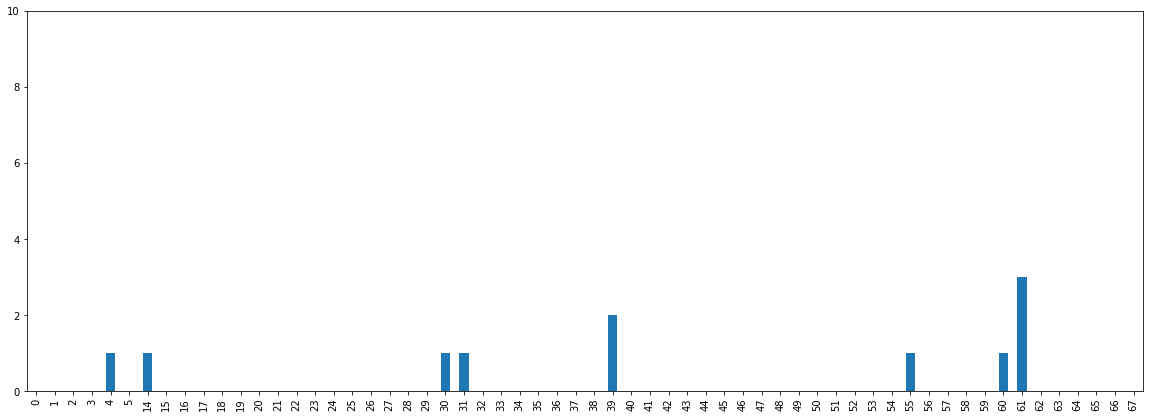

In [ ]:
a = df.loc[df['Proficiency'] == 1]
print(a.columns.tolist())
a.iloc[0:60, :]['Number of Syntactic Constituents: Passive Sentences'].plot(kind='bar', ylim=(0,10))
#plt.rcParams["figure.figsize"] = (20,7)
#plt.bar(a['ï»¿'], a, width=1)

In [45]:
surface_counts = ['Number of Tokens', 
                'Number of Sentences', 
                'Number of Word Types', 
                'Number of Unique Words',
                'Number of Word Types with More Than 2 Syllables',
                'Mean Sentence Length in Tokens', 
                'Mean Token Length in Syllables',                
                'Lexical Richness: Type Token Ratio (TTR)',
                'Lexical Richness: Type Token Ratio (Corrected TTR)',
                'Lexical Richness: Type Token Ratio (Root TTR)',
                'Lexical Richness: Type Token Ratio (STTR)'
                ]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


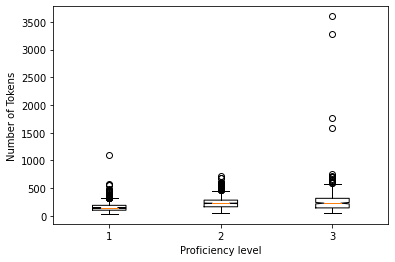

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


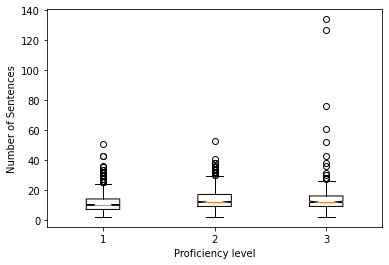

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


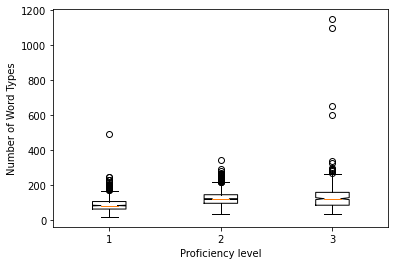

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


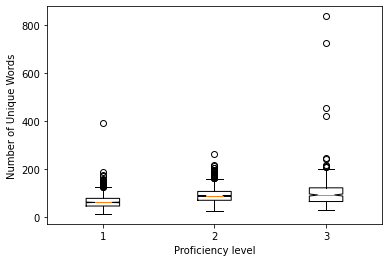

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


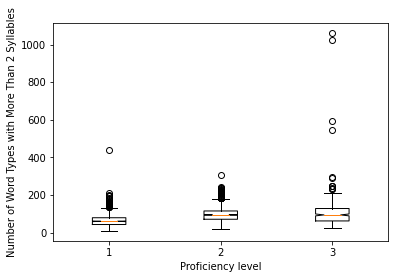

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


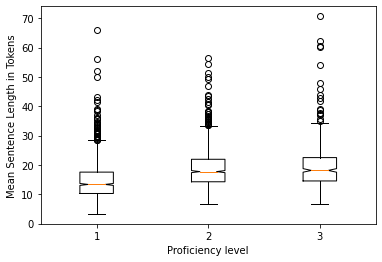

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


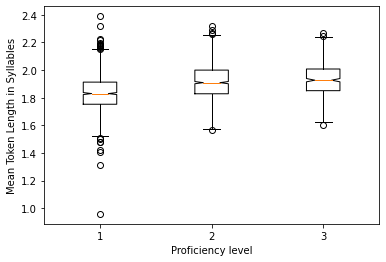

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


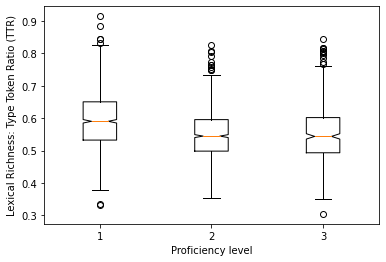

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


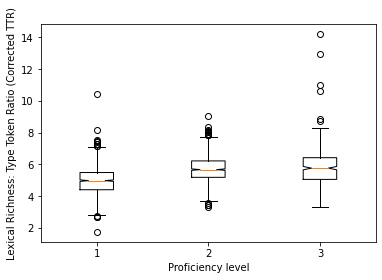

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


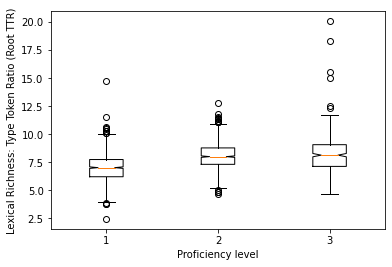

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


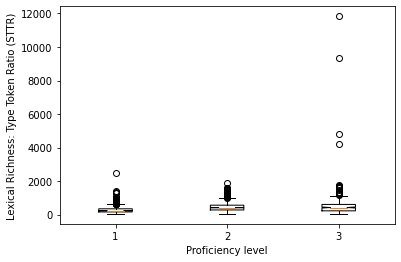

In [46]:
for feature in surface_counts:
  a = df.loc[df['Proficiency'] == 1, feature]
  b = df.loc[df['Proficiency'] == 2, feature]
  c = df.loc[df['Proficiency'] == 3, feature]
  columns = [a, b, c]
  #plt.rcParams["figure.figsize"] = (7,7)
  fig, ax = plt.subplots()
  #plt.ylim(0, 1300)
  plt.ylabel(feature)
  plt.xlabel('Proficiency level')
  ax.boxplot(columns, notch=True, showfliers=True)
  plt.show()

Number of Tokens


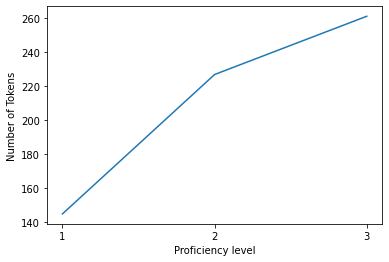

 
Number of Sentences


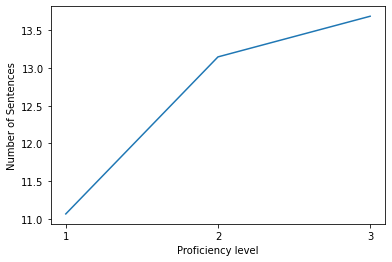

 
Number of Word Types


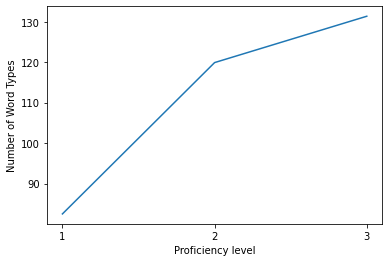

 
Number of Unique Words


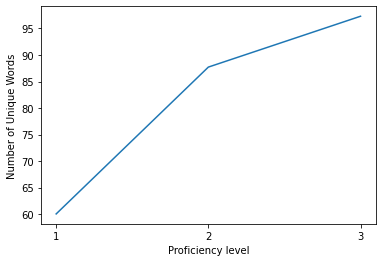

 
Number of Word Types with More Than 2 Syllables


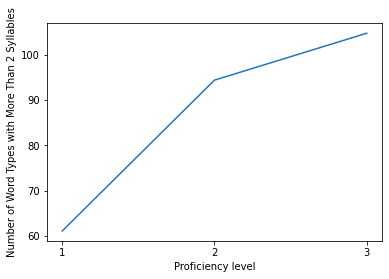

 
Mean Sentence Length in Tokens


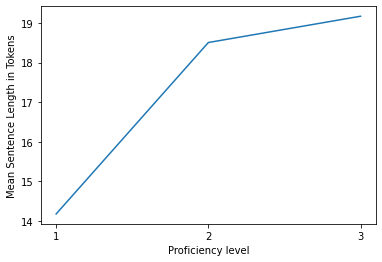

 
Mean Token Length in Syllables


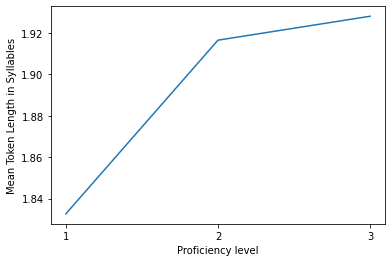

 
Lexical Richness: Type Token Ratio (TTR)


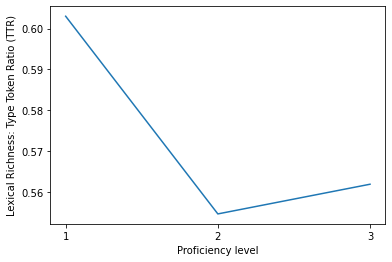

 
Lexical Richness: Type Token Ratio (Corrected TTR)


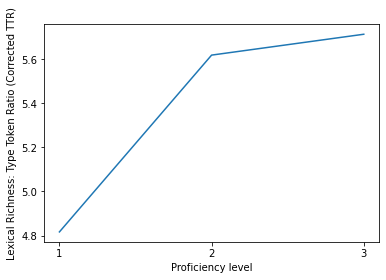

 
Lexical Richness: Type Token Ratio (Root TTR)


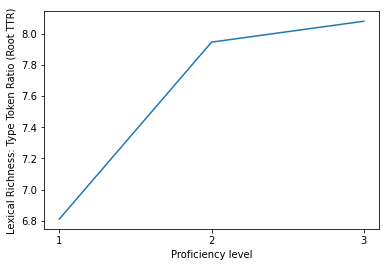

 
Lexical Richness: Type Token Ratio (STTR)


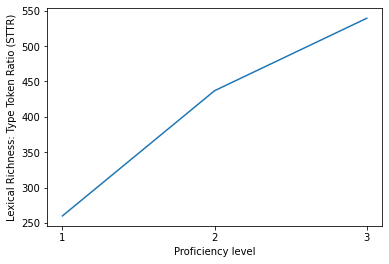

In [ ]:
for feature in surface_counts:
  print(feature)
  df.groupby(['Proficiency'])[feature].mean().plot()
  plt.ylabel(feature)
  plt.xlabel('Proficiency level')
  plt.xticks(range(1, 4))
  plt.show()
  print(" ")

In [ ]:
POS_features = ['Lexical Variation Feature: Adjective',
'Lexical Variation Feature: Adverb',
'Lexical Variation Feature: Corrected Verb Variation 1',
'Lexical Variation Feature: Lexical',
'Lexical Variation Feature: Noun',
'Lexical Variation Feature: Squared Verb Variation 1',
'Lexical Variation Feature: Verb',
'Number of POS Feature: Adjective Tokens',
'Number of POS Feature: Adverb Tokens',
'Number of POS Feature: Lexical word Tokens',
'Number of POS Feature: Noun Tokens',
'Number of POS Feature: Punctuation Tokens',
'POS Density Feature: Article',
'POS Density Feature: Auxiliary Verb',
'POS Density Feature: Conjunction',
'POS Density Feature: Coordinating Conjunction',
'POS Density Feature: Determiner',
'POS Density Feature: Functional Words',
'POS Density Feature: Interjection',
'POS Density Feature: Lexical Words',
'POS Density Feature: Modifier',
'POS Density Feature: Noun',
'POS Density Feature: Preposition',
'POS Density Feature: Pronoun',
'POS Density Feature: Proper Noun',
'POS Density Feature: Subordinating Conjunction'
]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


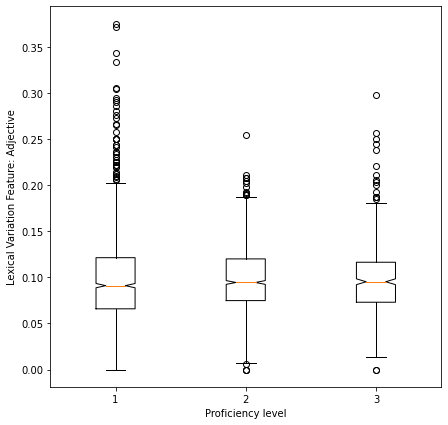

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


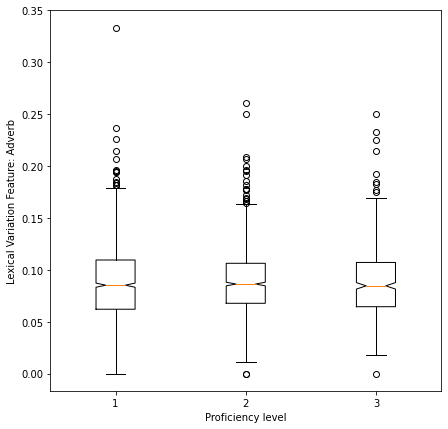

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


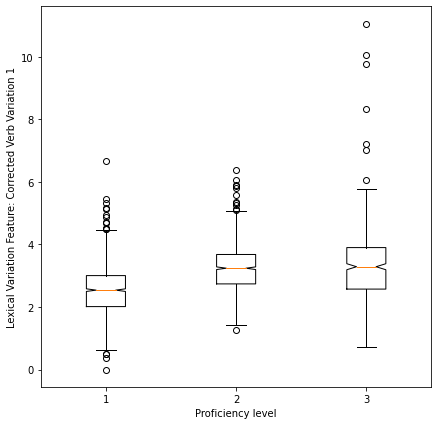

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


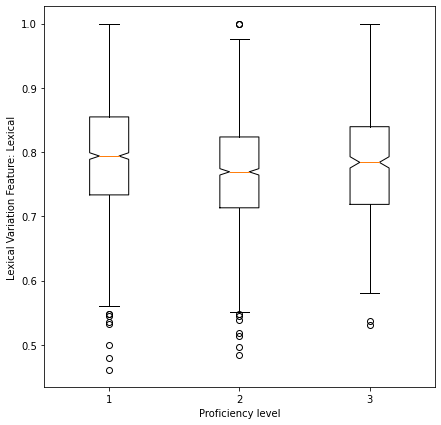

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


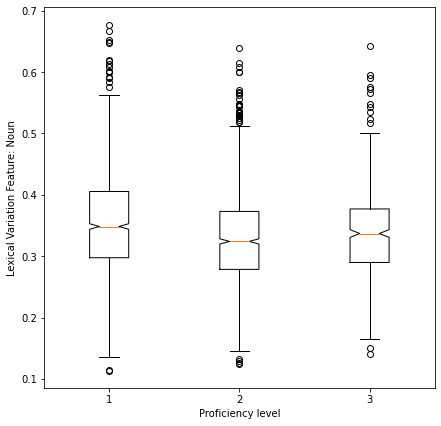

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


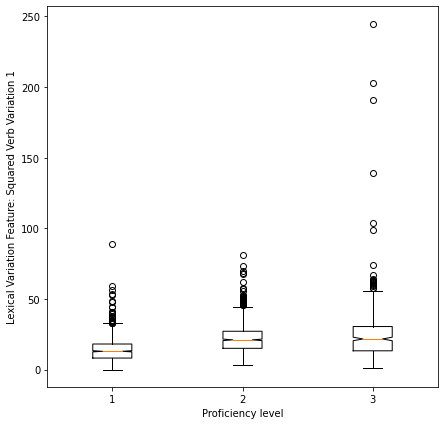

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


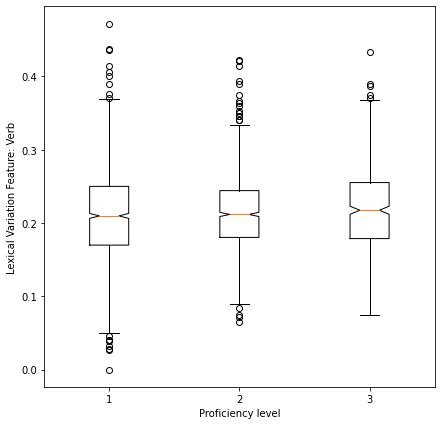

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


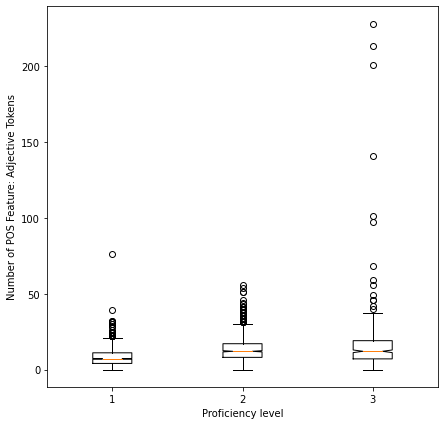

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


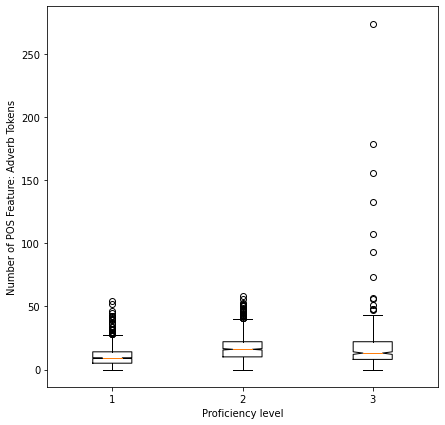

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


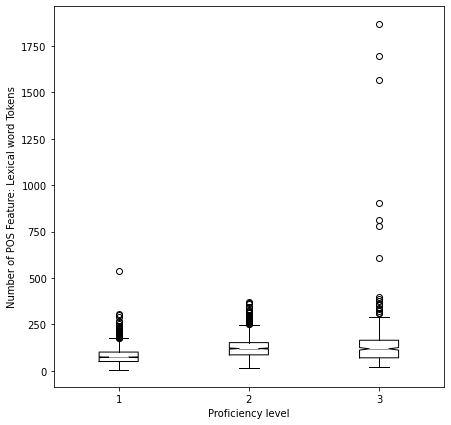

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


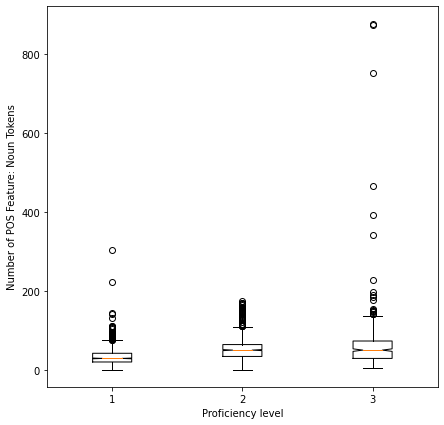

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


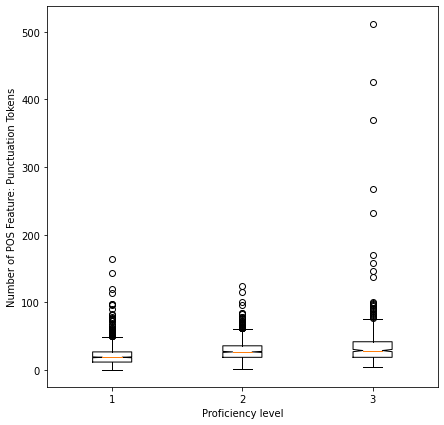

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


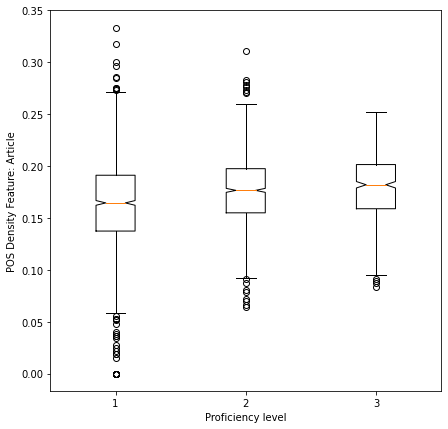

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


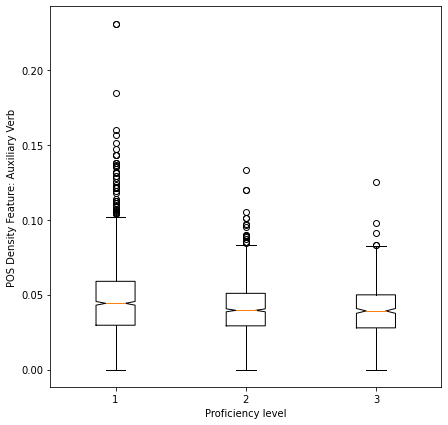

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


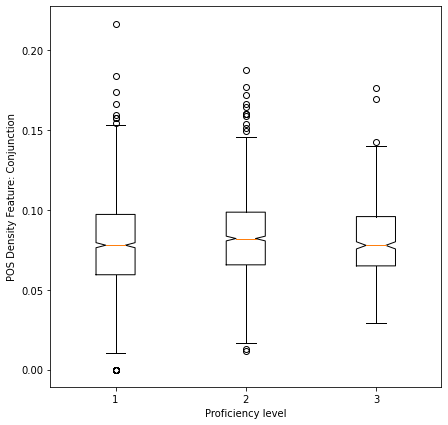

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


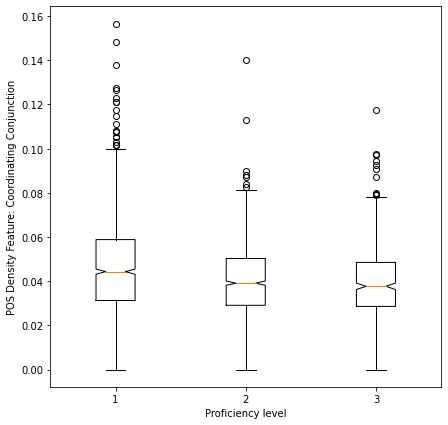

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


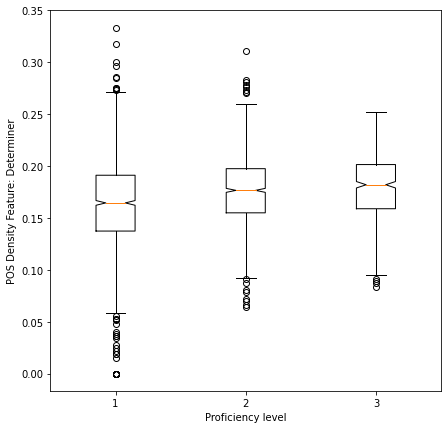

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


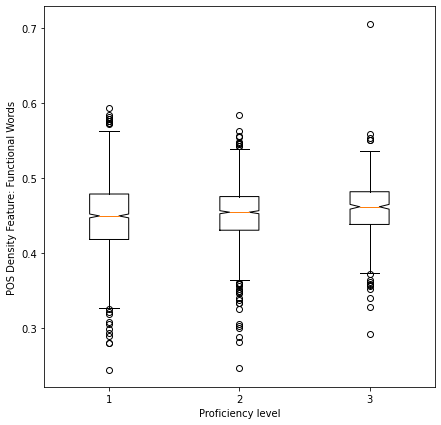

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


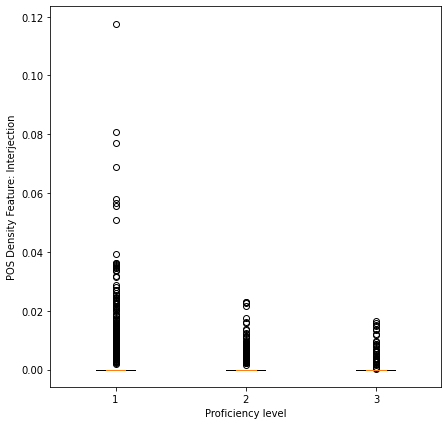

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


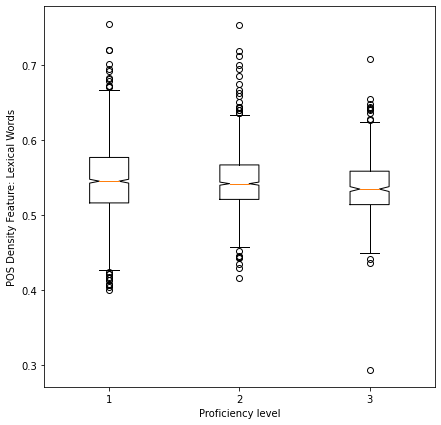

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


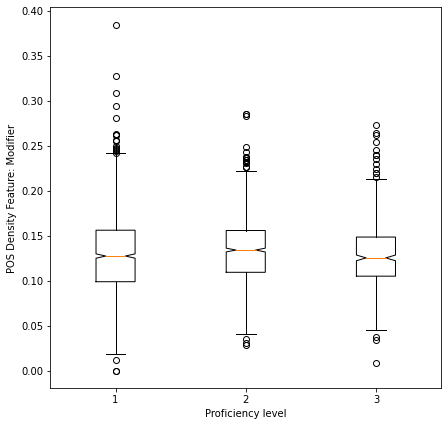

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


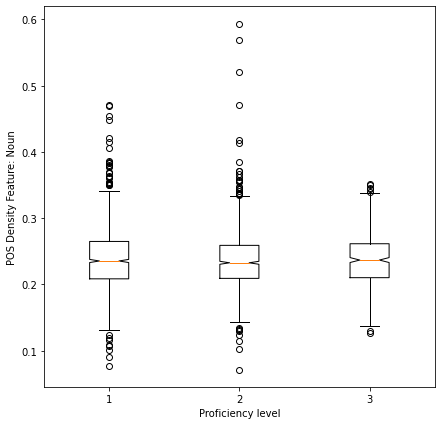

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


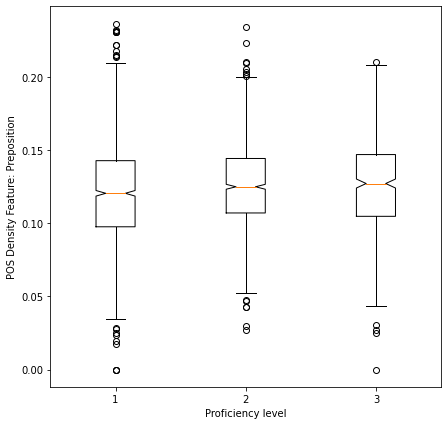

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


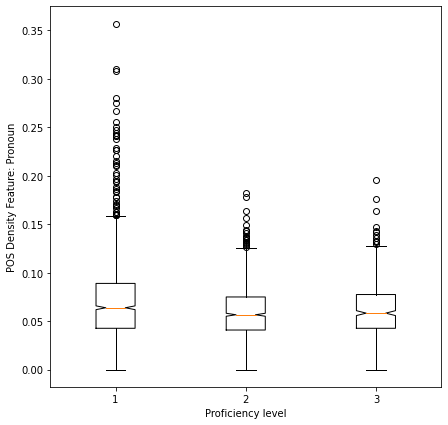

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


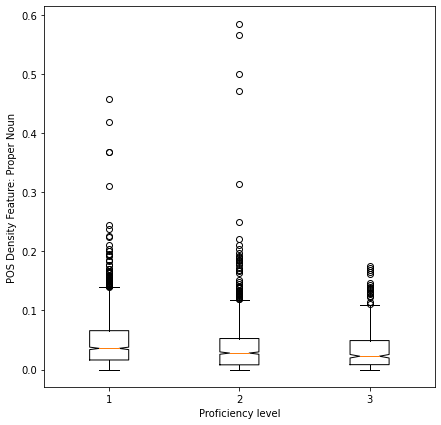

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


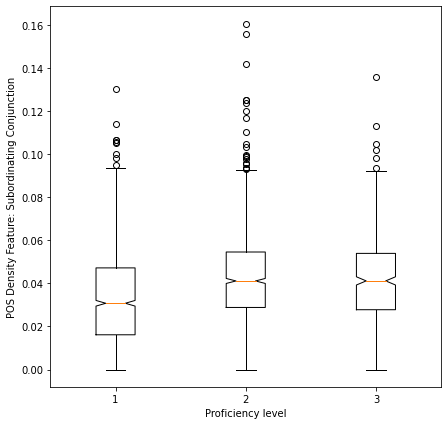

In [ ]:
for feature in POS_features:
  a = df.loc[df['Proficiency'] == 1, feature]
  b = df.loc[df['Proficiency'] == 2, feature]
  c = df.loc[df['Proficiency'] == 3, feature]
  columns = [a, b, c]
  #plt.rcParams["figure.figsize"] = (7,7)
  fig, ax = plt.subplots()
  #plt.ylim(0, 1300)
  plt.ylabel(feature)
  plt.xlabel('Proficiency level')
  ax.boxplot(columns, notch=True, showfliers=True)
  plt.show()

Lexical Variation Feature: Adjective


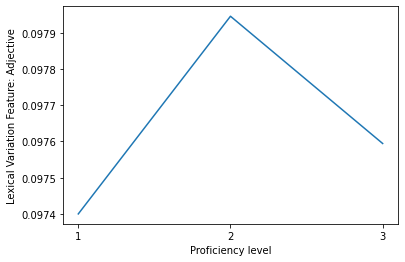

 
Lexical Variation Feature: Adverb


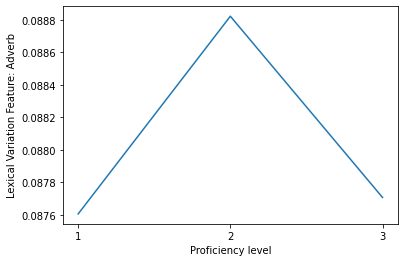

 
Lexical Variation Feature: Corrected Verb Variation 1


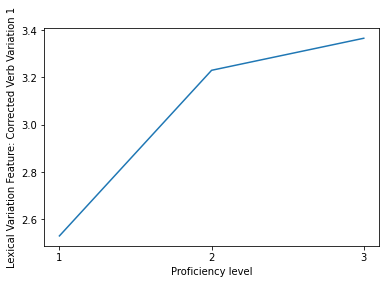

 
Lexical Variation Feature: Lexical


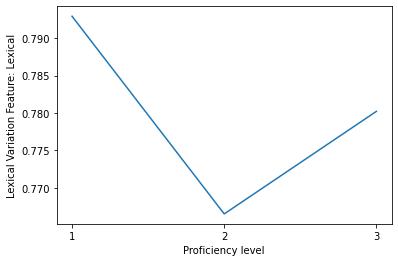

 
Lexical Variation Feature: Noun


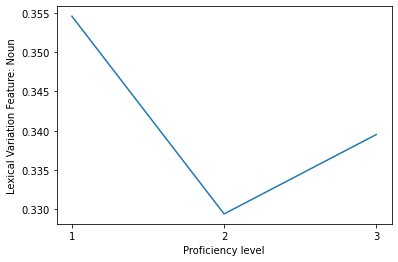

 
Lexical Variation Feature: Squared Verb Variation 1


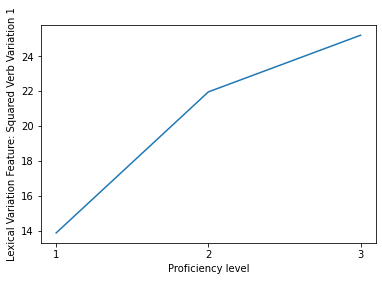

 
Lexical Variation Feature: Verb


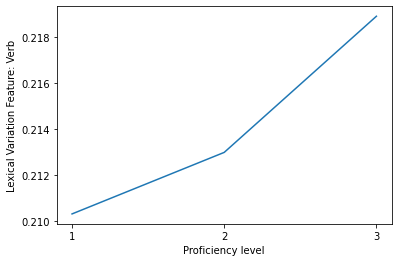

 
Number of POS Feature: Adjective Tokens


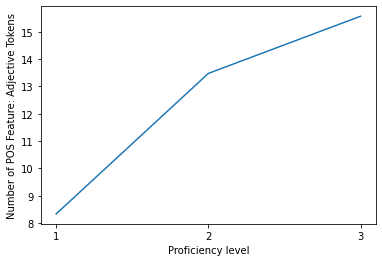

 
Number of POS Feature: Adverb Tokens


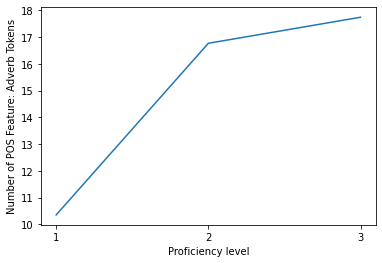

 
Number of POS Feature: Lexical word Tokens


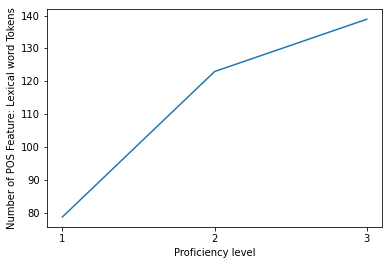

 
Number of POS Feature: Noun Tokens


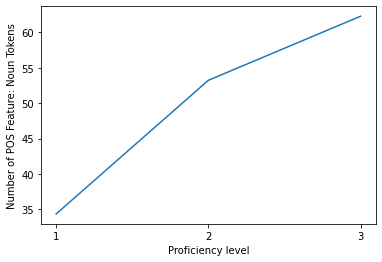

 
Number of POS Feature: Punctuation Tokens


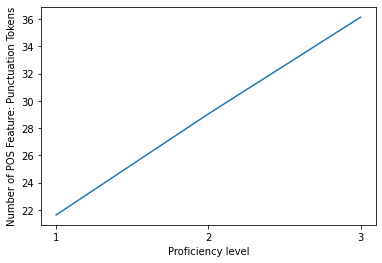

 
POS Density Feature: Article


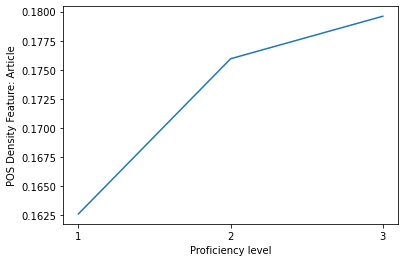

 
POS Density Feature: Auxiliary Verb


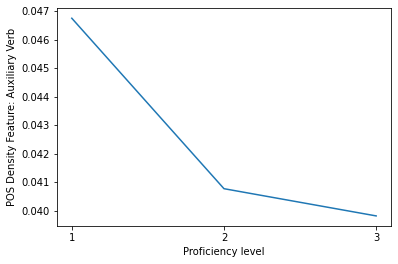

 
POS Density Feature: Conjunction


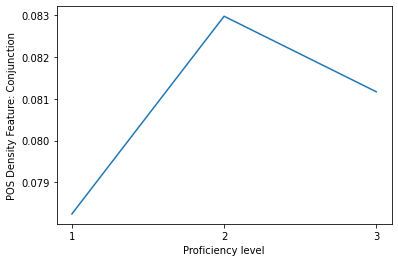

 
POS Density Feature: Coordinating Conjunction


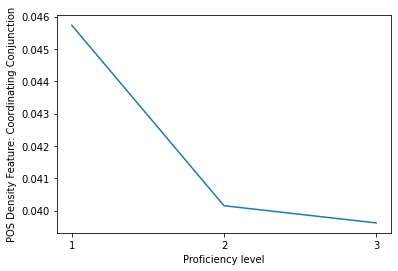

 
POS Density Feature: Determiner


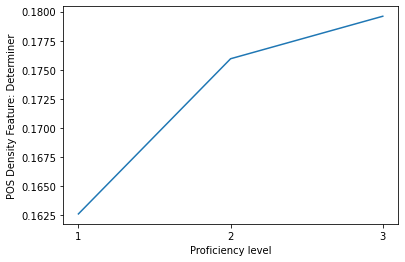

 
POS Density Feature: Functional Words


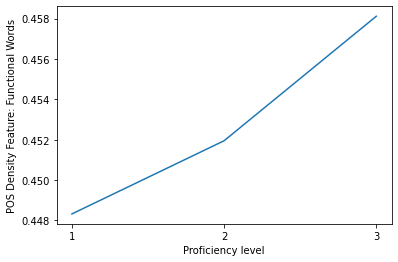

 
POS Density Feature: Interjection


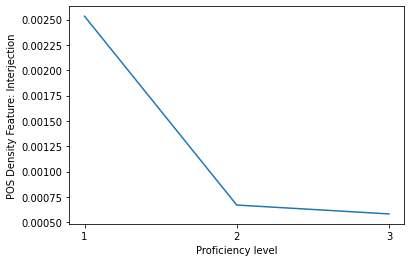

 
POS Density Feature: Lexical Words


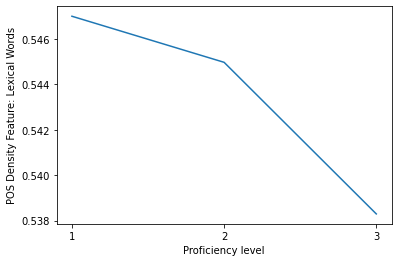

 
POS Density Feature: Modifier


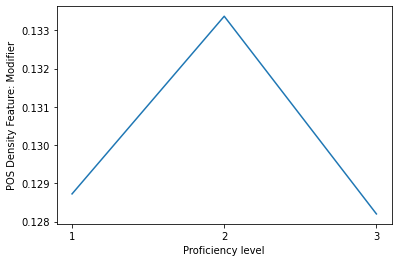

 
POS Density Feature: Noun


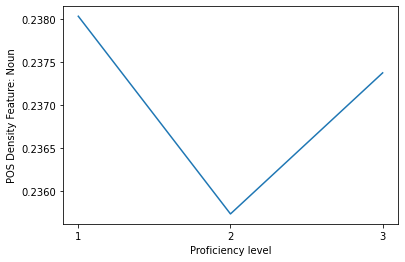

 
POS Density Feature: Preposition


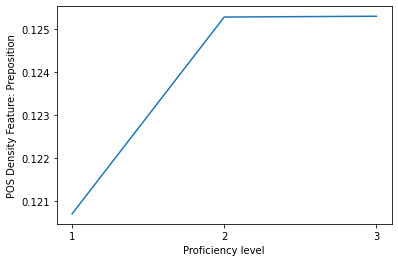

 
POS Density Feature: Pronoun


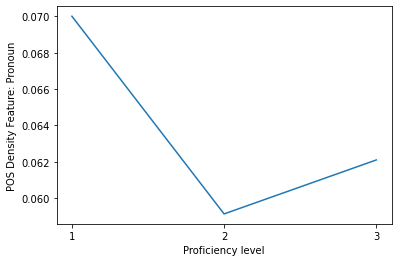

 
POS Density Feature: Proper Noun


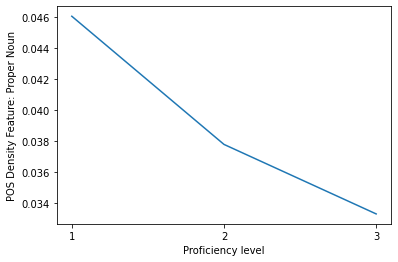

 
POS Density Feature: Subordinating Conjunction


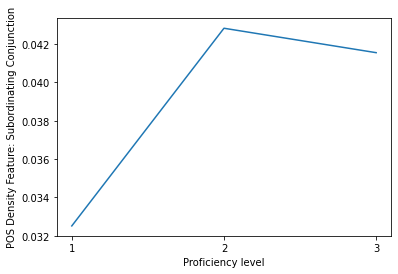

In [ ]:
for feature in POS_features:
  print(feature)
  df.groupby(['Proficiency'])[feature].mean().plot()
  plt.ylabel(feature)
  plt.xlabel('Proficiency level')
  plt.xticks(range(1, 4))
  plt.show()
  print(" ")

In [ ]:
lexical_sophistication = ['Lexical Sophistication Feature: Age of Acquisition (AW Token)',
'Lexical Sophistication Feature: Concreteness (AW Token)',
'Lexical Sophistication Feature: Familiarity (AW Token)',
'Lexical Sophistication Feature: Imageability (AW Token)',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (AW Token)',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 1',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 2',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 3',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 4',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 5',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 6',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 7',
'Lexical Sophistication Feature: SUBTLEX Frequency Top 1000',
'Lexical Sophistication Feature: SUBTLEX Frequency Top 2000',
'Lexical Sophistication Feature: SUBTLEX Frequency Top 3000',
'Lexical Sophistication Feature: SUBTLEX Frequency Top 4000',
'Lexical Sophistication Feature: SUBTLEX Frequency Top 5000',
'Lexical Sophistication Feature: SUBTLEX Frequency Top 6000 and Below',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (AW Token)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (AW Token)',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (AW Token)'
]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


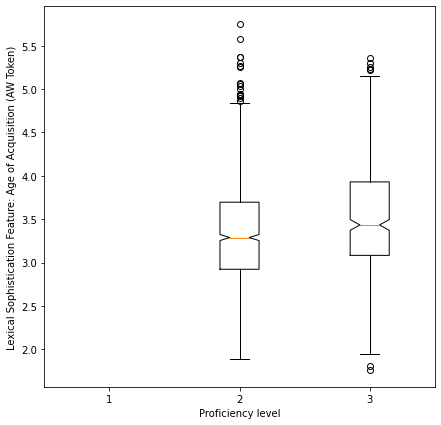

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


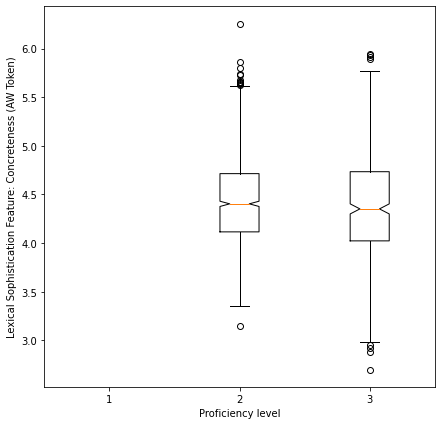

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


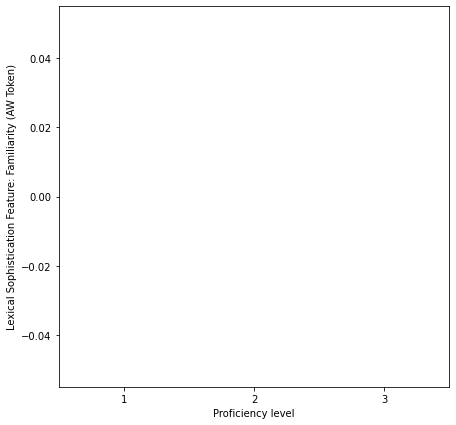

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


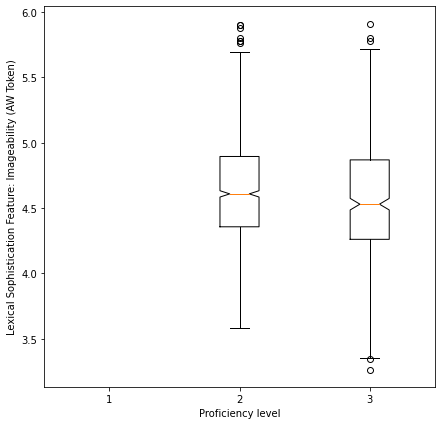

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


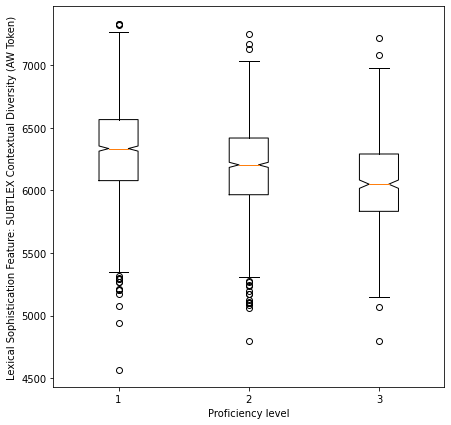

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


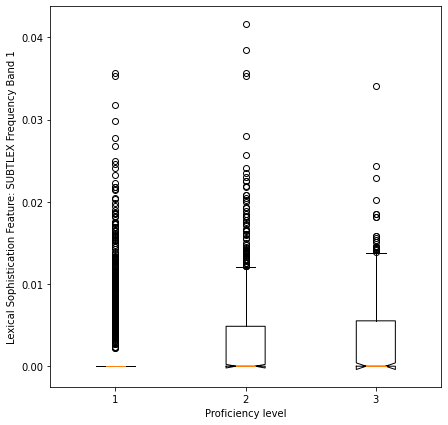

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


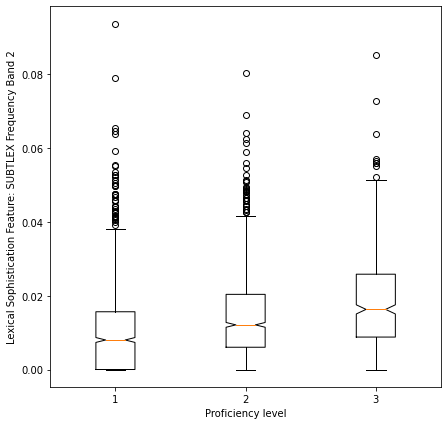

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


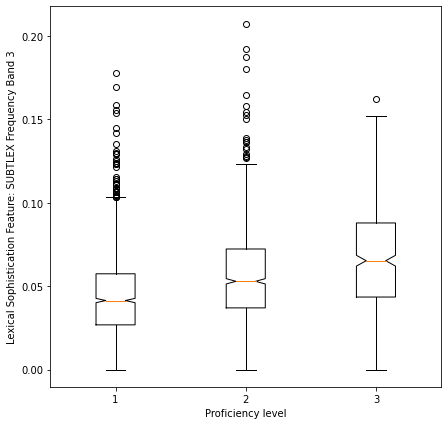

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


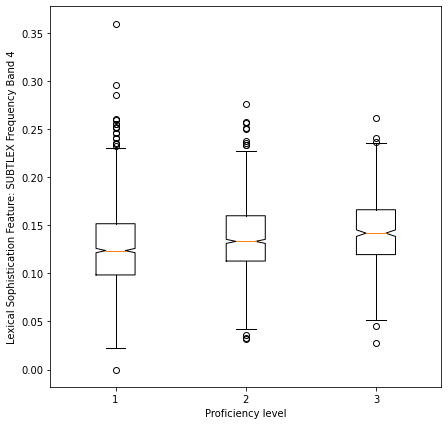

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


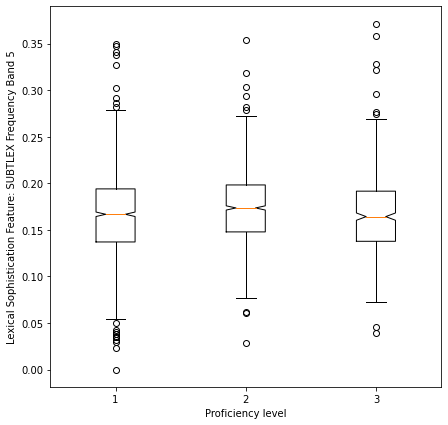

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


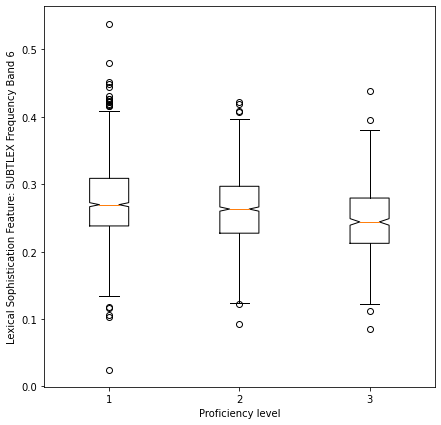

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


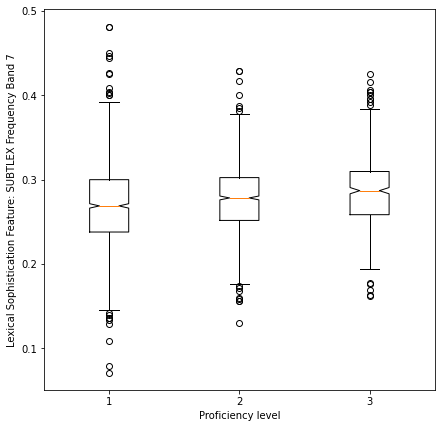

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


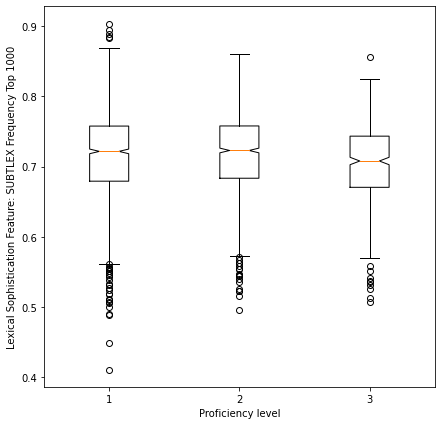

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


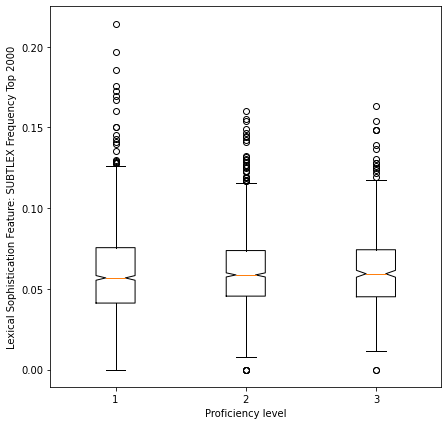

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


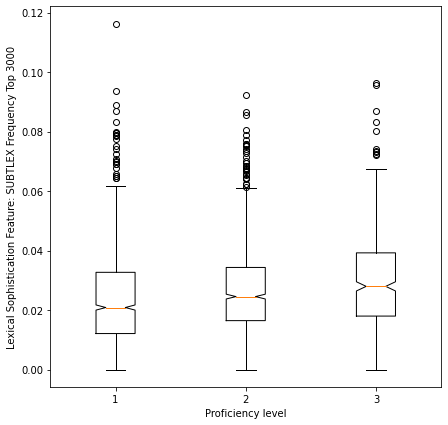

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


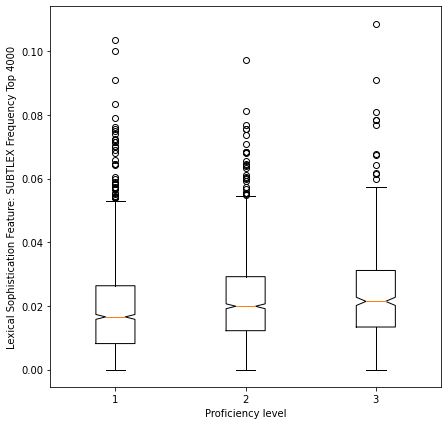

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


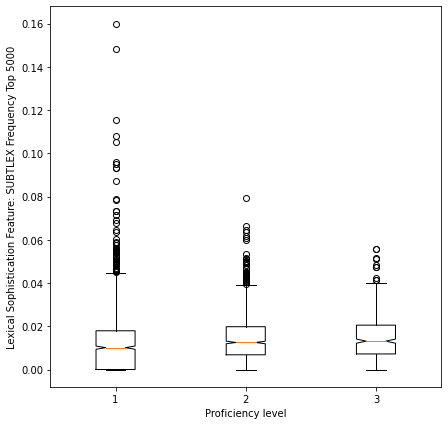

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


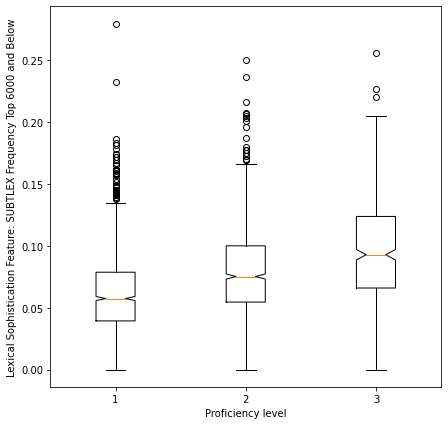

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


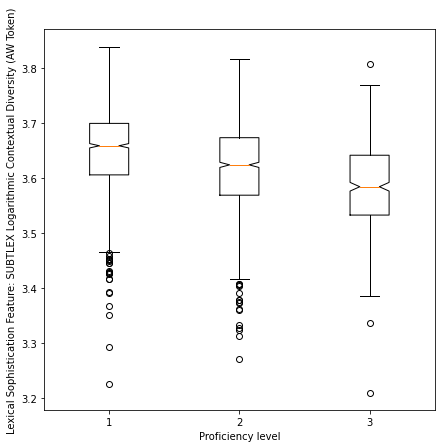

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


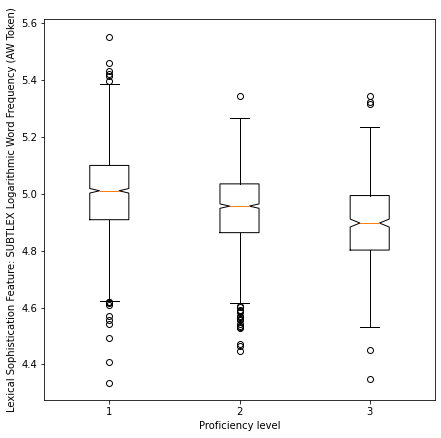

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


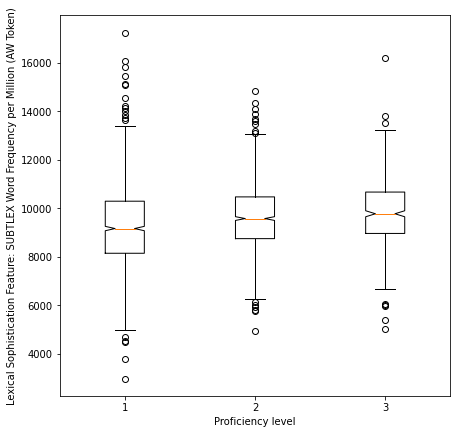

In [ ]:
for feature in lexical_sophistication:
  a = df.loc[df['Proficiency'] == 1, feature]
  b = df.loc[df['Proficiency'] == 2, feature]
  c = df.loc[df['Proficiency'] == 3, feature]
  columns = [a, b, c]
  #plt.rcParams["figure.figsize"] = (7,7)
  fig, ax = plt.subplots()
  #plt.ylim(0, 1300)
  plt.ylabel(feature)
  plt.xlabel('Proficiency level')
  ax.boxplot(columns, notch=True, showfliers=True)
  plt.show()

Lexical Sophistication Feature: Age of Acquisition (AW Token)


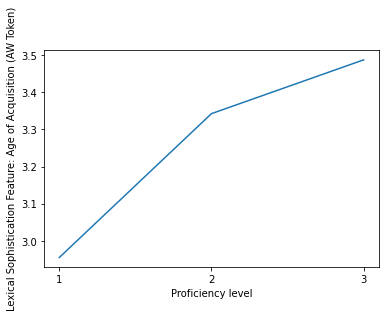

 
Lexical Sophistication Feature: Concreteness (AW Token)


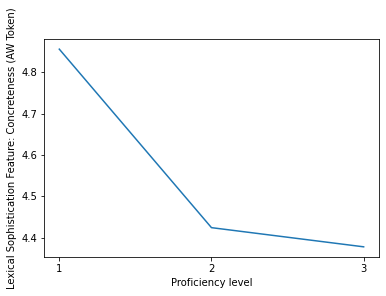

 
Lexical Sophistication Feature: Familiarity (AW Token)


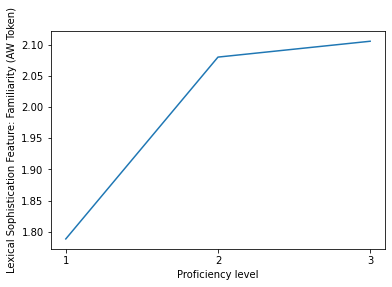

 
Lexical Sophistication Feature: Imageability (AW Token)


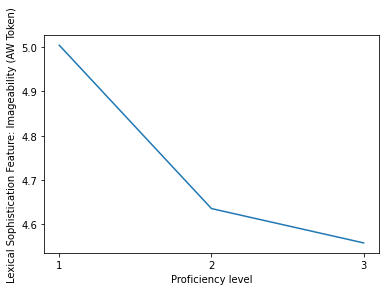

 
Lexical Sophistication Feature: SUBTLEX Contextual Diversity (AW Token)


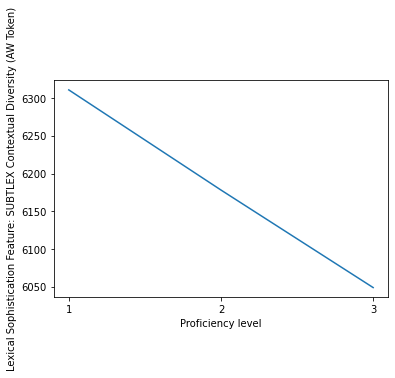

 
Lexical Sophistication Feature: SUBTLEX Frequency Band 1


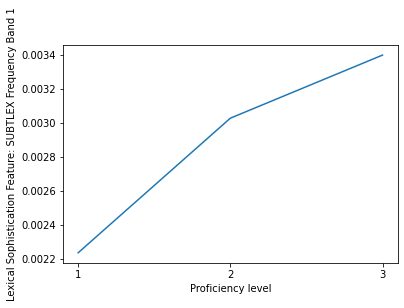

 
Lexical Sophistication Feature: SUBTLEX Frequency Band 2


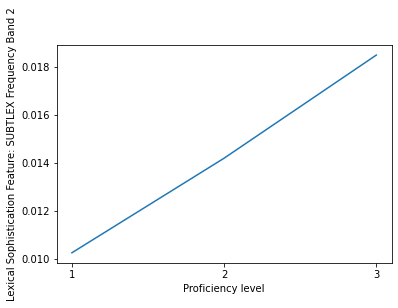

 
Lexical Sophistication Feature: SUBTLEX Frequency Band 3


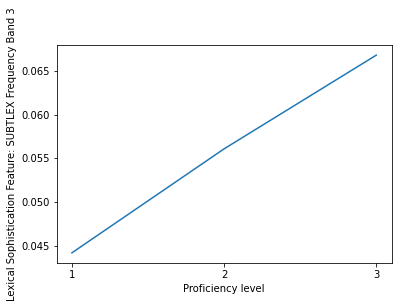

 
Lexical Sophistication Feature: SUBTLEX Frequency Band 4


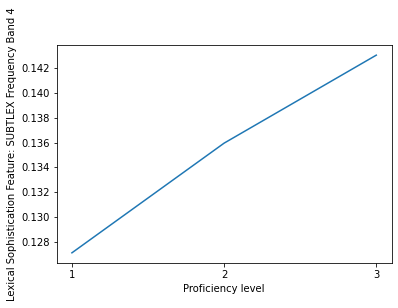

 
Lexical Sophistication Feature: SUBTLEX Frequency Band 5


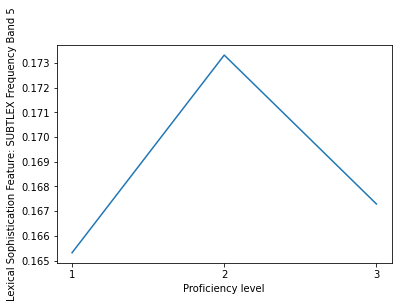

 
Lexical Sophistication Feature: SUBTLEX Frequency Band 6


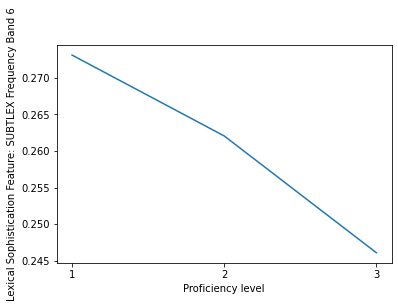

 
Lexical Sophistication Feature: SUBTLEX Frequency Band 7


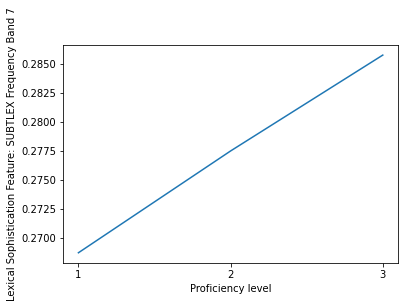

 
Lexical Sophistication Feature: SUBTLEX Frequency Top 1000


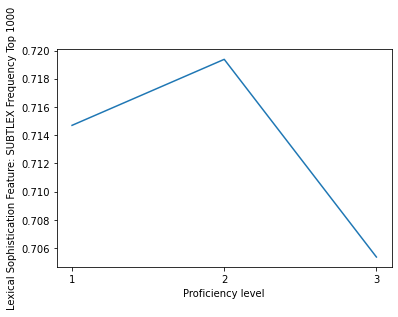

 
Lexical Sophistication Feature: SUBTLEX Frequency Top 2000


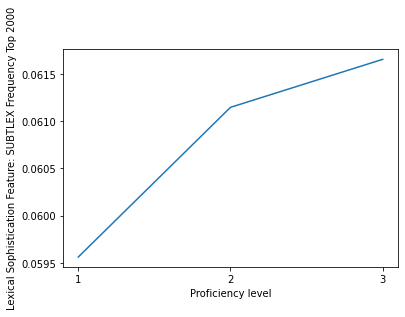

 
Lexical Sophistication Feature: SUBTLEX Frequency Top 3000


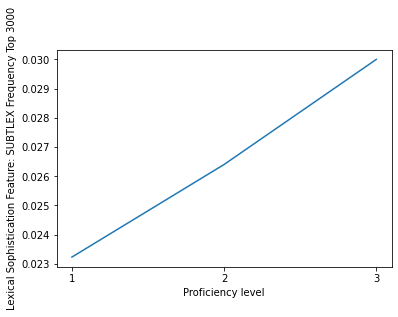

 
Lexical Sophistication Feature: SUBTLEX Frequency Top 4000


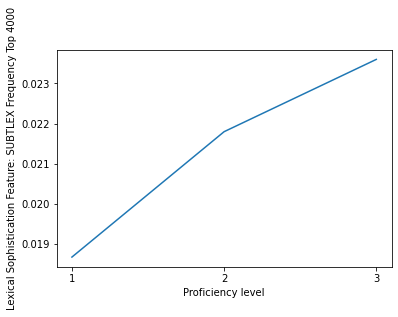

 
Lexical Sophistication Feature: SUBTLEX Frequency Top 5000


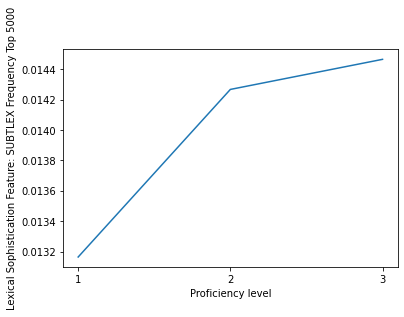

 
Lexical Sophistication Feature: SUBTLEX Frequency Top 6000 and Below


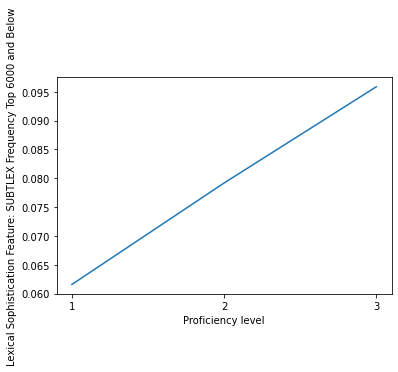

 
Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (AW Token)


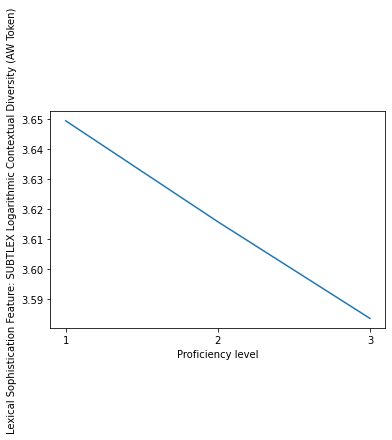

 
Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (AW Token)


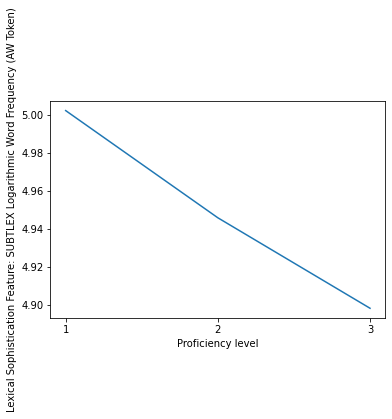

 
Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (AW Token)


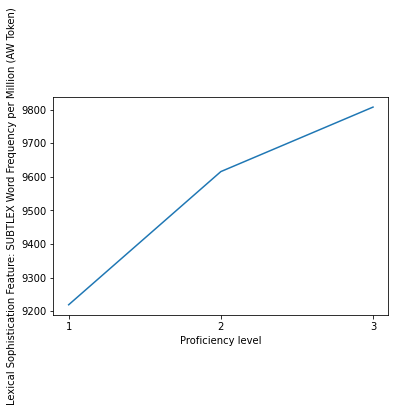

In [ ]:
for feature in lexical_sophistication:
  print(feature)
  df.groupby(['Proficiency'])[feature].mean().plot()
  plt.ylabel(feature)
  plt.xlabel('Proficiency level')
  plt.xticks(range(1, 4))
  plt.show()
  print(" ")

In [47]:
morphological = ['Number of Morphological Features: Conditional Verb per VP',
'Number of Morphological Features: Imperfect Verb per VP',
'Number of Morphological Features: Inflected Infinitive Verb per VP',
'Number of Morphological Features: Pluperfect Verb per VP',
'Number of Morphological Features: Preterite Verb per VP',
'Number of Morphological Features: Subjunctive Verb per VP',
'Number of Morphological Features: Simple Future Verb per VP',
'Number of Morphological Features: Relative Pronouns',
'Number of Morphological Features: Indefinite Pronouns',
'Morphological Complexity Inflection Feature: Feminine inflection per word token',
'Morphological Complexity Inflection Feature: First Person per word token',
'Morphological Complexity Inflection Feature: Imperatives per Verb',
'Morphological Complexity Inflection Feature: Imperatives per word token',
'Morphological Complexity Inflection Feature: Imperfect tense per verb token',
'Morphological Complexity Inflection Feature: Indicatives per Verb',
'Morphological Complexity Inflection Feature: Indicatives per word token',
'Morphological Complexity Inflection Feature: Infinite Verb Density',
'Morphological Complexity Inflection Feature: Masculine inflection per word token',
'Morphological Complexity Inflection Feature: Past Participle Verb Density',
'Morphological Complexity Inflection Feature: Past tense per verb token',
'Morphological Complexity Inflection Feature: Second Person per word token',
'Morphological Complexity Inflection Feature: Singular per word token',
'Morphological Complexity Inflection Feature: Subjunctives per verb token',
'Morphological Complexity Inflection Feature: Subjunctives per word token',
'Morphological Complexity Inflection Feature: Third Person per word token',
]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


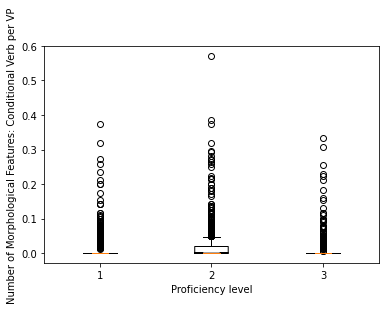

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


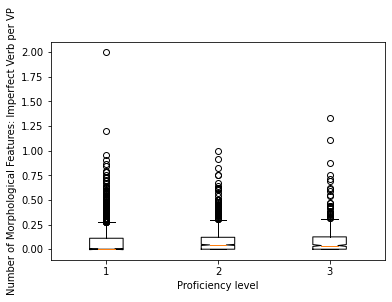

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


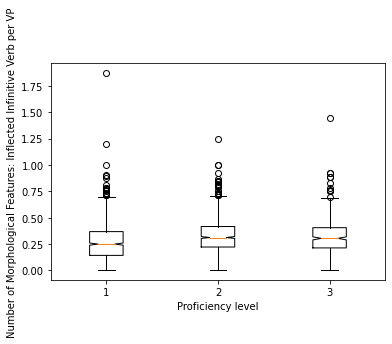

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


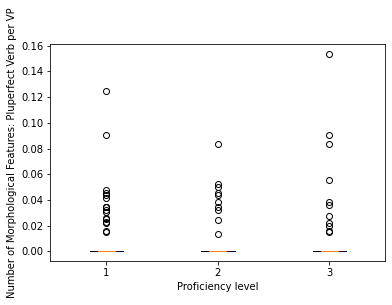

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


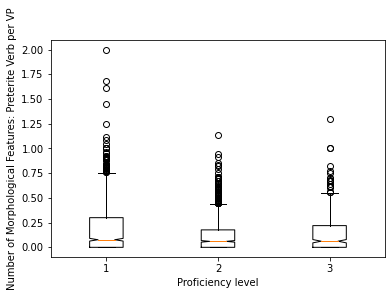

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


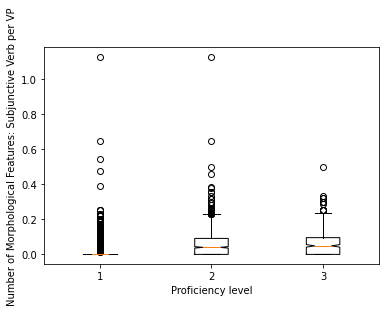

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


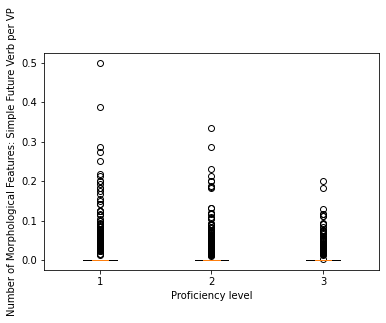

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


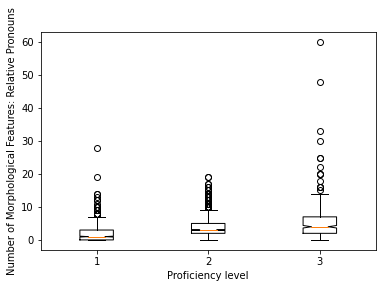

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


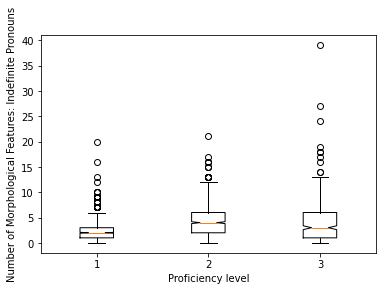

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


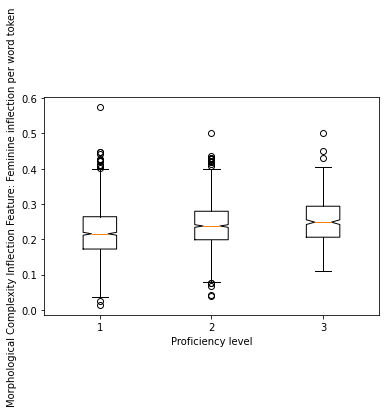

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


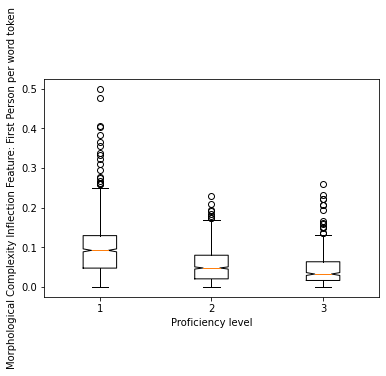

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


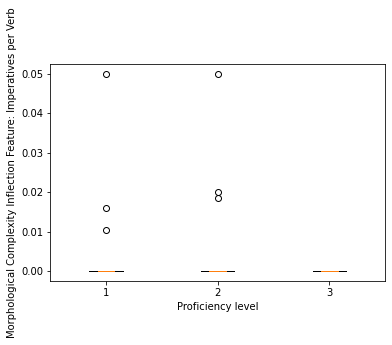

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


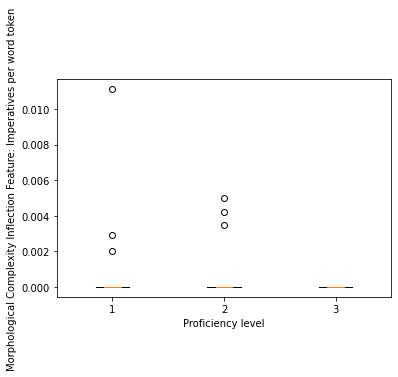

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


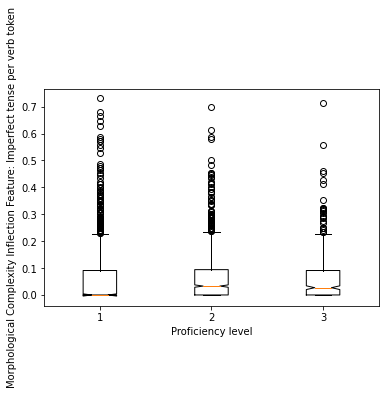

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


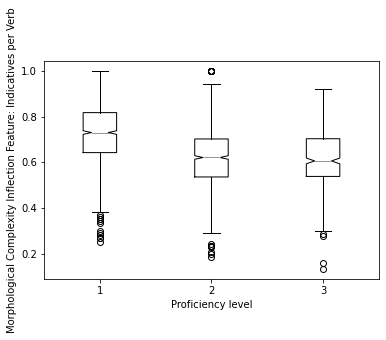

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


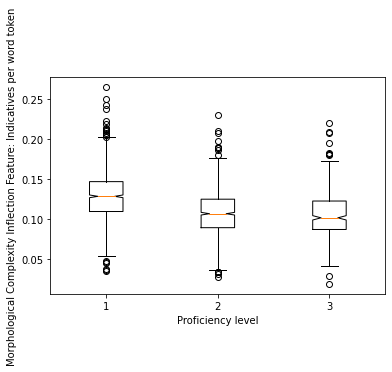

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


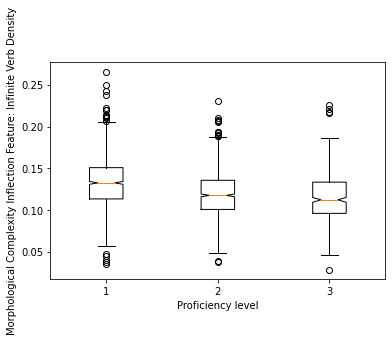

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


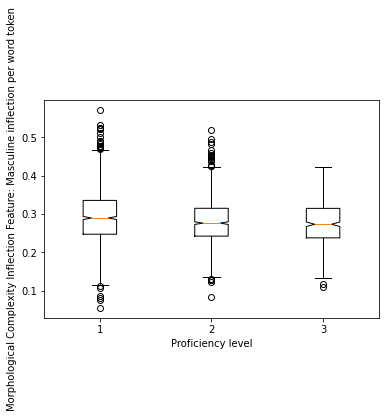

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


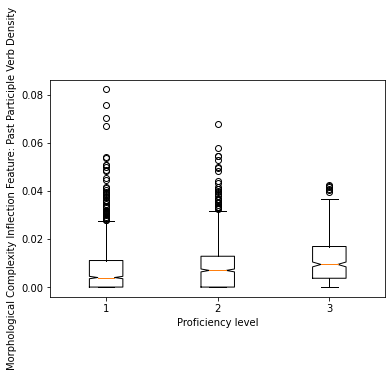

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


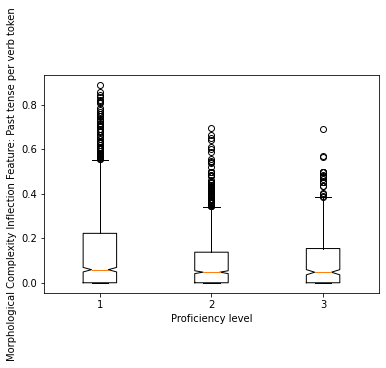

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


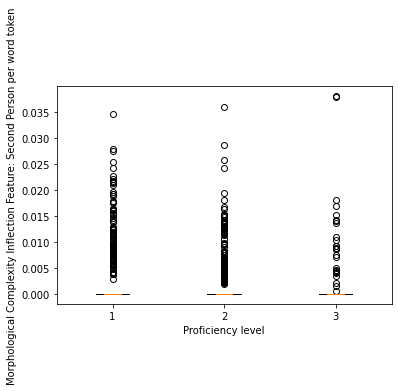

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


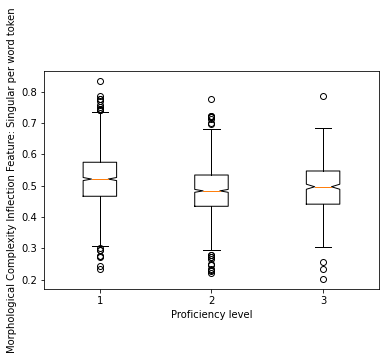

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


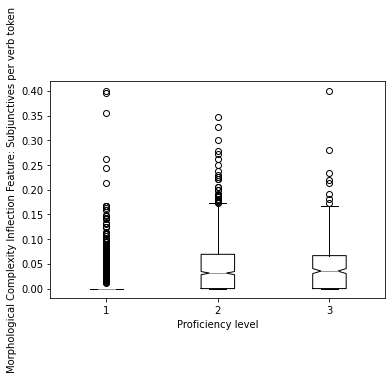

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


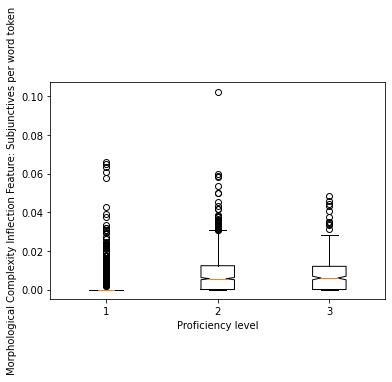

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


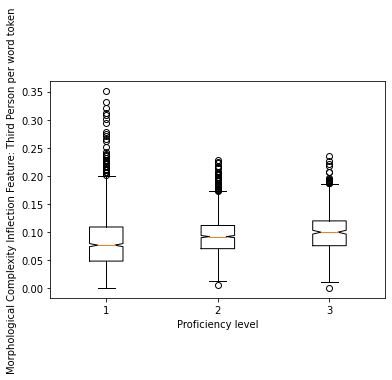

In [48]:
for feature in morphological:
  a = df.loc[df['Proficiency'] == 1, feature]
  b = df.loc[df['Proficiency'] == 2, feature]
  c = df.loc[df['Proficiency'] == 3, feature]
  columns = [a, b, c]
  #plt.rcParams["figure.figsize"] = (7,7)
  fig, ax = plt.subplots()
  #plt.ylim(0, 1300)
  plt.ylabel(feature)
  plt.xlabel('Proficiency level')
  ax.boxplot(columns, notch=True, showfliers=True)
  plt.show()

Number of Morphological Features: Conditional Verb per VP


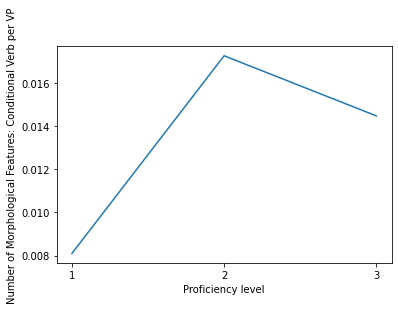

 
Number of Morphological Features: Imperfect Verb per VP


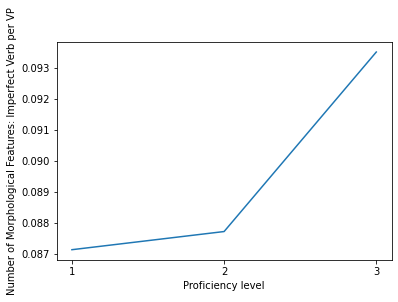

 
Number of Morphological Features: Inflected Infinitive Verb per VP


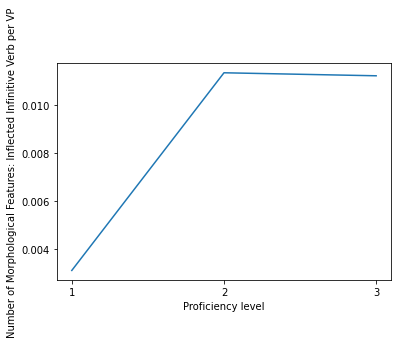

 
Number of Morphological Features: Pluperfect Verb per VP


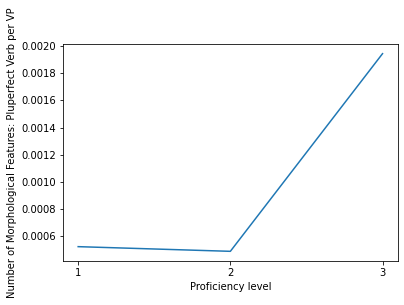

 
Number of Morphological Features: Preterite Verb per VP


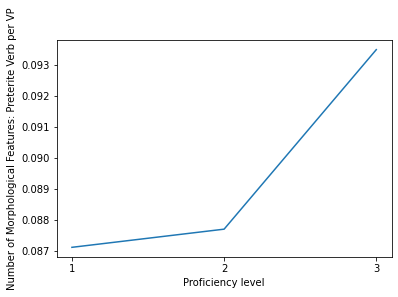

 
Number of Morphological Features: Subjunctive Verb per VP


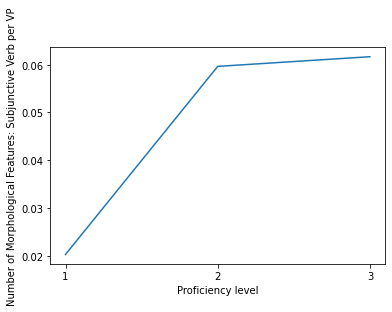

 
Morphological Complexity Inflection Feature: Feminine inflection per word token


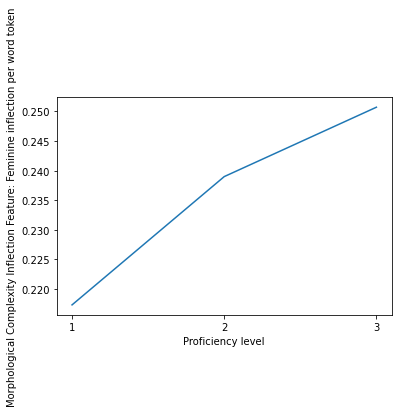

 
Morphological Complexity Inflection Feature: First Person per word token


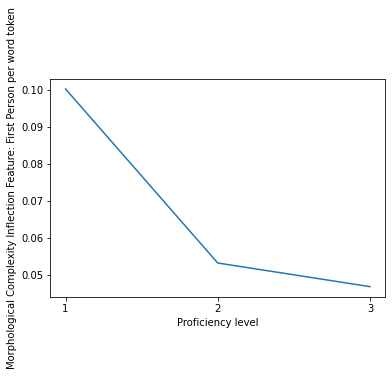

 
Morphological Complexity Inflection Feature: Imperatives per Verb


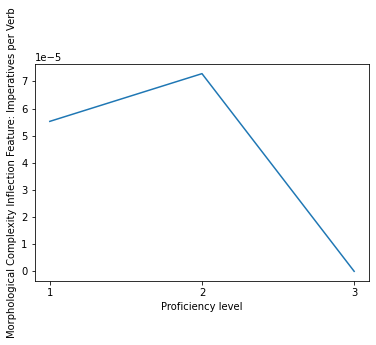

 
Morphological Complexity Inflection Feature: Imperatives per word token


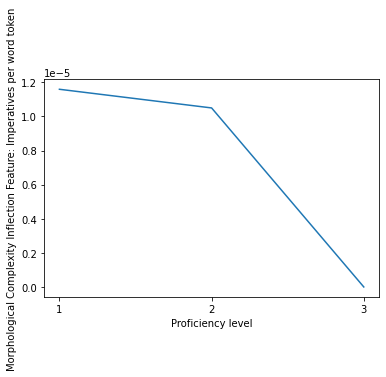

 
Morphological Complexity Inflection Feature: Imperfect tense per verb token


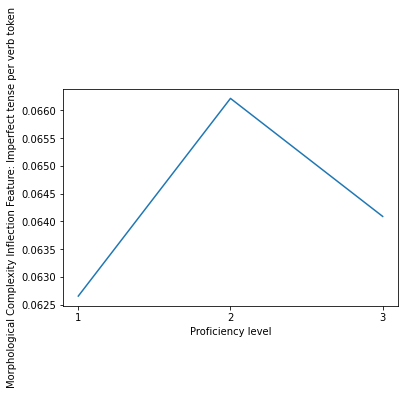

 
Morphological Complexity Inflection Feature: Indicatives per Verb


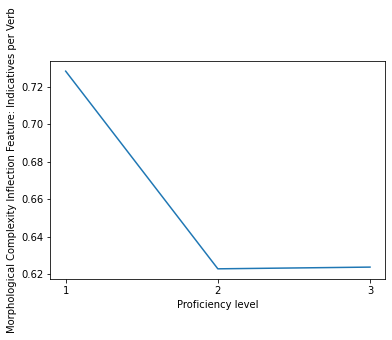

 
Morphological Complexity Inflection Feature: Indicatives per word token


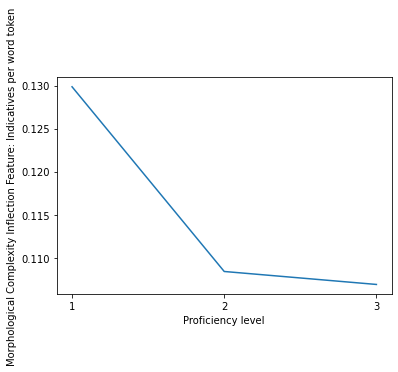

 
Morphological Complexity Inflection Feature: Infinite Verb Density


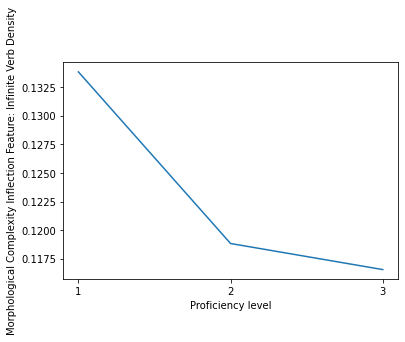

 
Morphological Complexity Inflection Feature: Masculine inflection per word token


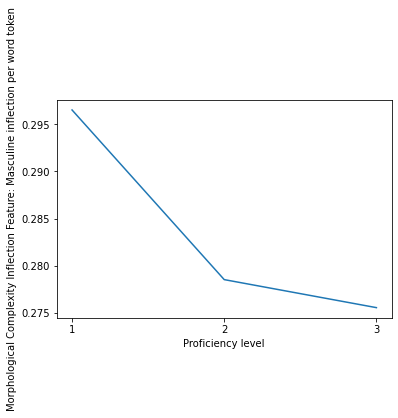

 
Morphological Complexity Inflection Feature: Past Participle Verb Density


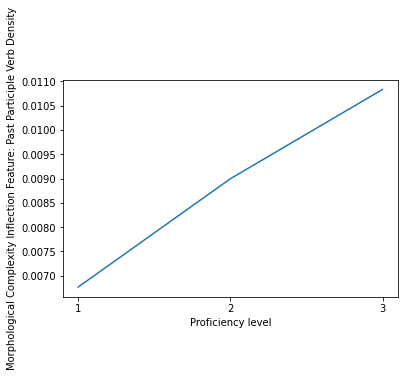

 
Morphological Complexity Inflection Feature: Past tense per verb token


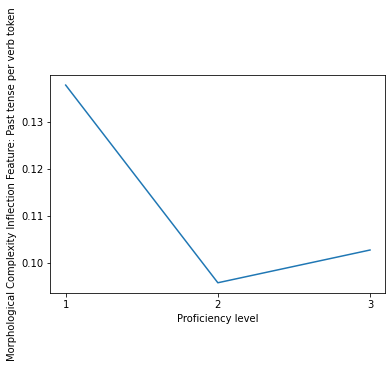

 
Morphological Complexity Inflection Feature: Second Person per word token


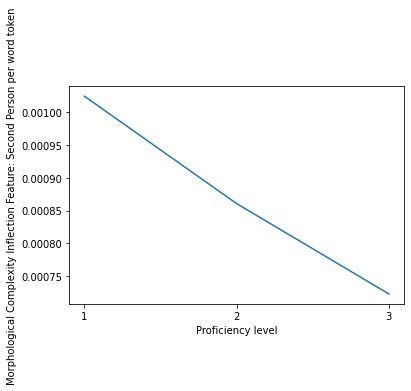

 
Morphological Complexity Inflection Feature: Singular per word token


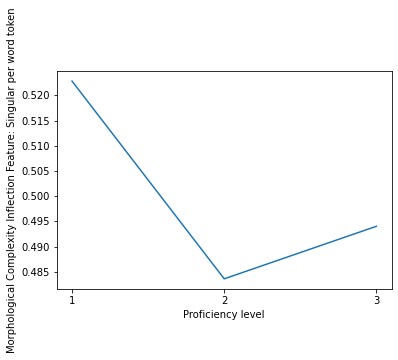

 
Morphological Complexity Inflection Feature: Subjunctives per verb token


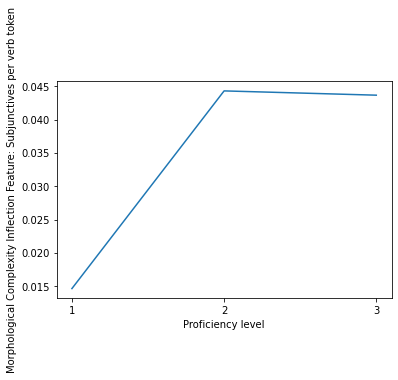

 
Morphological Complexity Inflection Feature: Subjunctives per word token


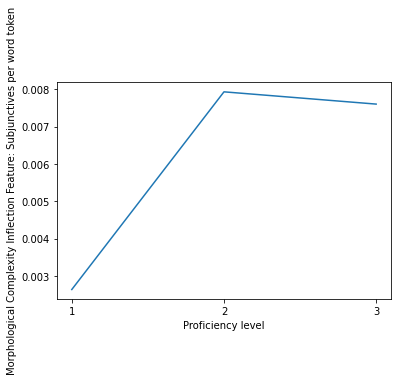

 
Morphological Complexity Inflection Feature: Third Person per word token


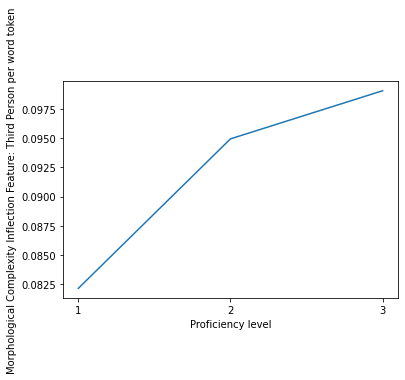

In [ ]:
for feature in morphological:
  print(feature)
  df.groupby(['Proficiency'])[feature].mean().plot()
  plt.ylabel(feature)
  plt.xlabel('Proficiency level')
  plt.xticks(range(1, 4))
  plt.show()
  print(" ")

In [49]:
syntactic = ['Number of Syntactic Constituents: Passive Sentences',
'Number of Syntactic Constituents: Coordinate Phrases',
'Number of Syntactic Constituents: Dependent Clauses',
'Number of Syntactic Constituents: Relative Clauses',
'Number of Syntactic Constituents: Subordinate Clauses',
'Number of Syntactic Constituents: Open Clausal Complement',
'Number of Syntactic Constituents: Clausal Subject',
'Syntactic Complexity Feature: Complex Nominals per Sentence',
'Syntactic Complexity Feature: Complex T-unit Ratio',
'Syntactic Complexity Feature: Complex T-unit per Sentence',
'Syntactic Complexity Feature: Coordinate Phrases per Sentence',
'Syntactic Complexity Feature: Dependent clause ratio',
'Syntactic Complexity Feature: Dependent clauses per Sentence',
'Syntactic Complexity Feature: Inverted Pseudoclefts per VP',
'Syntactic Complexity Feature: It-Clefts per VP',
'Syntactic Complexity Feature: Mean Length of Clause',
'Syntactic Complexity Feature: Mean Length of Complex T-unit',
'Syntactic Complexity Feature: Mean Length of Noun Phrase',
'Syntactic Complexity Feature: Mean Length of Prepositional Phrase',
'Syntactic Complexity Feature: Mean Length of T-unit',
'Syntactic Complexity Feature: Noun Phrases per Sentence',
'Syntactic Complexity Feature: Prenominal Modifier per Complex Noun Phrase',
'Syntactic Complexity Feature: Prepositional Phrases per Sentence',
'Syntactic Complexity Feature: Pseudoclefts per VP',
'Syntactic Complexity Feature: Relative Clauses per Sentence',
'Syntactic Complexity Feature: Sentence Complexity Ratio',
'Syntactic Complexity Feature: Sentence Coordination Ratio',
'Syntactic Complexity Feature: T-unit complexity ratio',
'Syntactic Complexity Feature: Verb Cluster per Sentence',
'Syntactic Complexity Feature: Verb Phrases per Sentence',
'Syntactic Complexity Feature: e-que Cleft per VP']

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


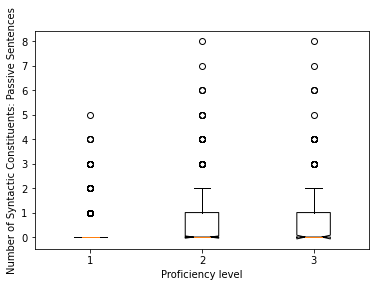

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


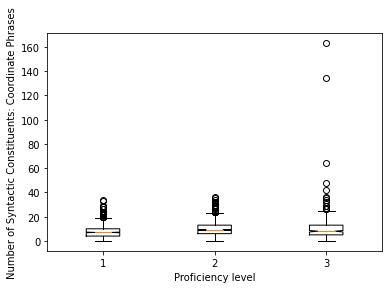

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


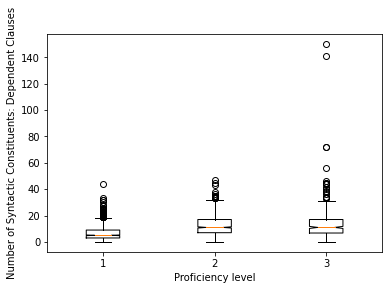

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


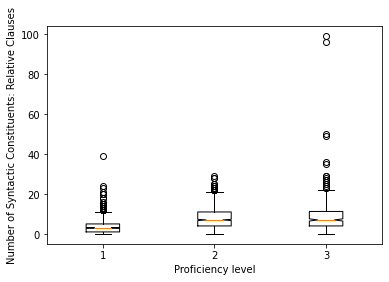

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


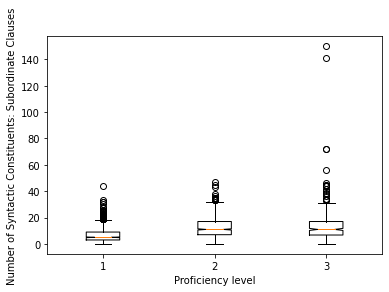

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


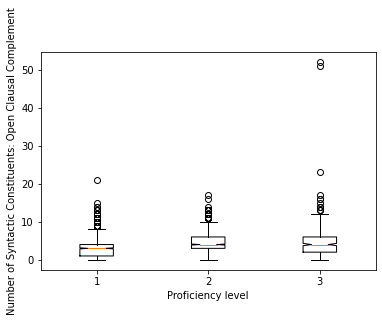

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


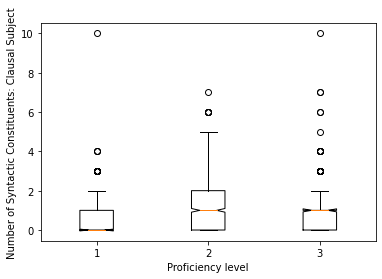

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


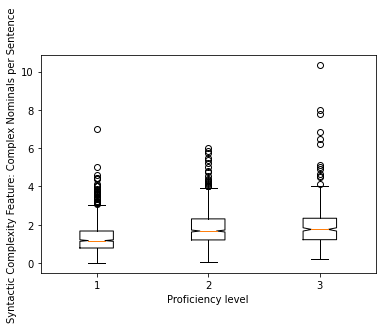

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


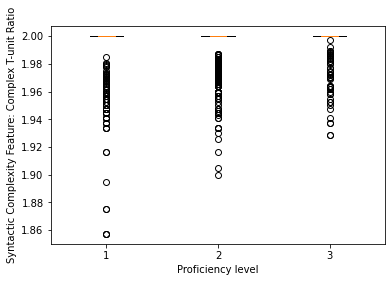

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


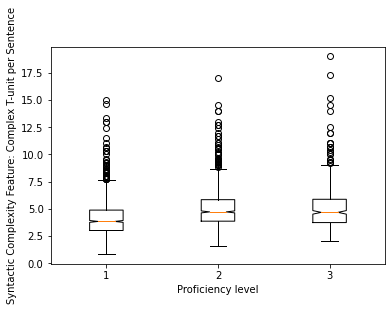

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


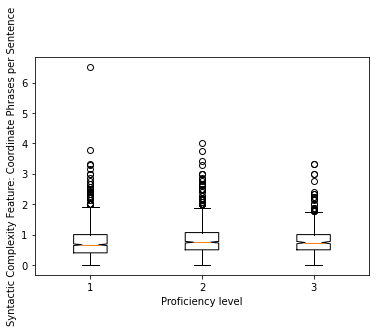

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


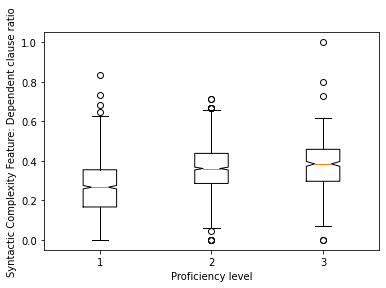

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


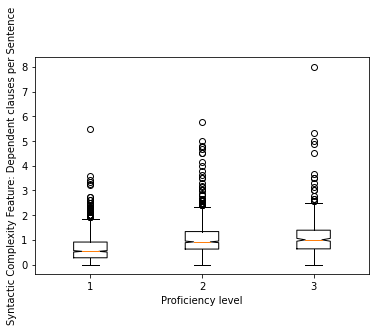

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


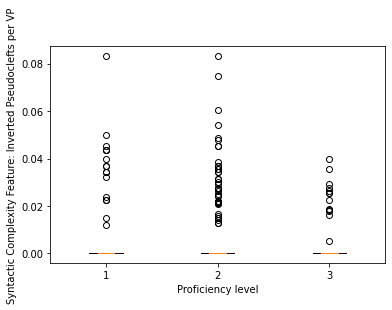

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


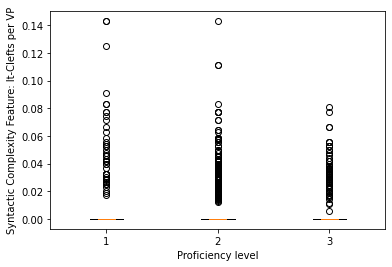

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


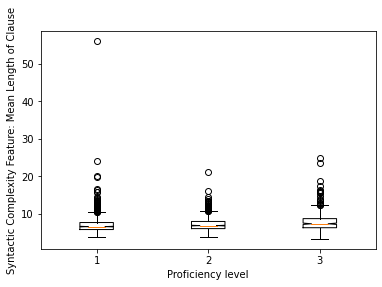

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


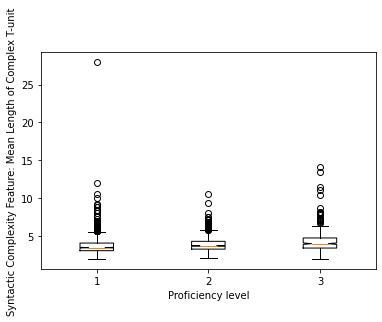

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


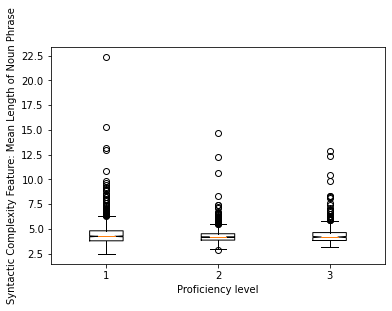

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


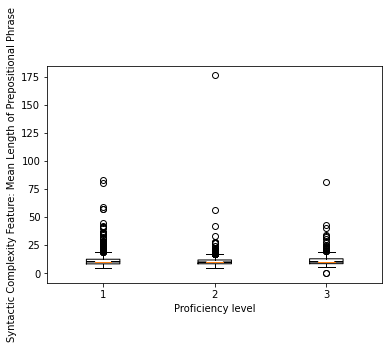

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


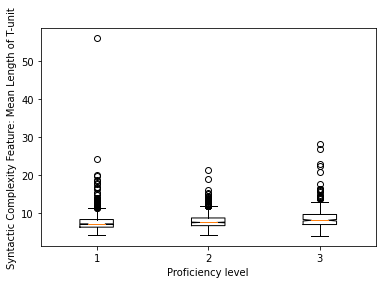

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


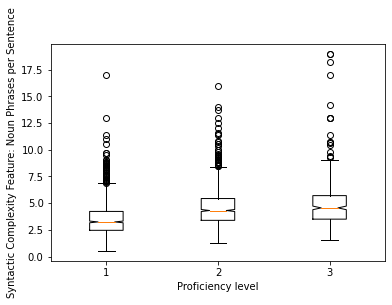

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


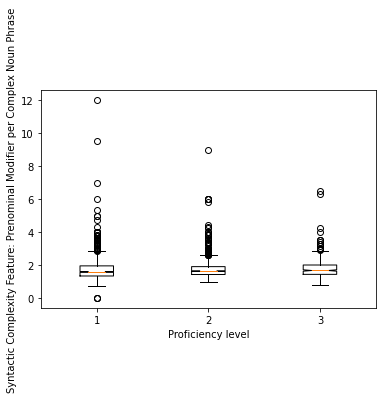

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


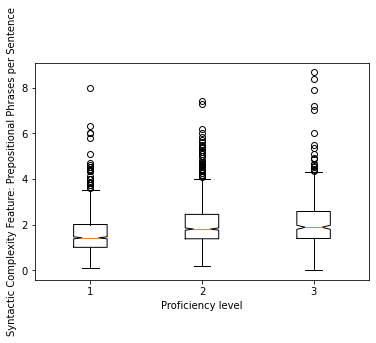

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


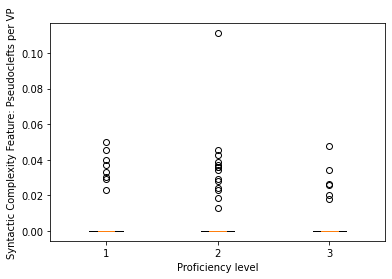

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


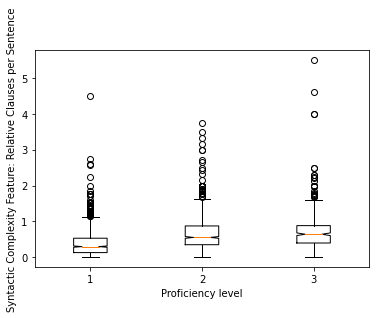

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


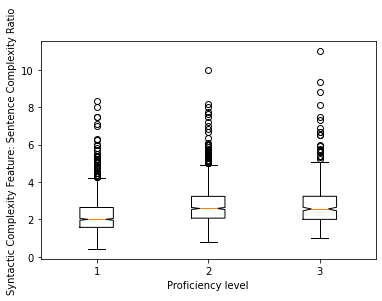

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


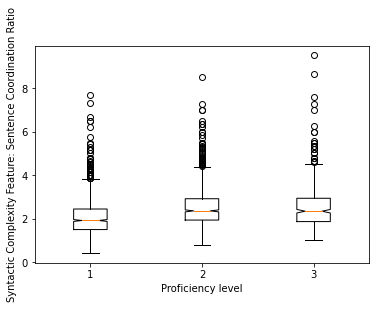

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


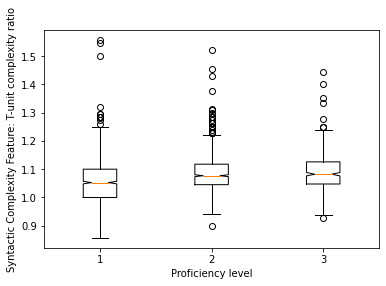

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


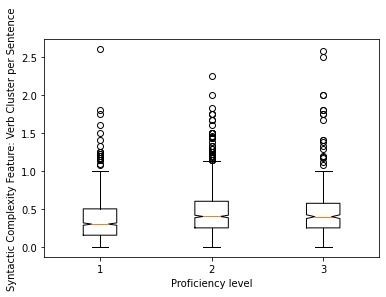

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


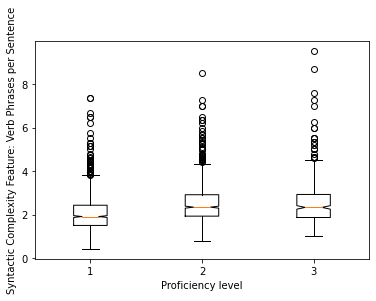

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


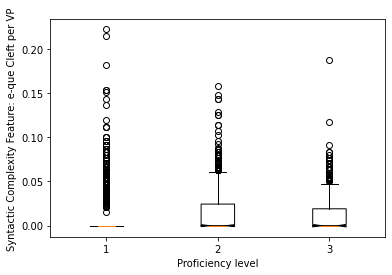

In [50]:
for feature in syntactic:
  a = df.loc[df['Proficiency'] == 1, feature]
  b = df.loc[df['Proficiency'] == 2, feature]
  c = df.loc[df['Proficiency'] == 3, feature]
  columns = [a, b, c]
  #plt.rcParams["figure.figsize"] = (7,7)
  fig, ax = plt.subplots()
  #plt.ylim(0, 1300)
  plt.ylabel(feature)
  plt.xlabel('Proficiency level')
  ax.boxplot(columns, notch=True, showfliers=True)
  plt.show()

Number of Syntactic Constituents: Passive Sentences


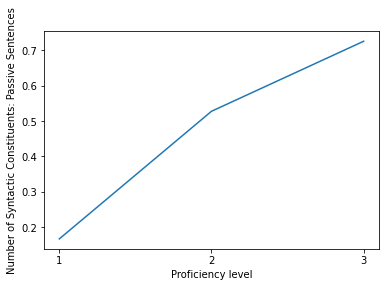

 
Number of Syntactic Constituents: Coordinate Phrases


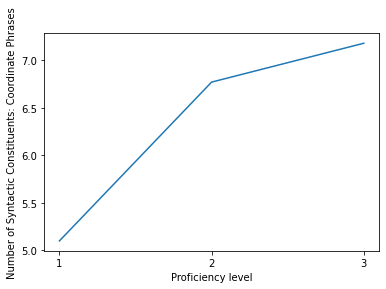

 
Number of Syntactic Constituents: Dependent Clauses


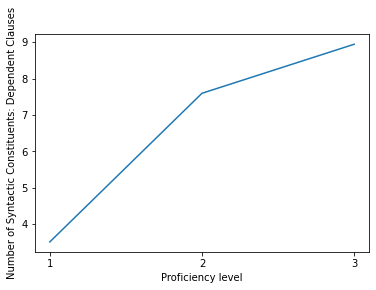

 
Number of Syntactic Constituents: Relative Clauses


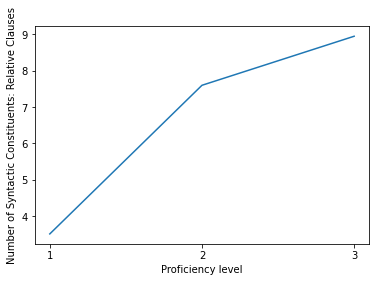

 
Syntactic Complexity Feature: Complex Nominals per Sentence


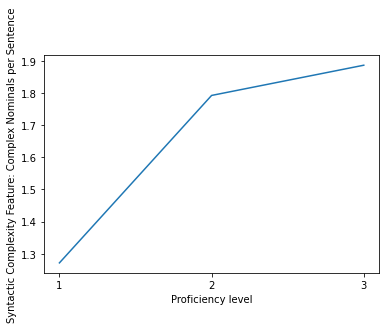

 
Syntactic Complexity Feature: Complex T-unit Ratio


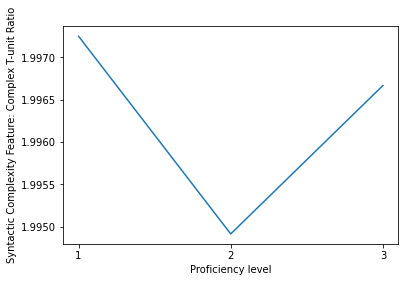

 
Syntactic Complexity Feature: Complex T-unit per Sentence


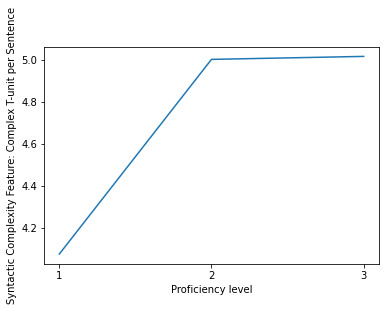

 
Syntactic Complexity Feature: Coordinate Phrases per Sentence


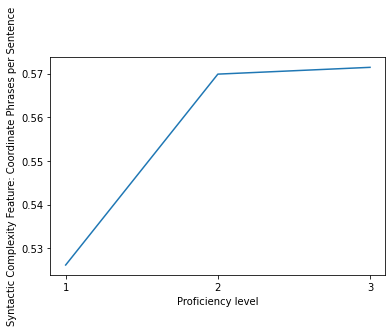

 
Syntactic Complexity Feature: Dependent clause ratio


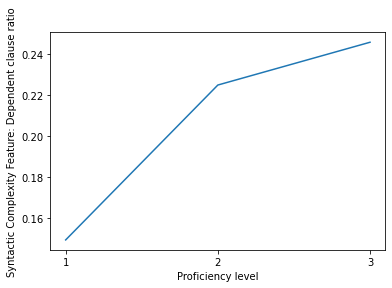

 
Syntactic Complexity Feature: Dependent clauses per Sentence


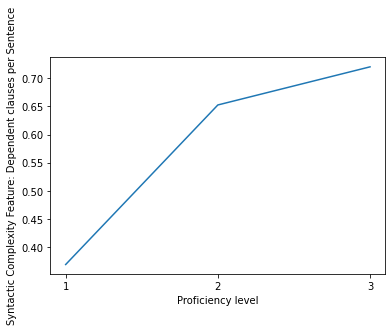

 
Syntactic Complexity Feature: Inverted Pseudoclefts per VP


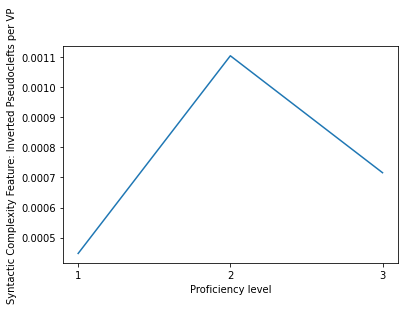

 
Syntactic Complexity Feature: It-Clefts per VP


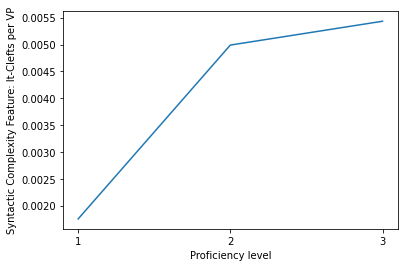

 
Syntactic Complexity Feature: Mean Length of Clause


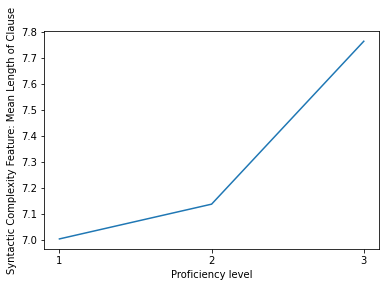

 
Syntactic Complexity Feature: Mean Length of Complex T-unit


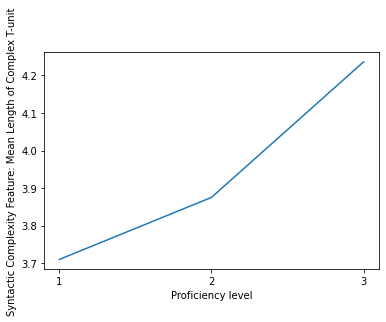

 
Syntactic Complexity Feature: Mean Length of Noun Phrase


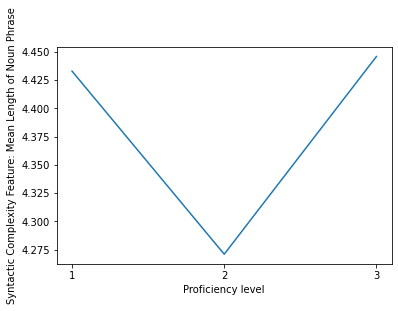

 
Syntactic Complexity Feature: Mean Length of Prepositional Phrase


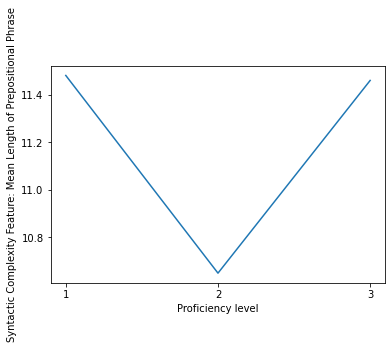

 
Syntactic Complexity Feature: Mean Length of T-unit


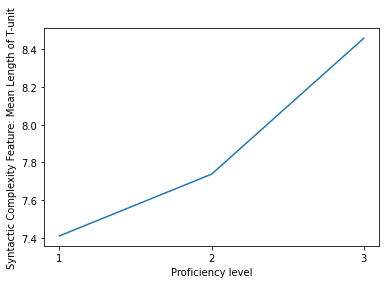

 
Syntactic Complexity Feature: Noun Phrases per Sentence


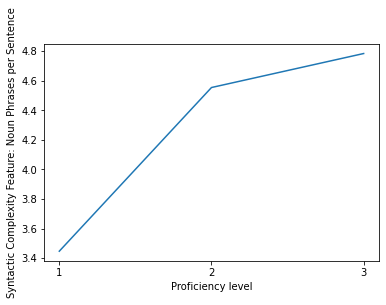

 
Syntactic Complexity Feature: Prenominal Modifier per Complex Noun Phrase


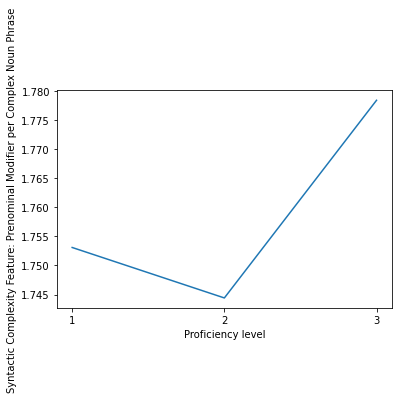

 
Syntactic Complexity Feature: Prepositional Phrases per Sentence


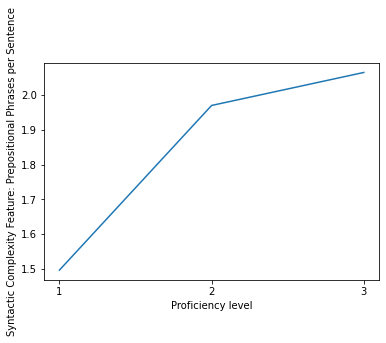

 
Syntactic Complexity Feature: Pseudoclefts per VP


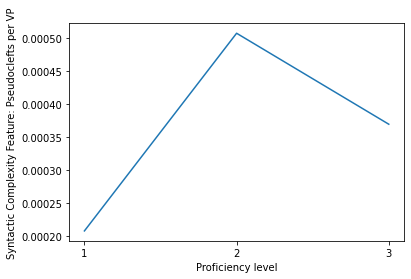

 
Syntactic Complexity Feature: Relative Clauses per Sentence


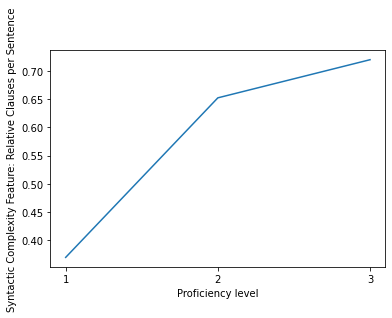

 
Syntactic Complexity Feature: Sentence Complexity Ratio


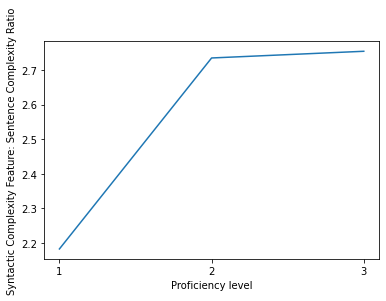

 
Syntactic Complexity Feature: Sentence Coordination Ratio


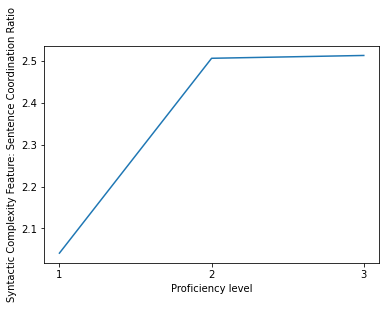

 
Syntactic Complexity Feature: T-unit complexity ratio


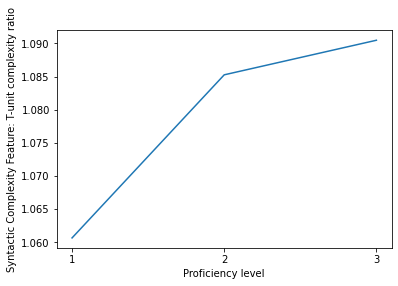

 
Syntactic Complexity Feature: Verb Cluster per Sentence


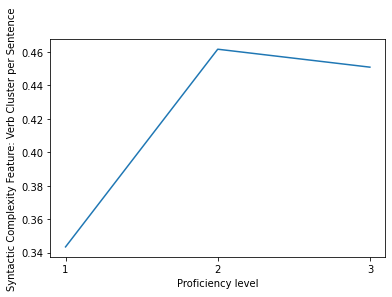

 
Syntactic Complexity Feature: Verb Phrases per Sentence


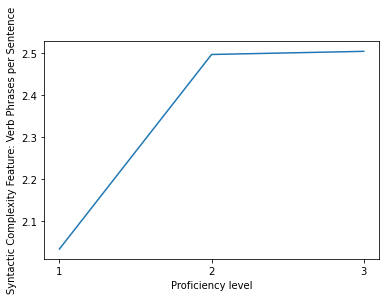

 
Syntactic Complexity Feature: e-que Cleft per VP


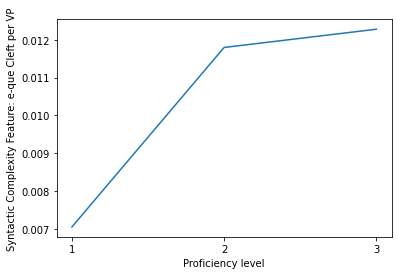

In [ ]:
for feature in syntactic:
  print(feature)
  df.groupby(['Proficiency'])[feature].mean().plot()
  plt.ylabel(feature)
  plt.xlabel('Proficiency level')
  plt.xticks(range(1, 4))
  plt.show()
  print(" ")

In [ ]:
cohesion = ['Number of Connectives: Mendes Additive Connectives',
'Number of Connectives: Mendes All Connectives',
'Number of Connectives: Mendes Causal Connectives',
'Number of Connectives: Mendes Concessive Connectives',
'Number of Connectives: Mendes Single-Word Connectives',
'Number of Connectives: Mendes Temporal Connectives',
'Cohesive Complexity Feature: Mendes Additive Connectives per Token',
'Cohesive Complexity Feature: Mendes All Connectives per Token',
'Cohesive Complexity Feature: Mendes Causal Connectives per Token',
'Cohesive Complexity Feature: Mendes Concessive Connectives per Token',
'Cohesive Complexity Feature: Mendes Single-Word Connectives per Connective',
'Cohesive Complexity Feature: Mendes Single-Word Connectives per Token']

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


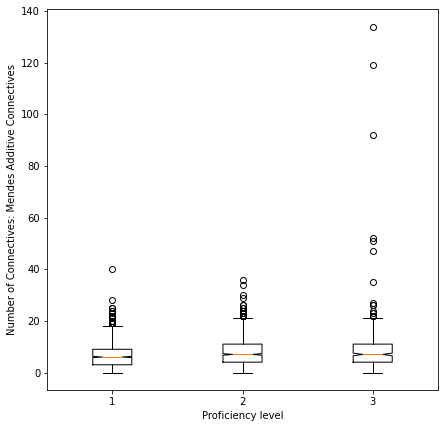

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


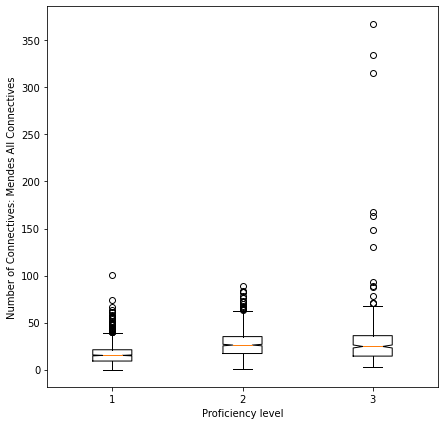

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


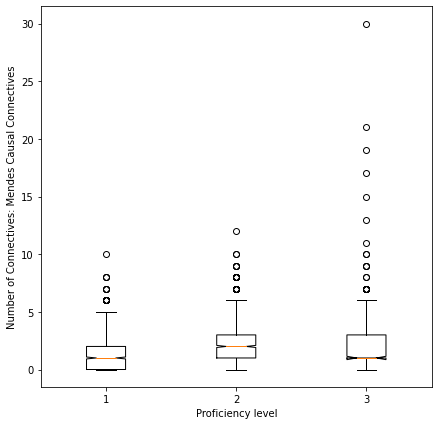

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


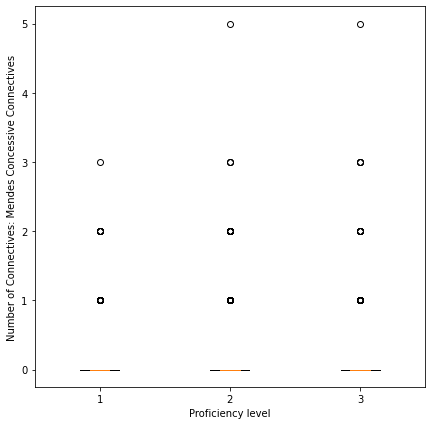

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


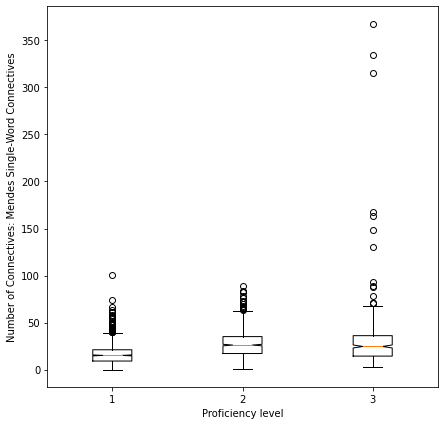

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


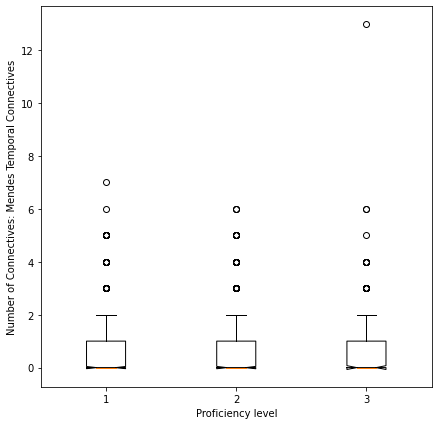

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


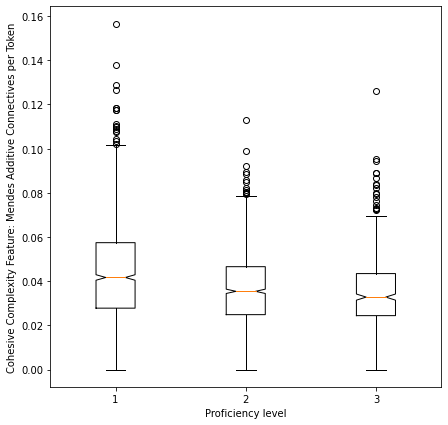

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


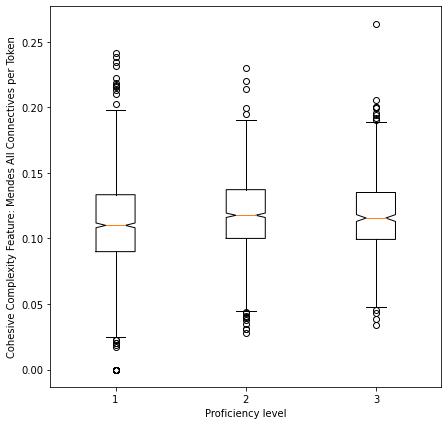

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


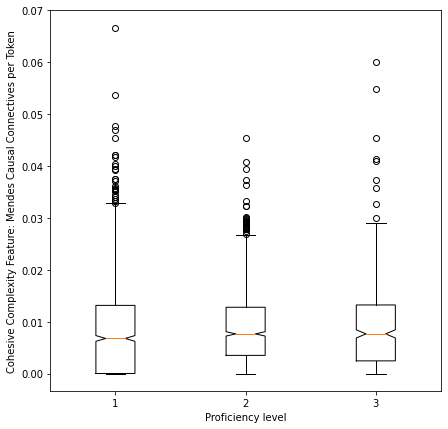

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


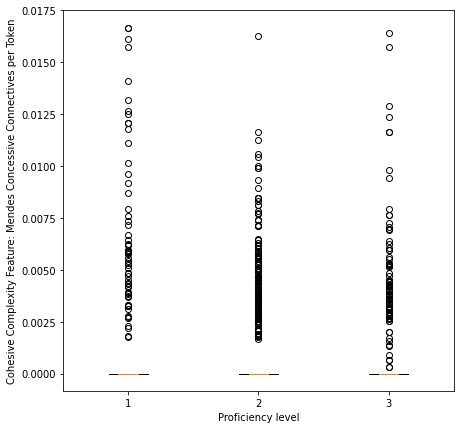

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


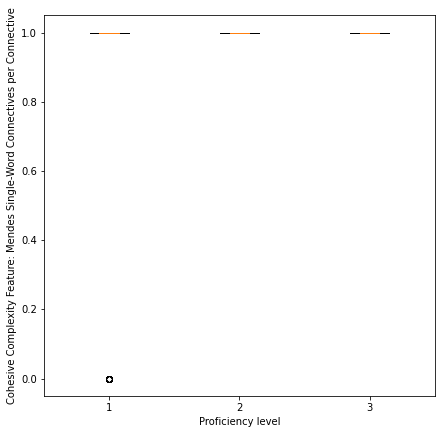

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


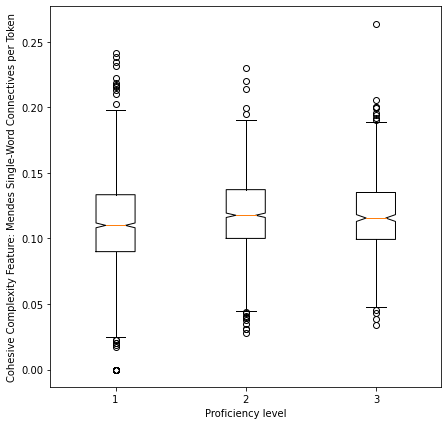

In [ ]:
for feature in cohesion:
  a = df.loc[df['Proficiency'] == 1, feature]
  b = df.loc[df['Proficiency'] == 2, feature]
  c = df.loc[df['Proficiency'] == 3, feature]
  columns = [a, b, c]
  #plt.rcParams["figure.figsize"] = (7,7)
  fig, ax = plt.subplots()
  #plt.ylim(0, 1300)
  plt.ylabel(feature)
  plt.xlabel('Proficiency level')
  ax.boxplot(columns, notch=True, showfliers=True)
  plt.show()

Number of Connectives: Mendes Additive Connectives


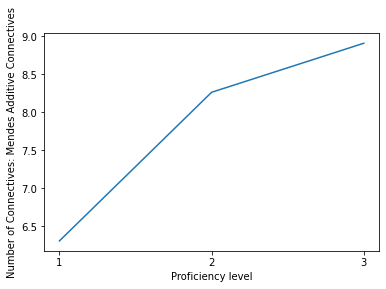

 
Number of Connectives: Mendes All Connectives


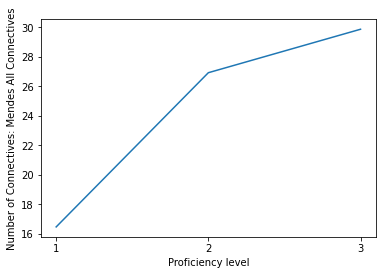

 
Number of Connectives: Mendes Causal Connectives


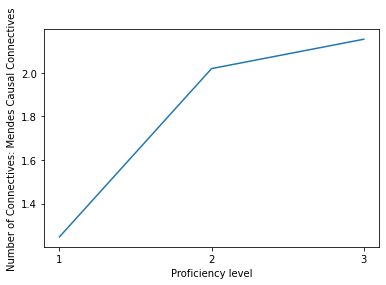

 
Number of Connectives: Mendes Concessive Connectives


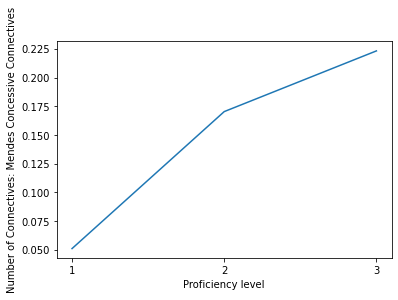

 
Number of Connectives: Mendes Single-Word Connectives


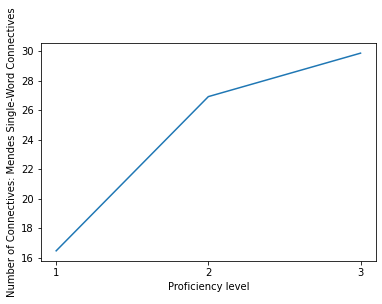

 
Number of Connectives: Mendes Temporal Connectives


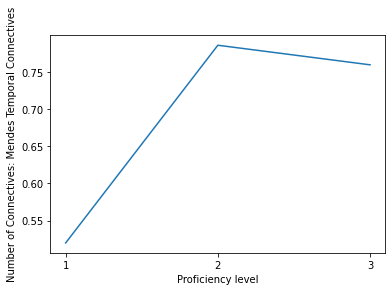

 
Cohesive Complexity Feature: Mendes Additive Connectives per Token


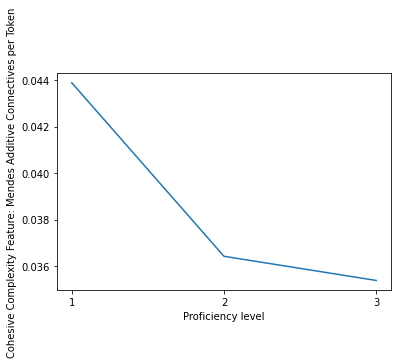

 
Cohesive Complexity Feature: Mendes All Connectives per Token


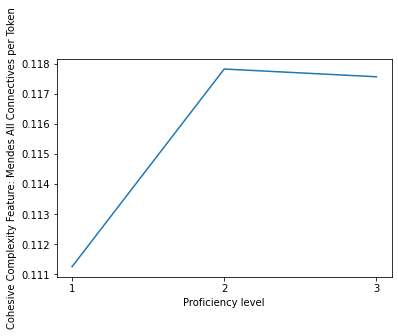

 
Cohesive Complexity Feature: Mendes Causal Connectives per Token


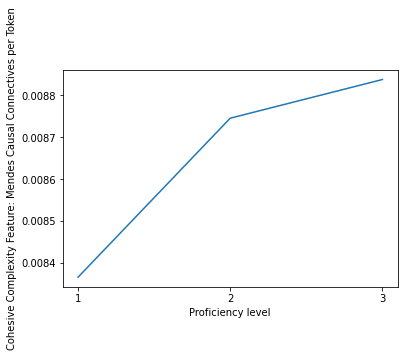

 
Cohesive Complexity Feature: Mendes Concessive Connectives per Token


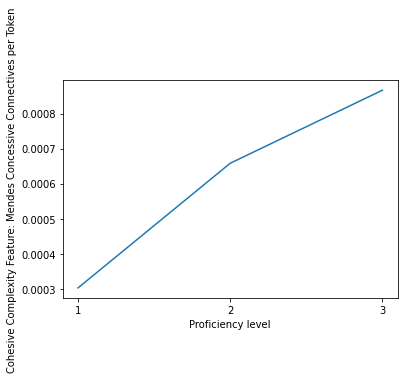

 
Cohesive Complexity Feature: Mendes Single-Word Connectives per Connective


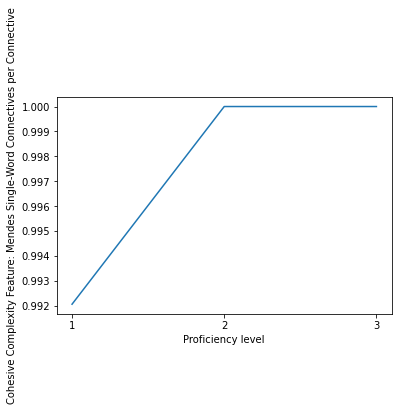

 
Cohesive Complexity Feature: Mendes Single-Word Connectives per Token


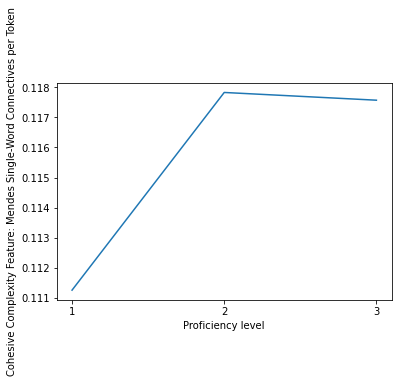

In [ ]:
for feature in cohesion:
  print(feature)
  df.groupby(['Proficiency'])[feature].mean().plot()
  plt.ylabel(feature)
  plt.xlabel('Proficiency level')
  plt.xticks(range(1, 4))
  plt.show()
  print(" ")

# 3. **ML Starting Point**

In [67]:
import csv
import numpy as np
import pandas as pd
from google.colab import files
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [276]:
df = pd.read_csv("NLI-PT_all_features_new_noNaN.csv", encoding= 'unicode_escape')

In [ ]:
len(df)

2753

In [ ]:
len(df.columns)

436

In [277]:
df.head()

ï»¿                    Text_Title  \
0    0        ara_A_006CAETF_cop.txt   
1    1        ara_A_006CAETI_cop.txt   
2    3        ara_A_008CVETD_cop.txt   
3    4        ara_A_008CVETF_cop.txt   
4    5  ara_A_CA.A2.22.75.3S_pea.txt   

   Cohesive Complexity Feature: Mendes Additive Connectives per Token  \
0                                           0.043165                    
1                                           0.073171                    
2                                           0.100000                    
3                                           0.100529                    
4                                           0.020833                    

   Cohesive Complexity Feature: Mendes All Connectives per Token  \
0                                           0.086331               
1                                           0.186992               
2                                           0.111111               
3                                           0.148148               
4                                           0.078125               

   Cohesive Complexity Feature: Mendes Causal Connectives per Token  \
0                                            0.00000                  
1                                            0.00813                  
2                                            0.00000                  
3                                            0.00000                  
4                                            0.00000                  

   Cohesive Complexity Feature: Mendes Concessive Connectives per Token  \
0                                                0.0                      
1                                                0.0                      
2                                                0.0                      
3                                                0.0                      
4                                                0.0                      

   Cohesive Complexity Feature: Mendes Multi- to Single-Word Connectives  \
0                                                  0                       
1                                                  0                       
2                                                  0                       
3                                                  0                       
4                                                  0                       

   Cohesive Complexity Feature: Mendes Multi-Word Connectives per Connective  \
0                                                  0                           
1                                                  0                           
2                                                  0                           
3                                                  0                           
4                                                  0                           

   Cohesive Complexity Feature: Mendes Other Connectives per Token  \
0                                                  0                 
1                                                  0                 
2                                                  0                 
3                                                  0                 
4                                                  0                 

   Cohesive Complexity Feature: Mendes Single-Word Connectives per Connective  \
0                                                  1                            
1                                                  1                            
2                                                  1                            
3                                                  1                            
4                                                  1                            

   ...  Syntactic Complexity Feature: Verb Cluster per Clause  \
0  ...                                           0.300000       
1  ...                                           0.266667   

In [278]:
df = df.drop('ï»¿', axis=1)

In [279]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, 445].values

In [280]:
X = StandardScaler().fit_transform(X)

In [263]:
#X = preprocessing.scale(X)

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=True)

* **Best model selection**

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [ ]:
scores = []
membersProcessed = 0
for model_name, mp in model_params.items():  
  clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
  clf.fit(X_train, y_train)
  scores.append({
      'model': model_name,
      'best_score': clf.best_score_,
      'best_params': clf.best_params_
  })
  membersProcessed += 1
  print (f'Progress: {membersProcessed}/{len(model_params.items())}')
    
results = pd.DataFrame(scores,columns=['model','best_score','best_params'])
results

* **Simple SVC without cross-validation or grid-seach**

In [70]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [71]:
predictions = svm_model.predict(X_test)

In [72]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.78      0.77      0.78       189
           2       0.68      0.70      0.69       169
           3       0.30      0.27      0.29        55

    accuracy                           0.68       413
   macro avg       0.59      0.58      0.58       413
weighted avg       0.67      0.68      0.68       413



In [73]:
print(metrics.confusion_matrix(y_test, predictions))

[[146  34   9]
 [ 24 119  26]
 [ 17  23  15]]


* **Principal Component Analysis**

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [76]:
print(principalDf.min())
print(principalDf.max())

principal component 1   -20.191884
principal component 2   -23.098447
dtype: float64
principal component 1    139.732389
principal component 2     57.766808
dtype: float64


In [77]:
finalDf = pd.concat([principalDf, df[['Proficiency']]], axis = 1)

In [ ]:
finalDf.head()

principal component 1  principal component 2  Proficiency
0              -1.881820             -11.867077            1
1              -8.044250               4.631111            1
2              -7.958114              -6.936691            1
3              -4.757305               3.786618            1
4              -0.325580              -1.466896            1

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


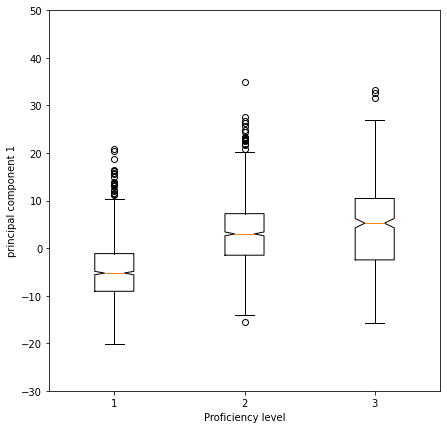

In [78]:
#Visualize distribution of principal component 1 thoughout proficiency levels
a = finalDf.loc[finalDf['Proficiency'] == 1, 'principal component 1']
b = finalDf.loc[finalDf['Proficiency'] == 2, 'principal component 1']
c = finalDf.loc[finalDf['Proficiency'] == 3, 'principal component 1']
columns = [a, b, c]
plt.rcParams["figure.figsize"] = (7,7)
fig, ax = plt.subplots()
plt.ylim(-30, 50)
plt.ylabel('principal component 1')
plt.xlabel('Proficiency level')
ax.boxplot(columns, notch=True, showfliers=True)
plt.show()

In [79]:
a = finalDf.loc[finalDf['Proficiency'] == 1, 'principal component 1'].mean()
print(a)

-4.839862549563332


In [80]:
b = finalDf.loc[finalDf['Proficiency'] == 2, 'principal component 1'].mean()
print(b)

3.1003176224435602


In [81]:
c = finalDf.loc[finalDf['Proficiency'] == 3, 'principal component 1'].mean()
print(c)

5.311309439936723


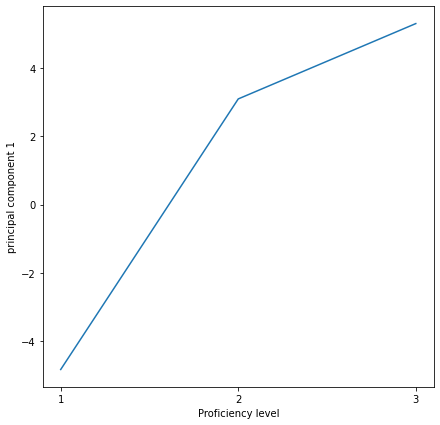

In [83]:
finalDf.groupby(['Proficiency'])['principal component 1'].mean().plot()
plt.ylabel('principal component 1')
plt.xlabel('Proficiency level')
plt.xticks(range(1, 4))
#plt.ylim(-2, 2)
plt.show()

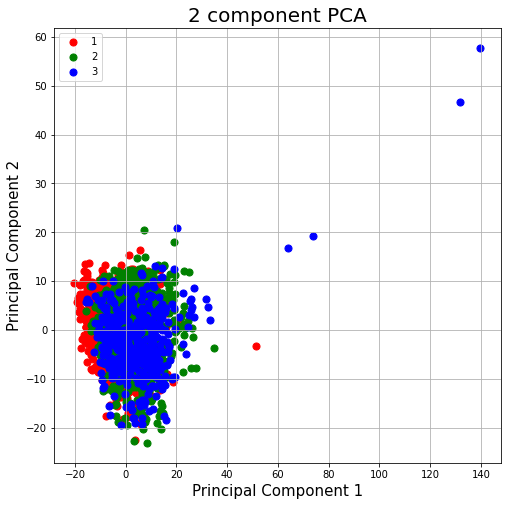

In [85]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 2, 3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Proficiency'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

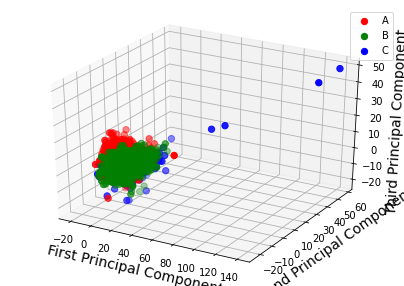

In [86]:
pca = PCA(n_components=3)
pca.fit(X) 
X_pca = pca.transform(X) 

ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio


Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cdict = {1:'red',2:'green', 3:'blue'}
labl = {1:'A',2:'B', 3:'C'}
marker = {1:'o',2:'o', 3:'o'}

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
           label=labl[l], marker=marker[l])
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

* **Linear Discriminant Analysis**

In [281]:
model = LinearDiscriminantAnalysis()

In [282]:
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.660 (0.021)


In [285]:
target_names = (1,2,3)
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

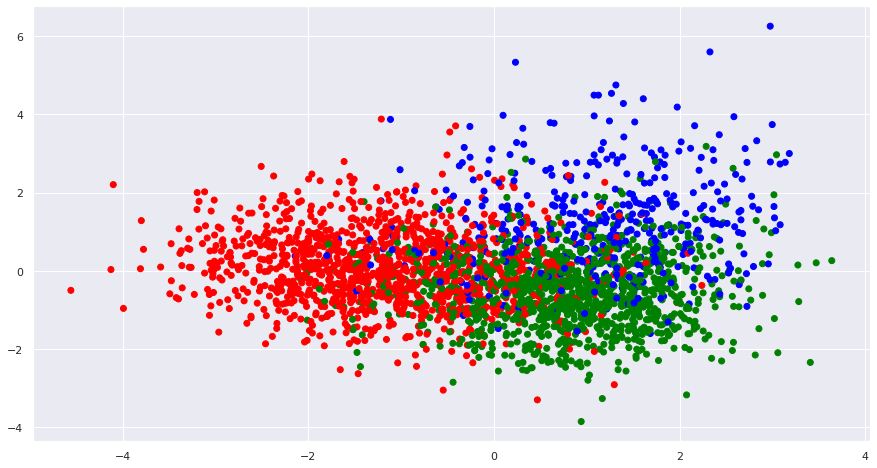

In [286]:
#Plot LDA
plt.figure(figsize=(15, 8))
colors = {1:'red', 2:'green', 3:'blue'}
plt.scatter(X_r2[:,0],X_r2[:,1],  c=df['Proficiency'].map(colors))
plt.show()

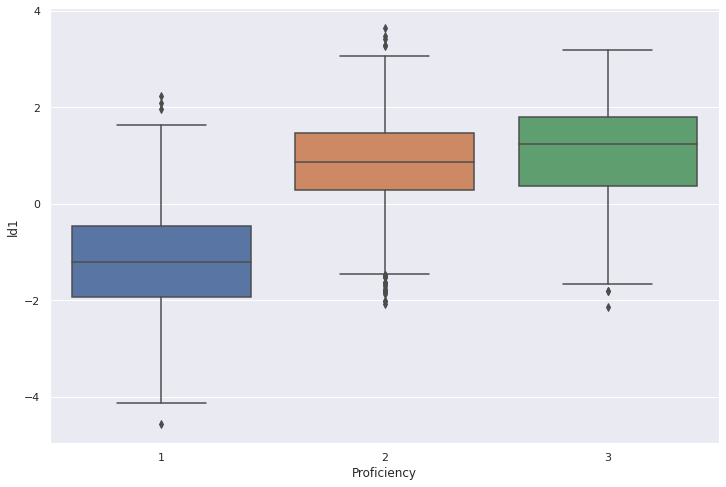

In [287]:
# Verify LDA distribution throughout levels
df4=pd.DataFrame(zip(X_r2[:,0],X_r2[:,1],y),columns=["ld1","ld2","Proficiency"])

sns.set(rc={'figure.figsize':(12,8)})

#subplot(2,1,1)
sns.boxplot(x='Proficiency', y='ld1', data=df4)
#subplot(2,1,2)
#sns.boxplot(x='Level', y='ld2', data=df)

* **GS + CV**

In [ ]:
param = {'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
          'C': (1,52,10),
         'degree':[3,8],
         'coef0':[0.001,10,0.5],
         'gamma':('auto', 'scale')}

In [ ]:
SVModel=SVC()
gridS=GridSearchCV(SVModel, param, cv=5, verbose = 3)
gridS.fit(X_train, y_train)
gridS.cv_results_

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END C=1, coef0=0.001, degree=3, gamma=auto, kernel=linear;, score=0.646 total time=   5.6s
[CV 2/5] END C=1, coef0=0.001, degree=3, gamma=auto, kernel=linear;, score=0.629 total time=   5.2s
[CV 3/5] END C=1, coef0=0.001, degree=3, gamma=auto, kernel=linear;, score=0.631 total time=   8.1s
[CV 4/5] END C=1, coef0=0.001, degree=3, gamma=auto, kernel=linear;, score=0.656 total time=   4.8s
[CV 5/5] END C=1, coef0=0.001, degree=3, gamma=auto, kernel=linear;, score=0.629 total time=   5.6s
[CV 1/5] END C=1, coef0=0.001, degree=3, gamma=auto, kernel=poly;, score=0.619 total time=   0.8s
[CV 2/5] END C=1, coef0=0.001, degree=3, gamma=auto, kernel=poly;, score=0.692 total time=   0.9s
[CV 3/5] END C=1, coef0=0.001, degree=3, gamma=auto, kernel=poly;, score=0.646 total time=   0.9s
[CV 4/5] END C=1, coef0=0.001, degree=3, gamma=auto, kernel=poly;, score=0.637 total time=   0.9s
[CV 5/5] END C=1, coef0=0.001, degree=3, gamm

* Best parameters

In [99]:
svm_model = SVC(C=10, coef0=0.5, degree=3, gamma='scale', kernel='rbf')
svm_model.fit(X_train, y_train)

SVC(C=10, coef0=0.5)

In [100]:
predictions = svm_model.predict(X_test)

In [101]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.76      0.79      0.77       189
           2       0.72      0.73      0.73       169
           3       0.43      0.36      0.40        55

    accuracy                           0.71       413
   macro avg       0.64      0.63      0.63       413
weighted avg       0.70      0.71      0.70       413



In [102]:
print(metrics.confusion_matrix(y_test, predictions))

[[149  34   6]
 [ 26 123  20]
 [ 22  13  20]]


In [310]:
df['Proficiency'].value_counts()[1]

1193

In [305]:
df['Proficiency'].value_counts()[2]

1136

In [128]:
df['Proficiency'].value_counts()[3]

424

* **Balance data by oversampling**

In [103]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({2: 1004, 1: 1004, 3: 1004})
Testing target statistics: Counter({1: 189, 2: 169, 3: 55})


In [104]:
svm_model.fit(X_res, y_res)

SVC(C=10, coef0=0.5)

In [105]:
predictions = svm_model.predict(X_test)

In [106]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.76      0.78      0.77       189
           2       0.73      0.72      0.72       169
           3       0.46      0.42      0.44        55

    accuracy                           0.71       413
   macro avg       0.65      0.64      0.64       413
weighted avg       0.71      0.71      0.71       413



* **Balance data by undersampling**

In [107]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({1: 369, 2: 369, 3: 369})
Testing target statistics: Counter({1: 189, 2: 169, 3: 55})


In [108]:
svm_model.fit(X_res, y_res)

SVC(C=10, coef0=0.5)

In [109]:
predictions = svm_model.predict(X_test)

In [110]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.75      0.70      0.73       189
           2       0.68      0.54      0.61       169
           3       0.28      0.53      0.37        55

    accuracy                           0.61       413
   macro avg       0.57      0.59      0.57       413
weighted avg       0.66      0.61      0.63       413



In [111]:
print(metrics.confusion_matrix(y_test, predictions))

[[132  34  23]
 [ 26  92  51]
 [ 17   9  29]]


* ## **Feature Selection with WEKA**

In [299]:
# 34 features have been selected by WEKA
df2 = df[['Cohesive Complexity Feature: Mendes Additive Connectives per Token',
                     'Cohesive Complexity Feature: Mendes Concessive Connectives per Token',
                     'Lexical Richness: Type Token Ratio (10 Segments)',
                     'Lexical Richness: Type Token Ratio (Log10 TTR Verbs)',
                     'Lexical Sophistication Feature: Imageability (AW Type)',
                     'Lexical Sophistication Feature: SUBTLEX Frequency Band 2',
                     'Lexical Sophistication Feature: SUBTLEX Frequency Band 3',
                     'Lexical Sophistication Feature: SUBTLEX Frequency Band 4',
                     'Lexical Sophistication Feature: SUBTLEX Frequency Band 7',
                     'Lexical Sophistication Feature: SUBTLEX Frequency Top 3000',
                     'Lexical Sophistication Feature: SUBTLEX Frequency Top 4000',
                     'Lexical Sophistication Feature: SUBTLEX Frequency Top 6000 and Below',
                     'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (AW Type)',
                     'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (FW Type)',
                     'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD AW Token)',
                     'Mean Global Edit Distance for Lemmas',
                     'Morphological Complexity Inflection Feature: First Person per word token',
                     'Morphological Complexity Inflection Feature: Indicatives per Verb',
                     'Morphological Complexity Inflection Feature: Masculine inflection per word token',
                     'Morphological Complexity Inflection Feature: Subjunctives per verb token',
                     'Morphological Complexity Inflection Feature: Subjunctives per word token',
                     'Morphological Complexity Inflection Feature: Third Person per word token',
                     'Number of Morphological Features: Pluperfect Verb per VP',
                     'Number of Morphological Features: Subjunctive Verb per VP',
                     'POS Density Feature: Article',
                     'POS Density Feature: Cardinal Number',
                     'POS Density Feature: Coordinating Conjunction',
                     'POS Density Feature: Determiner',
                     'POS Density Feature: Foreign Word',
                     'POS Density Feature: Interjection',
                     'Referential Cohesion: SD of Global Lexical Overlap (lemma-based)',
                     'Syntactic Complexity Feature: Dependent clauses per T-unit',
                     'Syntactic Complexity Feature: It-Clefts per VP',
                     'Syntactic Complexity Feature: Relative Clauses per Clause',
                     'Proficiency']]

In [270]:
df2.head()

Cohesive Complexity Feature: Mendes Additive Connectives per Token  \
0                                           0.043165                    
1                                           0.073171                    
2                                           0.100000                    
3                                           0.100529                    
4                                           0.020833                    

   Cohesive Complexity Feature: Mendes Concessive Connectives per Token  \
0                                                0.0                      
1                                                0.0                      
2                                                0.0                      
3                                                0.0                      
4                                                0.0                      

   Lexical Richness: Type Token Ratio (10 Segments)  \
0                                          0.907143   
1                                          0.933333   
2                                          0.911111   
3                                          0.815789   
4                                          0.873684   

   Lexical Richness: Type Token Ratio (Log10 TTR Verbs)  \
0                                           0.936921      
1                                           0.939067      
2                                           0.978602      
3                                           0.921880      
4                                           0.921880      

   Lexical Sophistication Feature: Imageability (AW Type)  \
0                                           4.460625        
1                                           5.192632        
2                                           5.794545        
3                                           5.214500        
4                                           4.941111        

   Lexical Sophistication Feature: SUBTLEX Frequency Band 2  \
0                                           0.021583          
1                                           0.008130          
2                                           0.022222          
3                                           0.010582          
4                                           0.000000          

   Lexical Sophistication Feature: SUBTLEX Frequency Band 3  \
0                                           0.028777          
1                                           0.024390          
2                                           0.044444          
3                                           0.021164          
4                                           0.031250          

   Lexical Sophistication Feature: SUBTLEX Frequency Band 4  \
0                                           0.251799          
1                                           0.154472          
2                                           0.100000          
3                                           0.084656          
4                                           0.197917          

   Lexical Sophistication Feature: SUBTLEX Frequency Band 7  \
0                                           0.330935          
1                                           0.276423          
2                                           0.288889          
3                                           0.328042          
4                                           0.265625          

   Lexical Sophistication Feature: SUBTLEX Frequency Top 3000  ...  \
0                                           0.007194           ...   
1                                           0.040650           ...   
2                                           0.000000           ...   
3                                           0.010582           ...   
4                                           0.036458           ...   

   POS Density Feature: Cardinal Number  \
0                              0.007194   
1                              0.0000

In [289]:
X = df2.iloc[:, :-1].values
y = df2.iloc[:, 34].values

In [290]:
X = StandardScaler().fit_transform(X)

In [ ]:
#X = preprocessing.scale(X)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

In [134]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [135]:
predictions = svm_model.predict(X_test)

In [136]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.76      0.79      0.77       250
           2       0.62      0.80      0.70       225
           3       0.00      0.00      0.00        76

    accuracy                           0.69       551
   macro avg       0.46      0.53      0.49       551
weighted avg       0.60      0.69      0.64       551



In [137]:
print(metrics.confusion_matrix(y_test, predictions))

[[197  52   1]
 [ 44 181   0]
 [ 18  58   0]]


* **PCA with Selected Features**

In [291]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [292]:
finalDf = pd.concat([principalDf, df[['Proficiency']]], axis = 1)

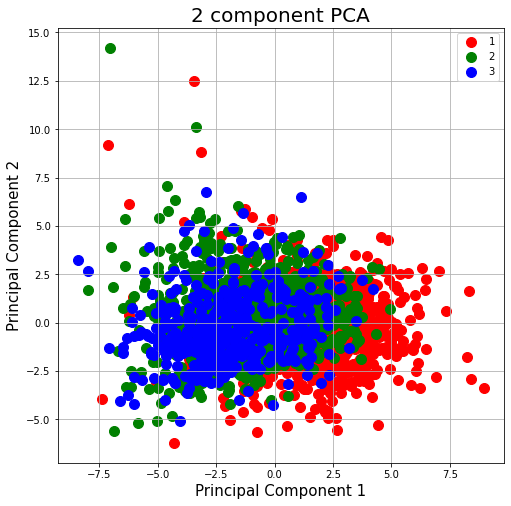

In [140]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 2, 3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Proficiency'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 100)
ax.legend(targets)
ax.grid()

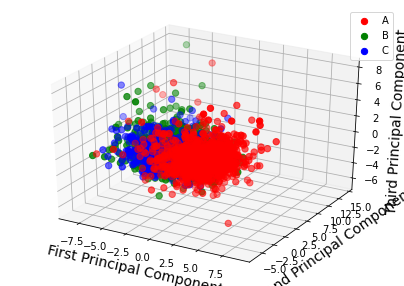

In [141]:
pca = PCA(n_components=3)
pca.fit(X) 
X_pca = pca.transform(X) 

ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio


Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cdict = {1:'red',2:'green', 3:'blue'}
labl = {1:'A',2:'B', 3:'C'}
marker = {1:'o',2:'o', 3:'o'}

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
           label=labl[l], marker=marker[l])
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


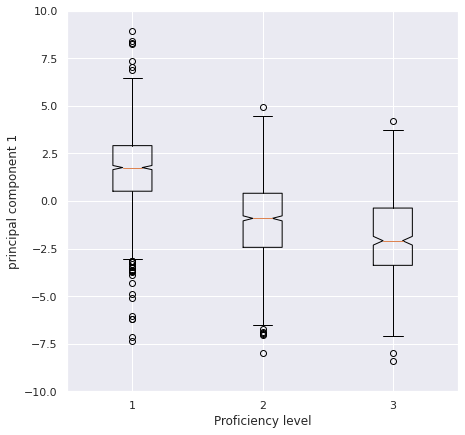

In [275]:
a = finalDf.loc[finalDf['Proficiency'] == 1, 'principal component 1']
b = finalDf.loc[finalDf['Proficiency'] == 2, 'principal component 1']
c = finalDf.loc[finalDf['Proficiency'] == 3, 'principal component 1']
columns = [a, b, c]
plt.rcParams["figure.figsize"] = (7,7)
fig, ax = plt.subplots()
plt.ylim(-10, 10)
plt.ylabel('principal component 1')
plt.xlabel('Proficiency level')
ax.boxplot(columns, notch=True, showfliers=True)
plt.show()

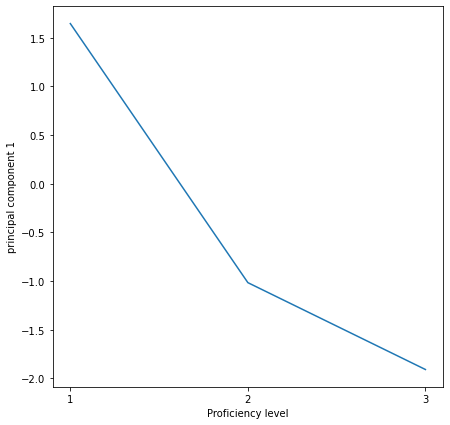

In [143]:
finalDf.groupby(['Proficiency'])['principal component 1'].mean().plot()
plt.ylabel('principal component 1')
plt.xlabel('Proficiency level')
plt.xticks(range(1, 4))
plt.show()

In [144]:
a = finalDf.loc[finalDf['Proficiency'] == 1, 'principal component 1']
print('Level A')
print('Minimum: ',a.min())
print('Maximum: ',a.max())
print('Mean: ',a.mean())

Level A
Minimum:  -7.377502344088059
Maximum:  8.952945852245053
Mean:  1.6460425326442576


In [145]:
b = finalDf.loc[finalDf['Proficiency'] == 2, 'principal component 1']
print('Level B')
print('Minimum: ',b.min())
print('Maximum: ',b.max())
print('Mean: ',b.mean())

Level B
Minimum:  -8.011003891759971
Maximum:  4.957954896702835
Mean:  -1.01620333552814


In [146]:
c = finalDf.loc[finalDf['Proficiency'] == 3, 'principal component 1']
print('Level C')
print('Minimum: ',c.min())
print('Maximum: ',c.max())
print('Mean: ',c.mean())

Level C
Minimum:  -8.426322213193282
Maximum:  4.195994019993047
Mean:  -1.9087777176524345


* **LDA with Selected Features**

In [293]:
model = LinearDiscriminantAnalysis()

In [294]:
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.664 (0.018)


In [295]:
target_names = (1,2,3,4)
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

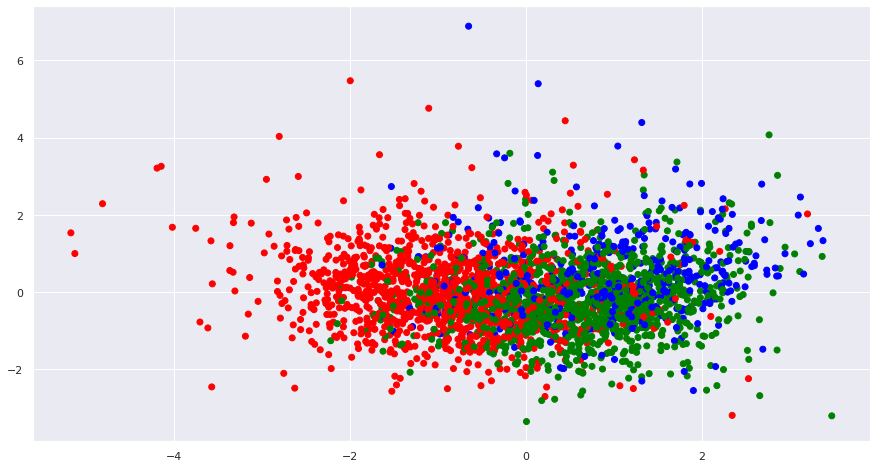

In [296]:
#Plot LDA
plt.figure(figsize=(15, 8))
colors = {1:'red', 2:'green', 3:'blue'}
plt.scatter(X_r2[:,0],X_r2[:,1],  c=df['Proficiency'].map(colors))
plt.show()

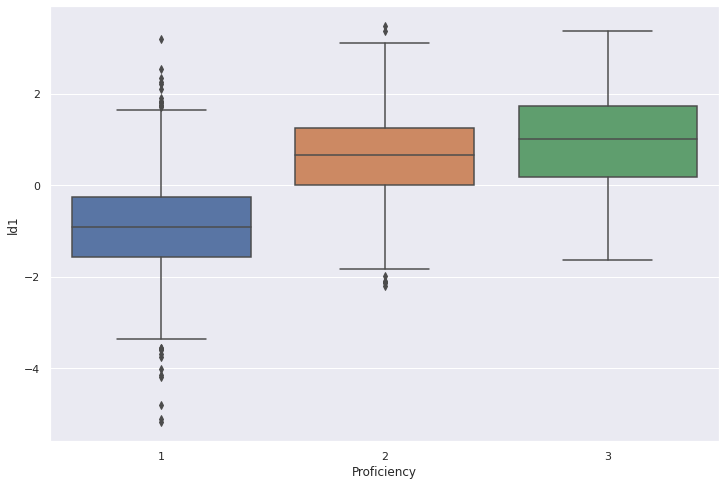

In [297]:
# Verify LDA distribution throughout levels
df4=pd.DataFrame(zip(X_r2[:,0],X_r2[:,1],y),columns=["ld1","ld2","Proficiency"])

sns.set(rc={'figure.figsize':(12,8)})

#subplot(2,1,1)
sns.boxplot(x='Proficiency', y='ld1', data=df4)
#subplot(2,1,2)
#sns.boxplot(x='Level', y='ld2', data=df)

## * **Features Selected by Me**

In [246]:
df = pd.read_csv("NLI-PT_all_features_new_noNaN.csv", encoding= 'unicode_escape')

In [220]:
df3 = df[['Mean Clause Length in Tokens',
'Number of Sentences',
'Number of Tokens',
'Number of Tokens with More Than 2 Syllables',
'Cohesive Complexity Feature: Mendes Causal Connectives per Token', 
'Cohesive Complexity Feature: Mendes Concessive Connectives per Token', 
'Cohesive Complexity Feature: Mendes Additive Connectives per Token',
'Lexical Richness: Type Token Ratio (Corrected TTR)',
'Lexical Sophistication Feature: Age of Acquisition (AW Token)',
'Lexical Sophistication Feature: Concreteness (AW Token)',
'Lexical Sophistication Feature: Familiarity (AW Token)',
'Lexical Sophistication Feature: Imageability (AW Token)',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 2',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 3',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 4',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 6',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 7',
'Lexical Sophistication Feature: SUBTLEX Frequency Top 3000',
'Lexical Sophistication Feature: SUBTLEX Frequency Top 4000',
'Lexical Sophistication Feature: SUBTLEX Frequency Top 6000 and Below',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (AW Token)',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (AW Token)',
'Lexical Variation Feature: Corrected Verb Variation 1',
'Lexical Variation Feature: Adjective',
'Number of Morphological Features: Present Subjunctive Verb per VP',
'Number of Morphological Features: Relative Pronouns',
'Number of Morphological Features: Simple Future Verb per VP',
'Number of Morphological Features: Subjunctive Verb per VP',
'Number of Syntactic Constituents: Clauses',
'Number of Syntactic Constituents: Complex Noun Phrase',
'Number of Syntactic Constituents: Complex T-units',
'Number of Syntactic Constituents: Dependent Clauses',
'Number of Syntactic Constituents: Noun Phrase',
'Number of Syntactic Constituents: Open Clausal Complement',
'Number of Syntactic Constituents: Passive Sentences',
'Number of Syntactic Constituents: Prenominal Noun Modifier',
'Number of Syntactic Constituents: Prepositional Phrase',
'Number of Syntactic Constituents: Relative Clauses',
'Number of Syntactic Constituents: Subordinate Clauses',
'Number of Syntactic Constituents: T-units',
'Number of Syntactic Constituents: Verb Phrase',
'Number of Syntactic Constituents: e-que Clefts',
'Number of Syntactic Constituents: Passive Sentences',
'Referential Cohesion: Global Lemma Overlap',
'Referential Cohesion: SD of Global Lexical Overlap (lemma-based)',
'Mean Local Edit Distance for Lemmas',
'Mean Local Edit Distance for Lemmas',
'Syntactic Complexity Feature: Relative Clauses per Sentence',
'Syntactic Complexity Feature: Mean Length of Clause',
'Syntactic Complexity Feature: Sentence Complexity Ratio',
'Syntactic Complexity Feature: Relative Clauses per Sentence',
'Syntactic Complexity Feature: Prepositional Phrases per Sentence',
'Proficiency']]

In [221]:
df3.head()

Mean Clause Length in Tokens  Number of Sentences  Number of Tokens  \
0                     13.900000                   13               139   
1                      8.200000                    7               123   
2                      6.923077                    5                90   
3                      7.000000                   10               189   
4                      7.384615                    7               192   

   Number of Tokens with More Than 2 Syllables  \
0                                           72   
1                                           74   
2                                           42   
3                                           91   
4                                          100   

   Cohesive Complexity Feature: Mendes Causal Connectives per Token  \
0                                            0.00000                  
1                                            0.00813                  
2                                            0.00000                  
3                                            0.00000                  
4                                            0.00000                  

   Cohesive Complexity Feature: Mendes Concessive Connectives per Token  \
0                                                0.0                      
1                                                0.0                      
2                                                0.0                      
3                                                0.0                      
4                                                0.0                      

   Cohesive Complexity Feature: Mendes Additive Connectives per Token  \
0                                           0.043165                    
1                                           0.073171                    
2                                           0.100000                    
3                                           0.100529                    
4                                           0.020833                    

   Lexical Richness: Type Token Ratio (Corrected TTR)  \
0                                           4.558177    
1                                           5.483160    
2                                           4.173994    
3                                           4.989142    
4                                           5.205166    

   Lexical Sophistication Feature: Age of Acquisition (AW Token)  \
0                                           5.020588               
1                                           2.691304               
2                                           2.643333               
3                                           2.703333               
4                                           3.135429               

   Lexical Sophistication Feature: Concreteness (AW Token)  ...  \
0                                           4.758400        ...   
1                                           4.753636        ...   
2                                           5.878571        ...   
3                                           5.043600        ...   
4                                           4.855000        ...   

   Referential Cohesion: Global Lemma Overlap  \
0                                    0.230769   
1                                    0.000000   
2                                    0.200000   
3                                    0.200000   
4                                    0.285714   

   Referential Cohesion: SD of Global Lexical Overlap (lemma-based)  \
0                                           0.115124                  
1                                           0.031925                  
2                                           0.052705                  
3                                           0.036500                  
4                                           0.041883                  

   Mean Local Edit Distance for Lemmas  Mean Local Edit Distanc

In [222]:
features = ['Mean Clause Length in Tokens',
'Number of Sentences',
'Number of Tokens',
'Number of Tokens with More Than 2 Syllables',
'Cohesive Complexity Feature: Mendes Causal Connectives per Token', 
'Cohesive Complexity Feature: Mendes Concessive Connectives per Token', 
'Cohesive Complexity Feature: Mendes Additive Connectives per Token',
'Lexical Richness: Type Token Ratio (Corrected TTR)',
'Lexical Sophistication Feature: Age of Acquisition (AW Token)',
'Lexical Sophistication Feature: Concreteness (AW Token)',
'Lexical Sophistication Feature: Familiarity (AW Token)',
'Lexical Sophistication Feature: Imageability (AW Token)',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 2',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 3',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 4',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 6',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 7',
'Lexical Sophistication Feature: SUBTLEX Frequency Top 3000',
'Lexical Sophistication Feature: SUBTLEX Frequency Top 4000',
'Lexical Sophistication Feature: SUBTLEX Frequency Top 6000 and Below',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (AW Token)',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (AW Token)',
'Lexical Variation Feature: Corrected Verb Variation 1',
'Lexical Variation Feature: Adjective',
'Number of Morphological Features: Present Subjunctive Verb per VP',
'Number of Morphological Features: Relative Pronouns',
'Number of Morphological Features: Simple Future Verb per VP',
'Number of Morphological Features: Subjunctive Verb per VP',
'Number of Syntactic Constituents: Clauses',
'Number of Syntactic Constituents: Complex Noun Phrase',
'Number of Syntactic Constituents: Complex T-units',
'Number of Syntactic Constituents: Dependent Clauses',
'Number of Syntactic Constituents: Noun Phrase',
'Number of Syntactic Constituents: Open Clausal Complement',
'Number of Syntactic Constituents: Passive Sentences',
'Number of Syntactic Constituents: Prenominal Noun Modifier',
'Number of Syntactic Constituents: Prepositional Phrase',
'Number of Syntactic Constituents: Relative Clauses',
'Number of Syntactic Constituents: Subordinate Clauses',
'Number of Syntactic Constituents: T-units',
'Number of Syntactic Constituents: Verb Phrase',
'Number of Syntactic Constituents: e-que Clefts',
'Number of Syntactic Constituents: Passive Sentences',
'Referential Cohesion: Global Lemma Overlap',
'Referential Cohesion: SD of Global Lexical Overlap (lemma-based)',
'Mean Local Edit Distance for Lemmas',
'Mean Local Edit Distance for Lemmas',
'Syntactic Complexity Feature: Relative Clauses per Sentence',
'Syntactic Complexity Feature: Mean Length of Clause',
'Syntactic Complexity Feature: Sentence Complexity Ratio',
'Syntactic Complexity Feature: Relative Clauses per Sentence',
'Syntactic Complexity Feature: Prepositional Phrases per Sentence']

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


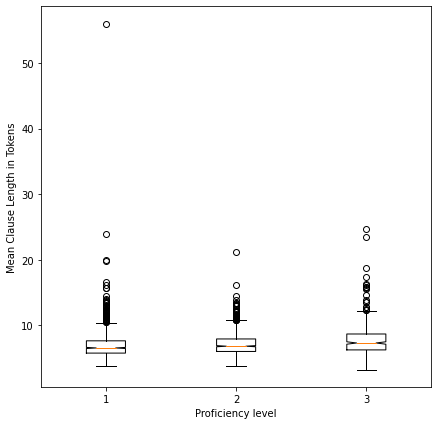

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


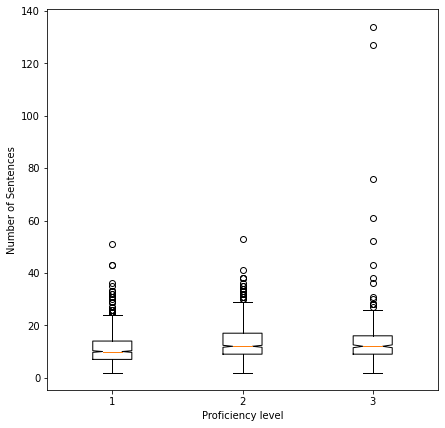

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


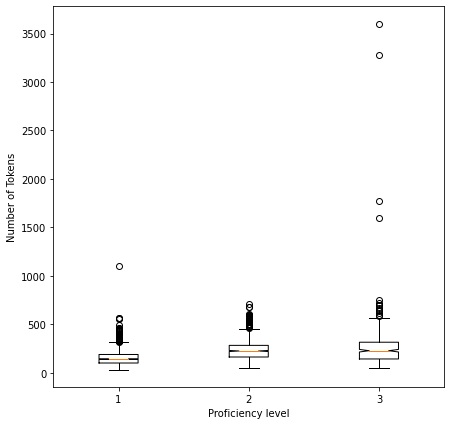

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


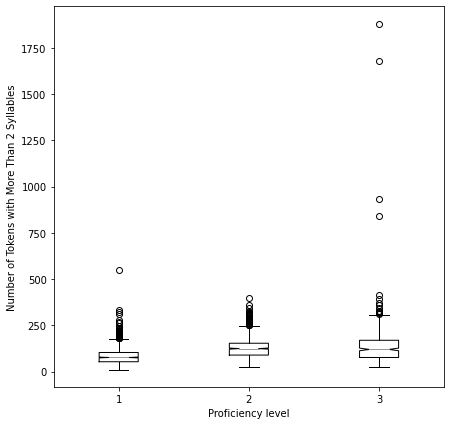

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


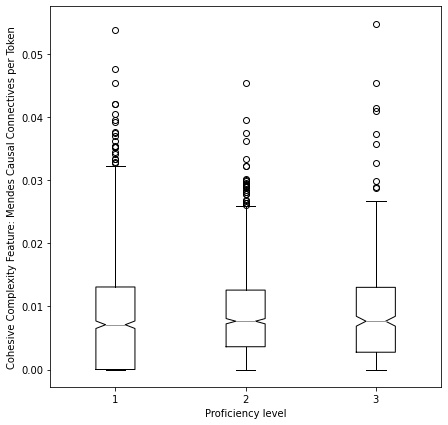

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


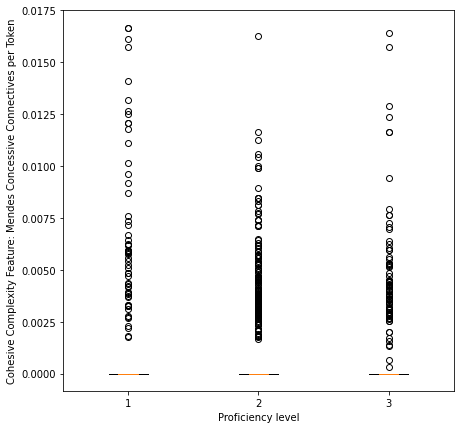

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


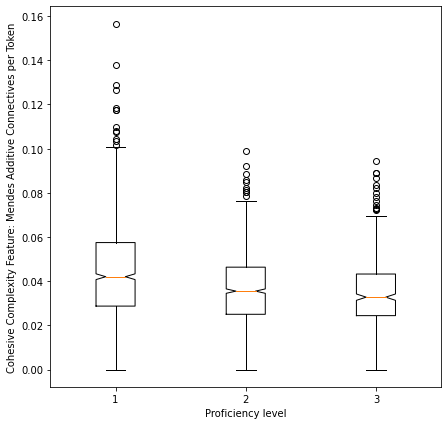

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


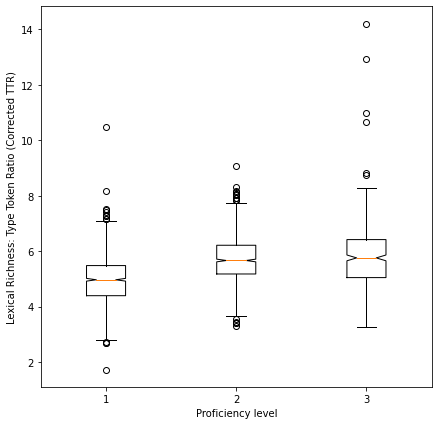

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


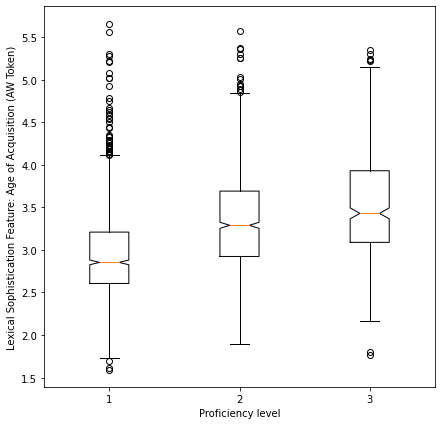

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


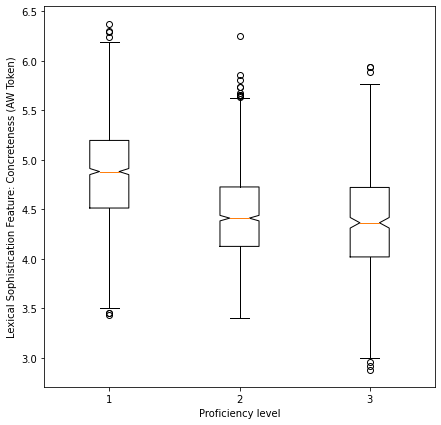

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


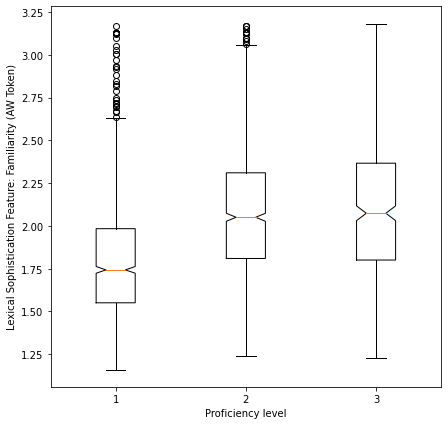

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


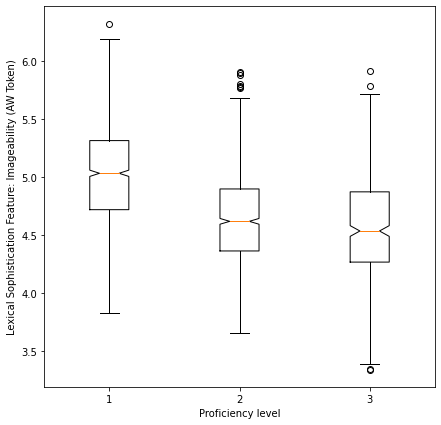

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


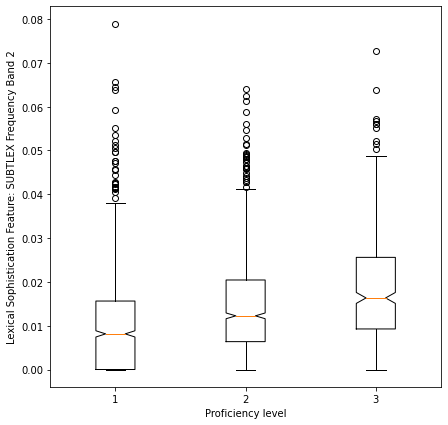

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


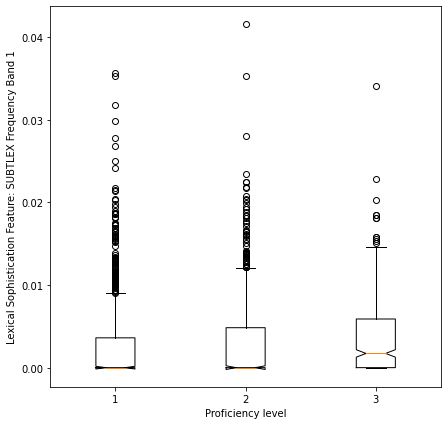

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


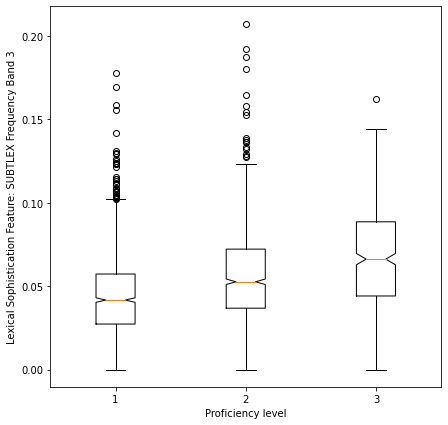

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


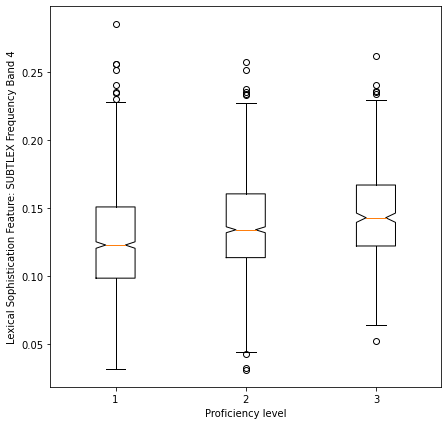

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


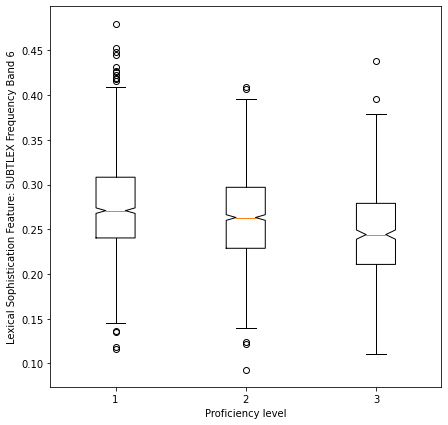

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


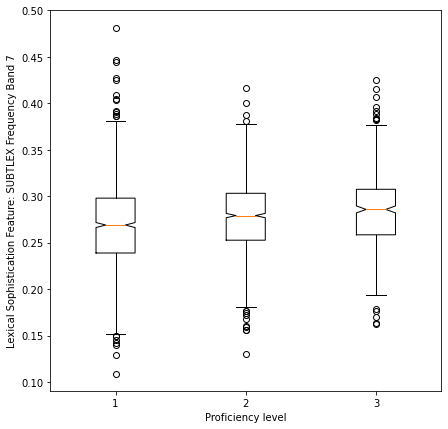

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


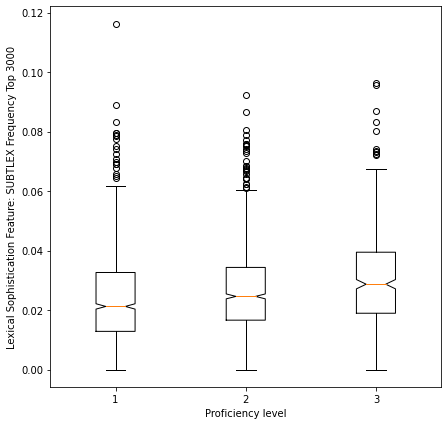

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


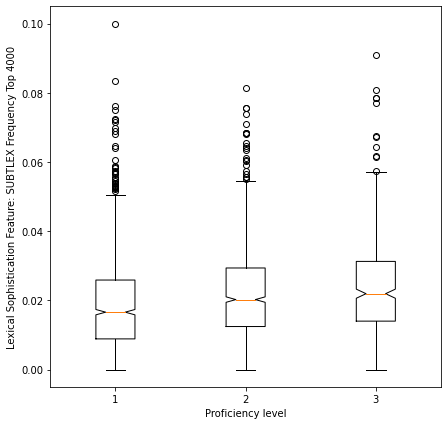

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


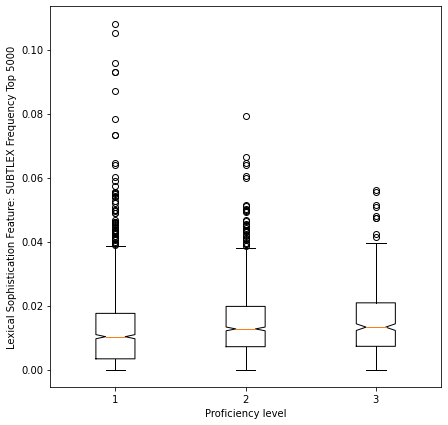

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


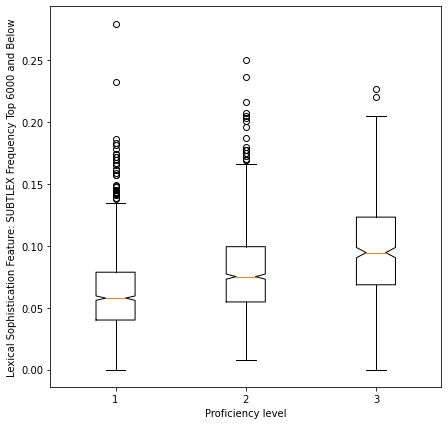

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


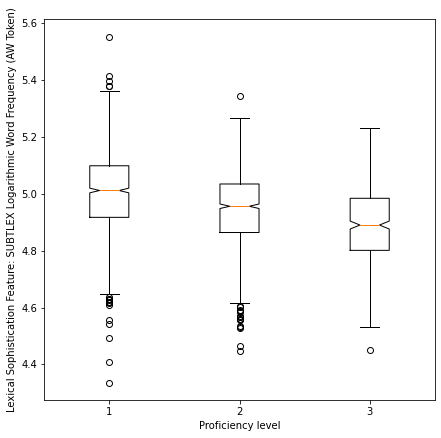

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


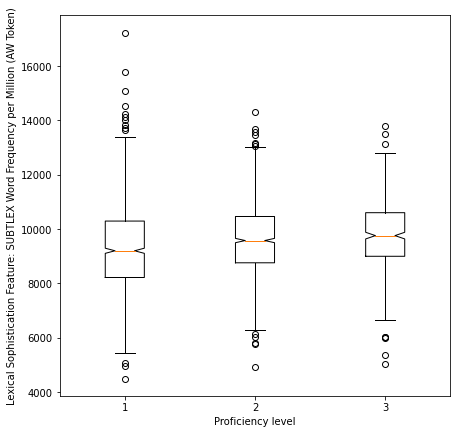

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


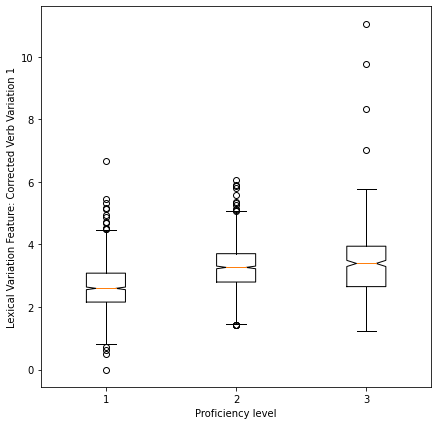

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


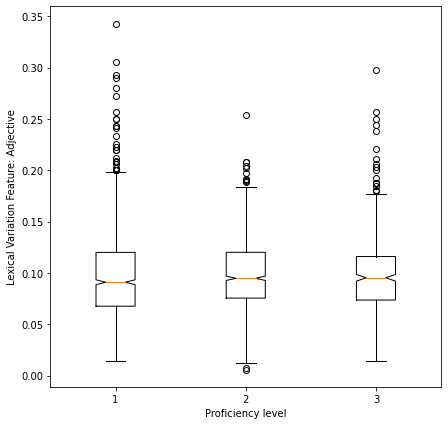

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


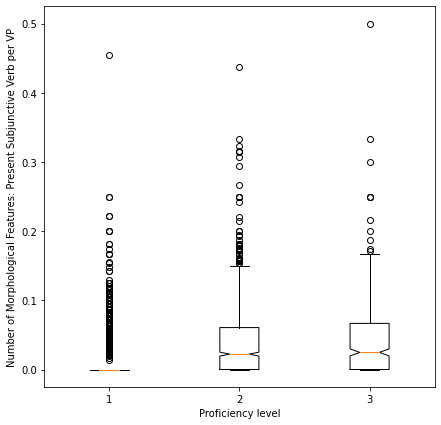

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


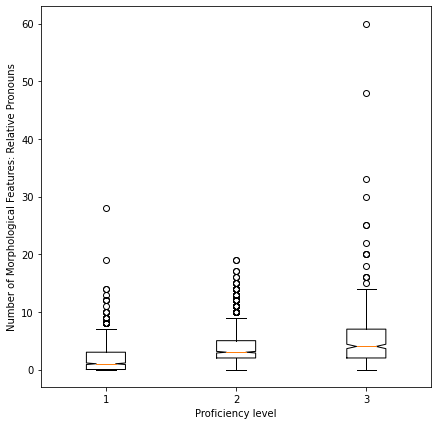

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


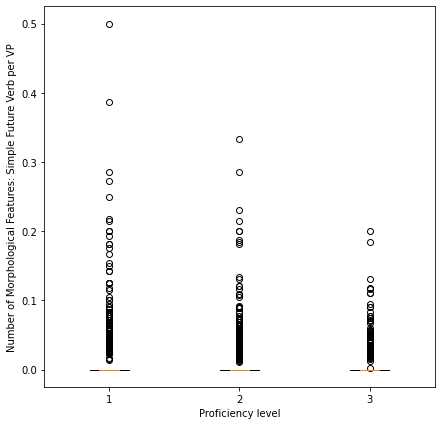

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


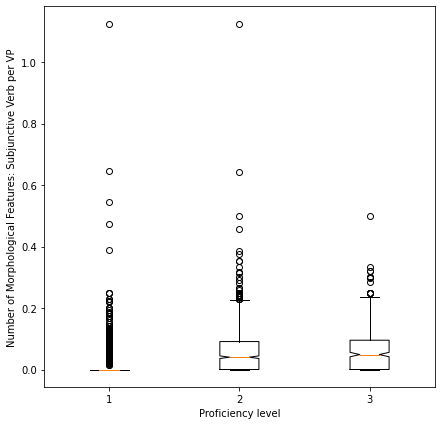

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


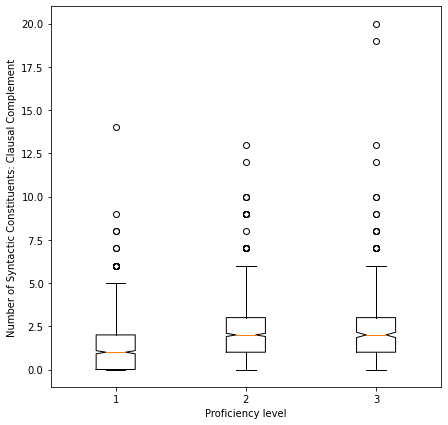

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


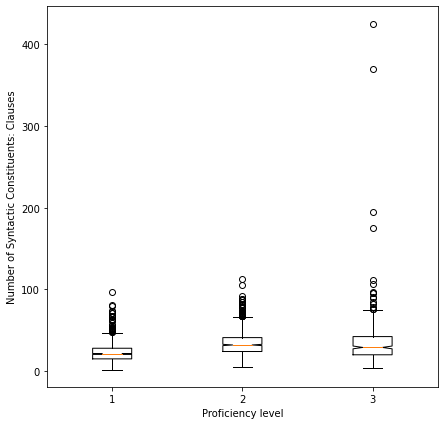

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


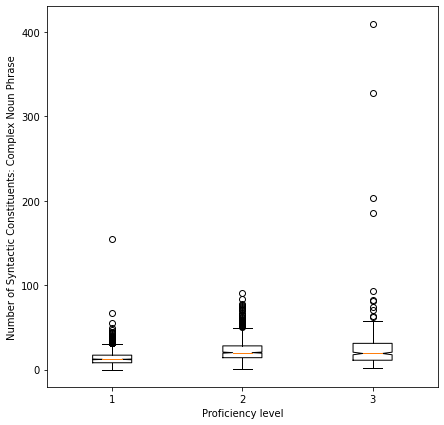

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


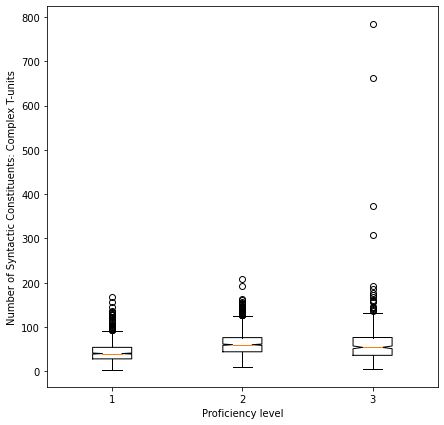

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


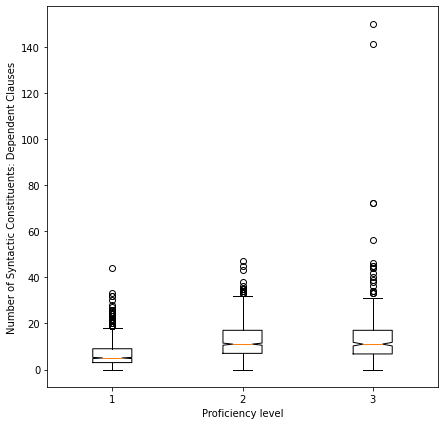

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


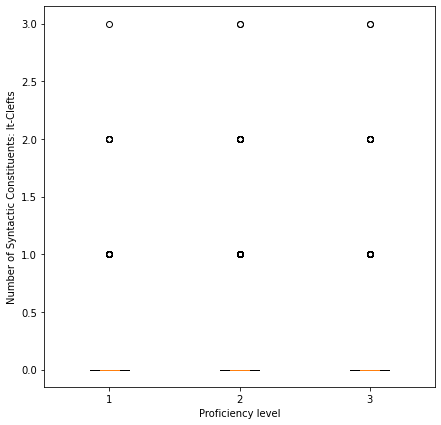

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


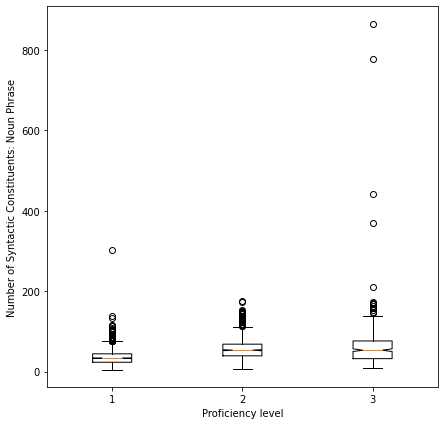

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


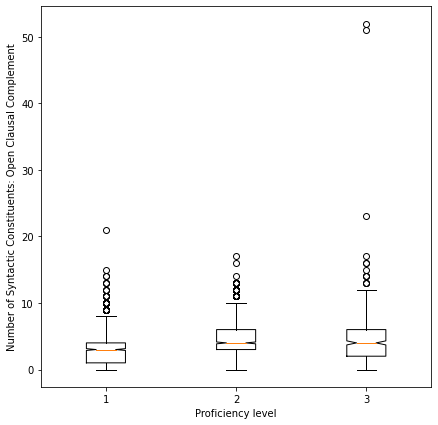

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


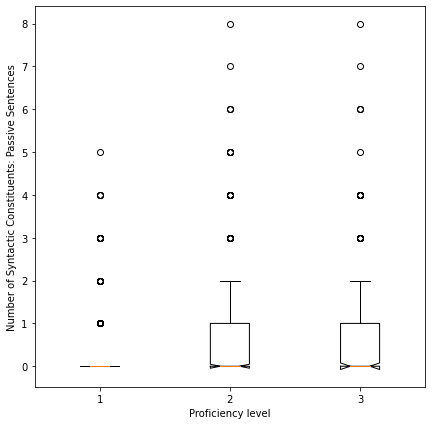

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


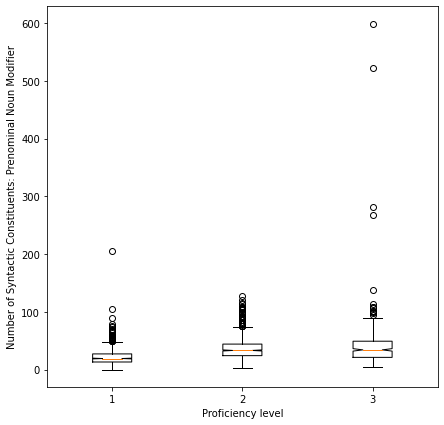

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


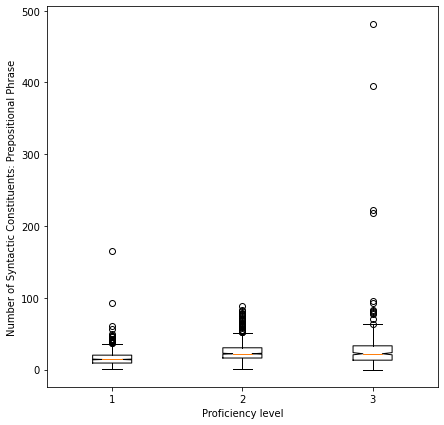

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


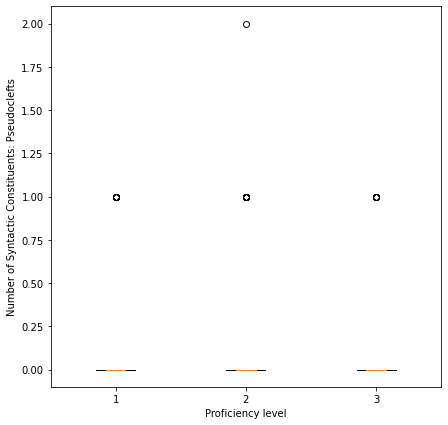

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


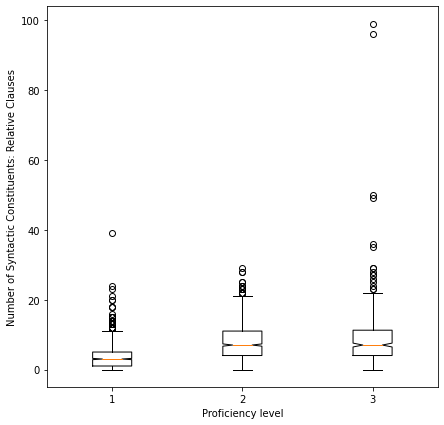

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


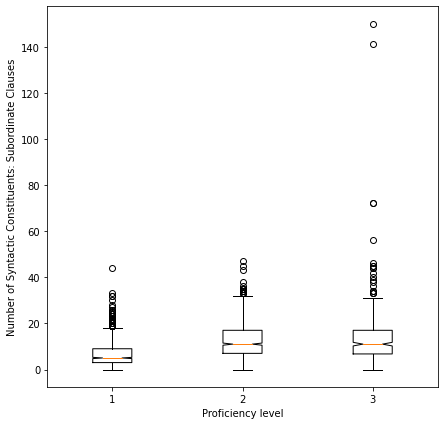

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


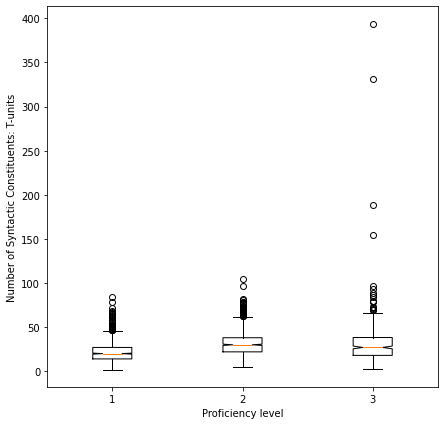

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


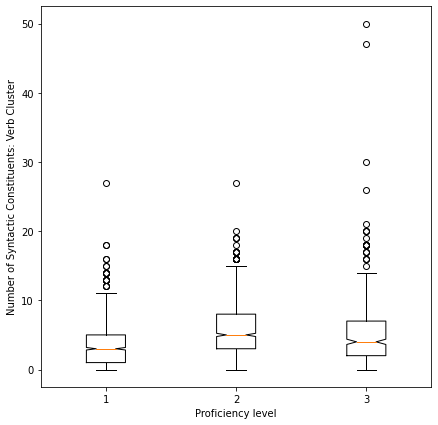

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


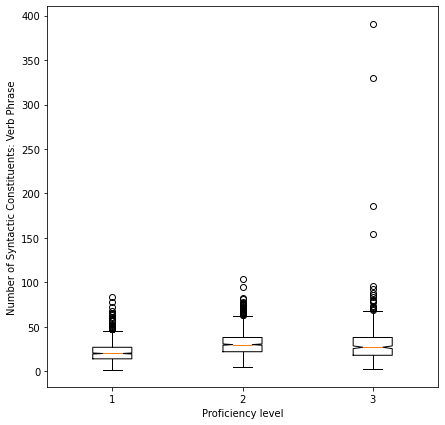

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


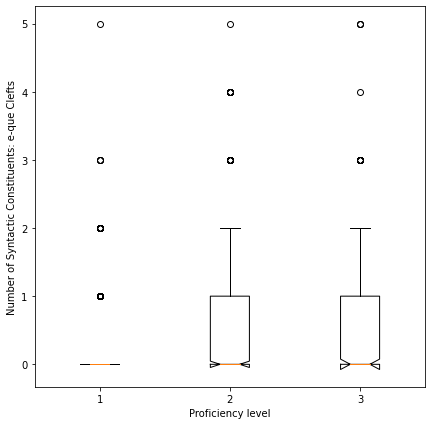

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


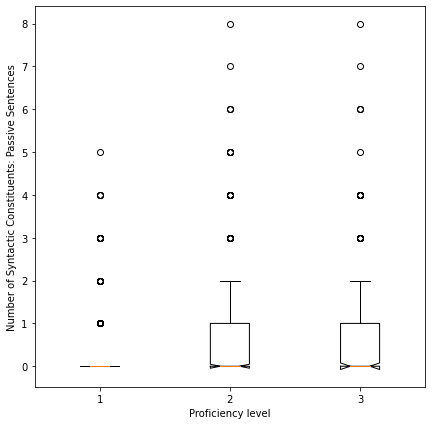

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


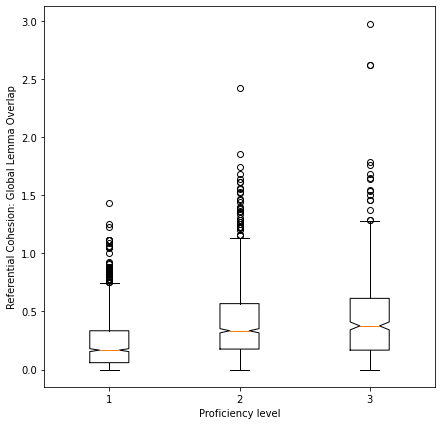

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


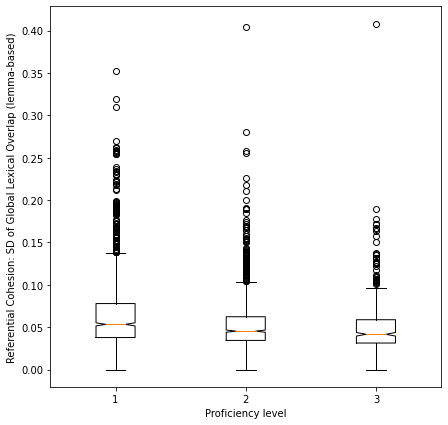

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


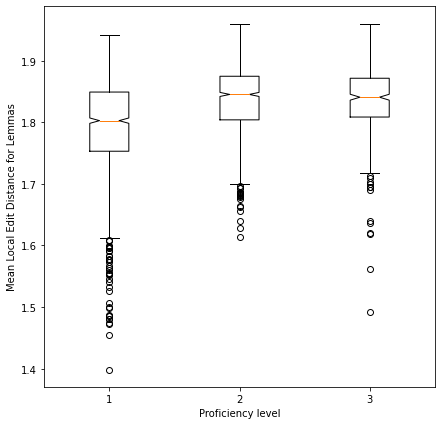

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


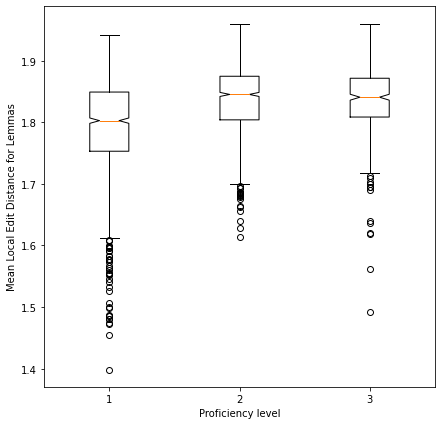

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


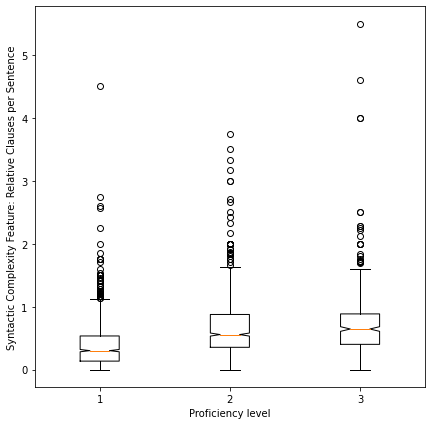

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


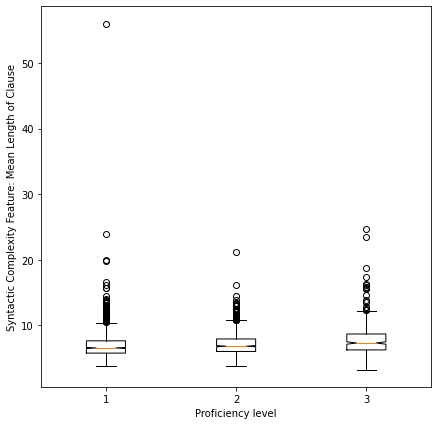

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


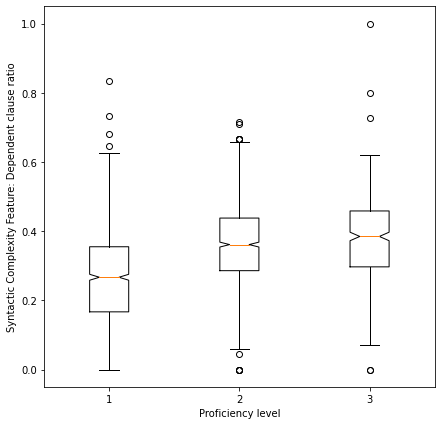

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


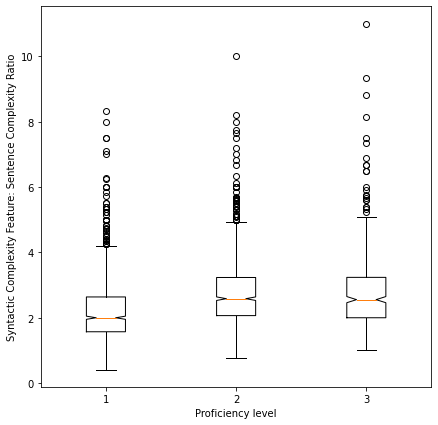

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


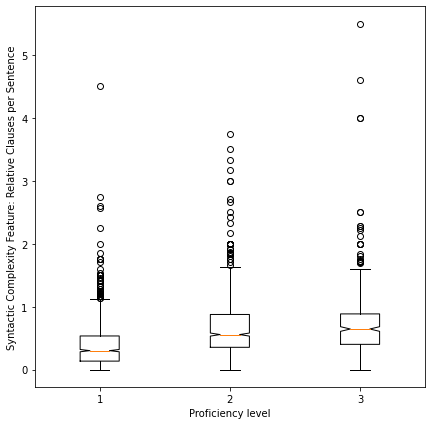

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


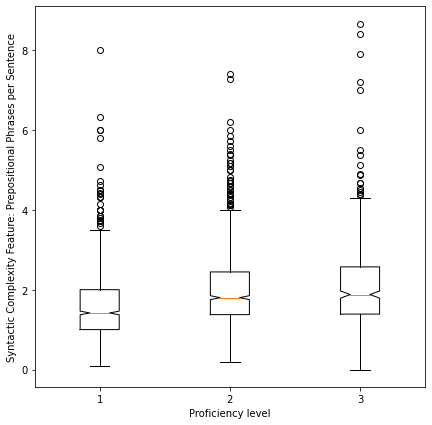

In [218]:
for feature in features:
  a = df.loc[df['Proficiency'] == 1, feature]
  b = df.loc[df['Proficiency'] == 2, feature]
  c = df.loc[df['Proficiency'] == 3, feature]
  columns = [a, b, c]
  #plt.rcParams["figure.figsize"] = (7,7)
  fig, ax = plt.subplots()
  #plt.ylim(0, 1300)
  plt.ylabel(feature)
  plt.xlabel('Proficiency level')
  ax.boxplot(columns, notch=True, showfliers=True)
  plt.show()

Mean Clause Length in Tokens


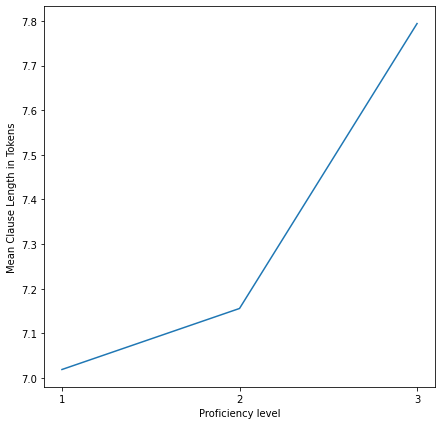

 
Number of Sentences


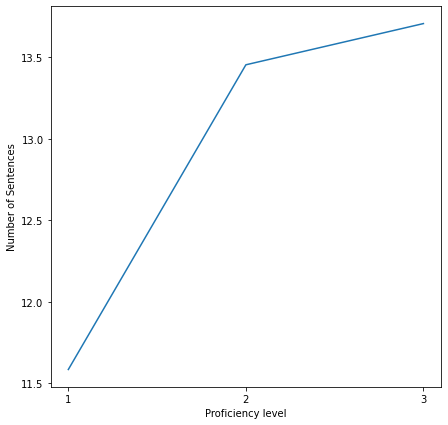

 
Number of Tokens


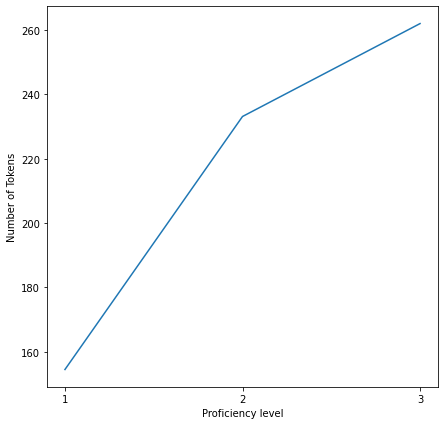

 
Number of Tokens with More Than 2 Syllables


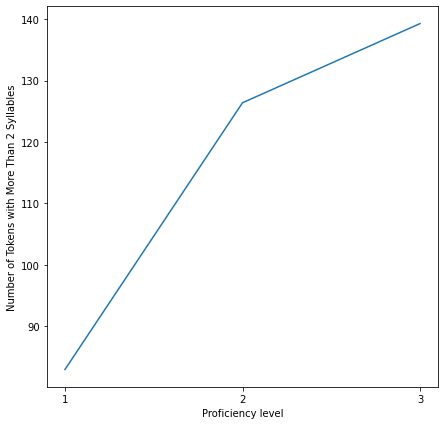

 
Cohesive Complexity Feature: Mendes Causal Connectives per Token


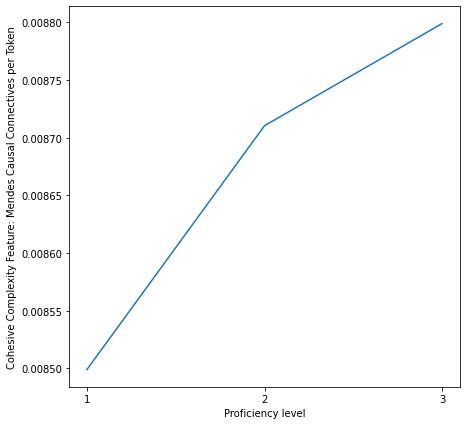

 
Cohesive Complexity Feature: Mendes Concessive Connectives per Token


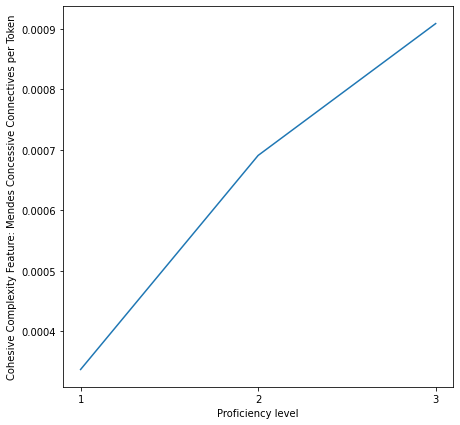

 
Cohesive Complexity Feature: Mendes Additive Connectives per Token


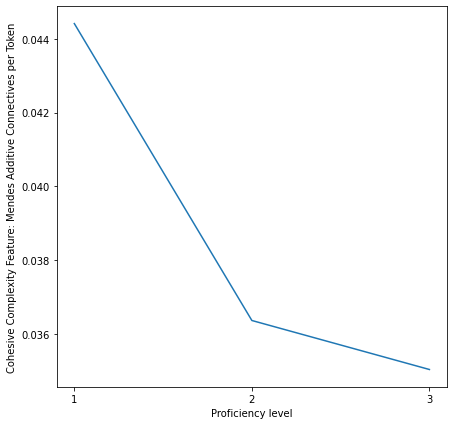

 
Lexical Richness: Type Token Ratio (Corrected TTR)


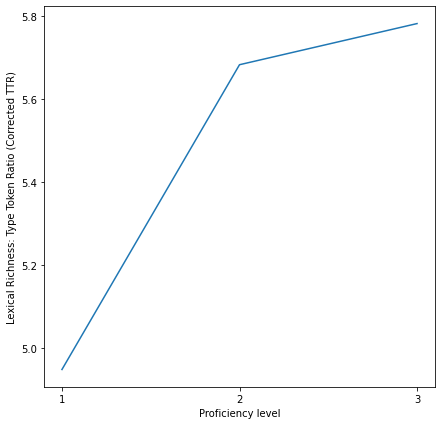

 
Lexical Sophistication Feature: Age of Acquisition (AW Token)


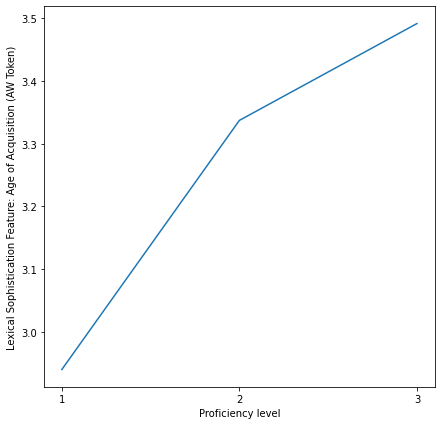

 
Lexical Sophistication Feature: Concreteness (AW Token)


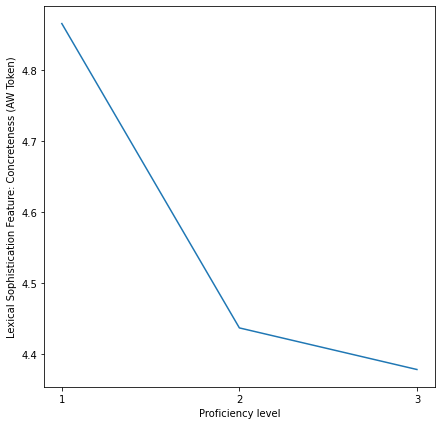

 
Lexical Sophistication Feature: Familiarity (AW Token)


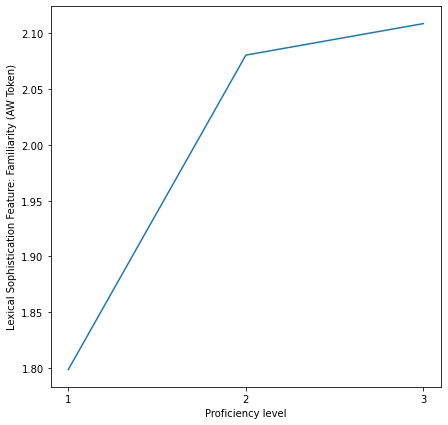

 
Lexical Sophistication Feature: Imageability (AW Token)


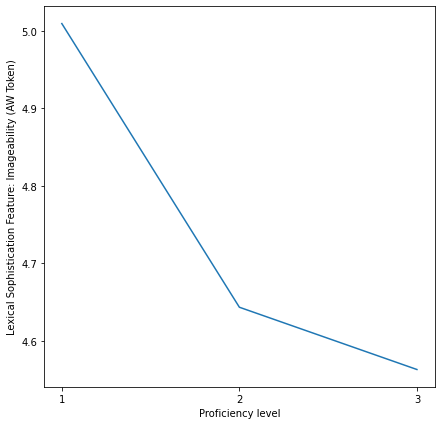

 
Lexical Sophistication Feature: SUBTLEX Frequency Band 2


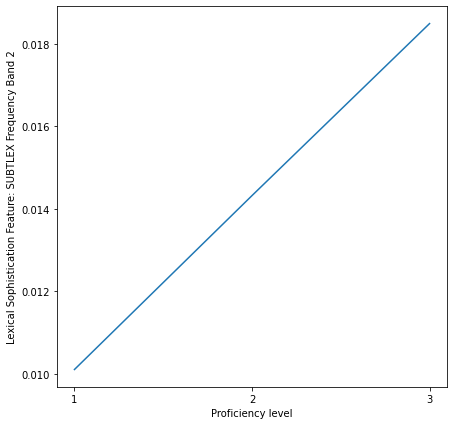

 
Lexical Sophistication Feature: SUBTLEX Frequency Band 1


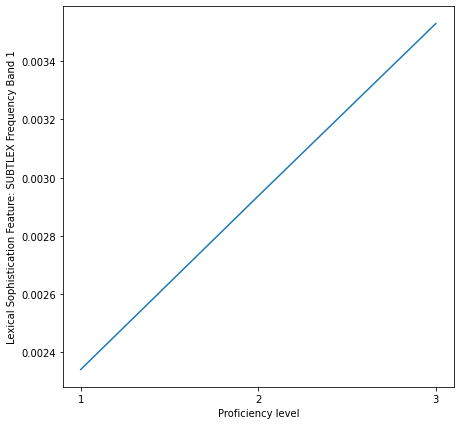

 
Lexical Sophistication Feature: SUBTLEX Frequency Band 3


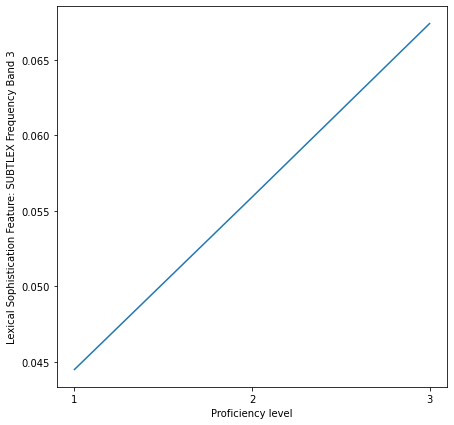

 
Lexical Sophistication Feature: SUBTLEX Frequency Band 4


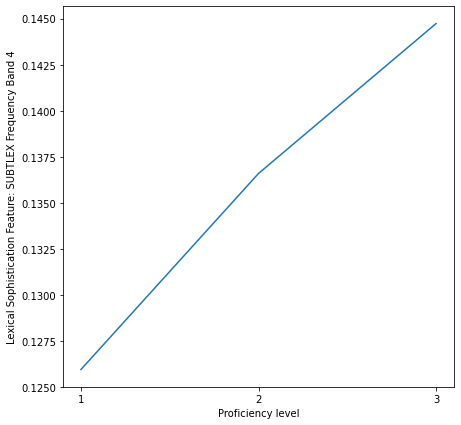

 
Lexical Sophistication Feature: SUBTLEX Frequency Band 6


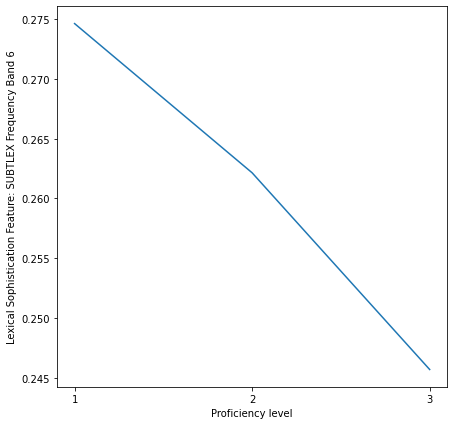

 
Lexical Sophistication Feature: SUBTLEX Frequency Band 7


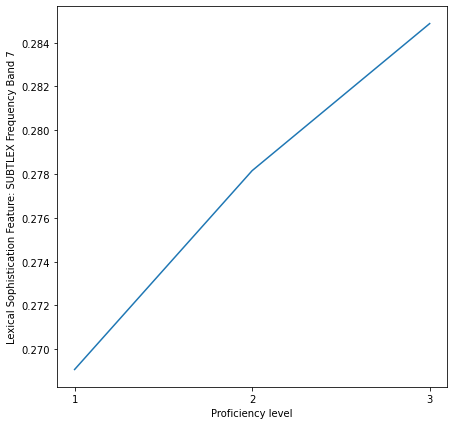

 
Lexical Sophistication Feature: SUBTLEX Frequency Top 3000


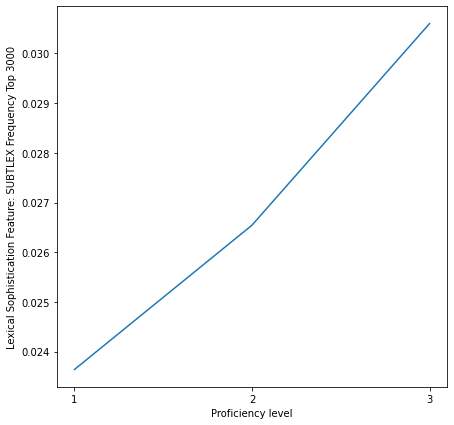

 
Lexical Sophistication Feature: SUBTLEX Frequency Top 4000


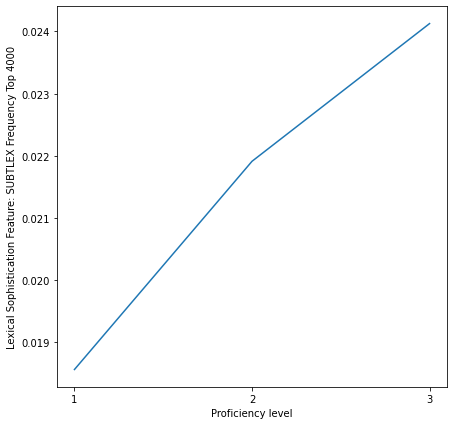

 
Lexical Sophistication Feature: SUBTLEX Frequency Top 5000


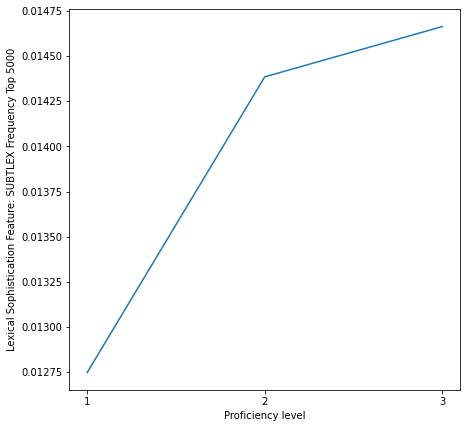

 
Lexical Sophistication Feature: SUBTLEX Frequency Top 6000 and Below


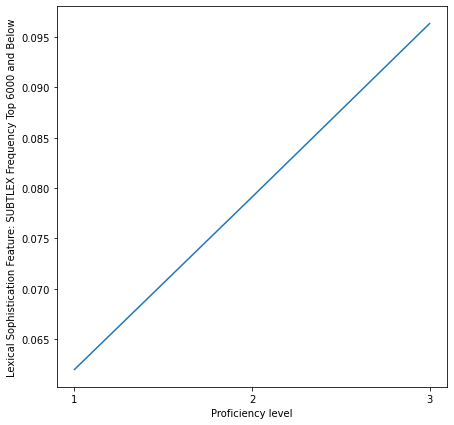

 
Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (AW Token)


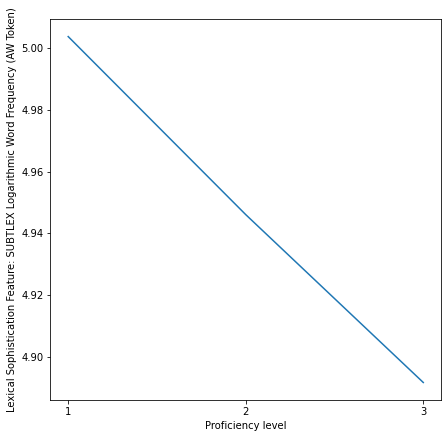

 
Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (AW Token)


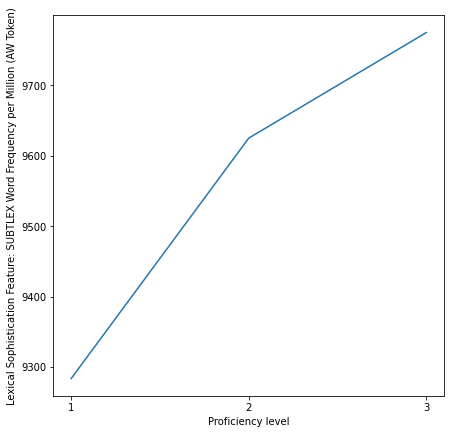

 
Lexical Variation Feature: Corrected Verb Variation 1


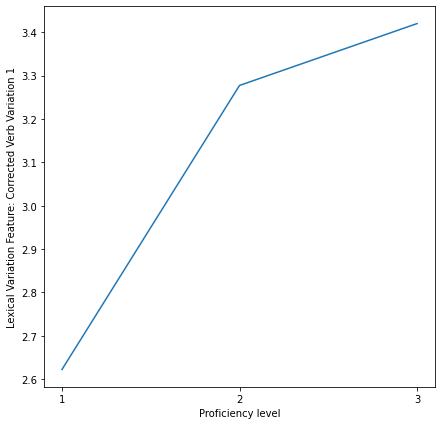

 
Lexical Variation Feature: Adjective


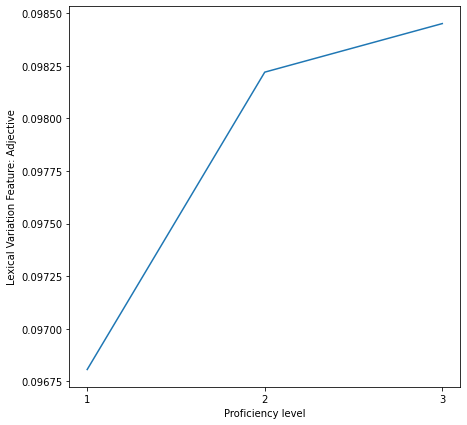

 
Number of Morphological Features: Present Subjunctive Verb per VP


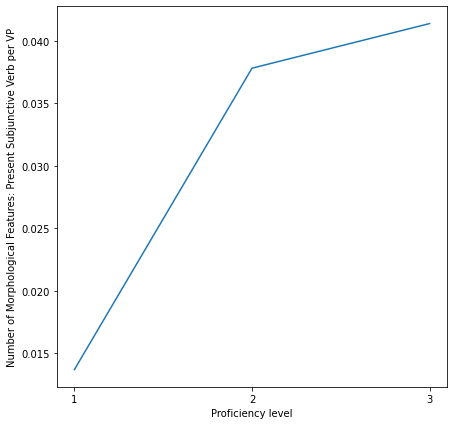

 
Number of Morphological Features: Relative Pronouns


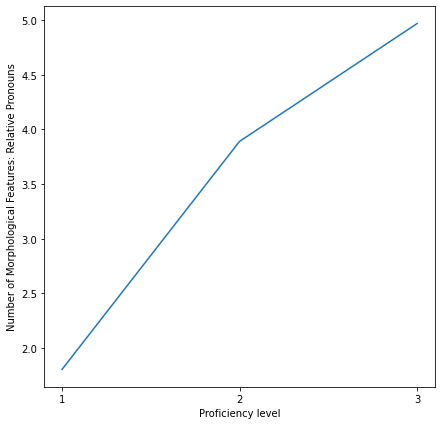

 
Number of Morphological Features: Simple Future Verb per VP


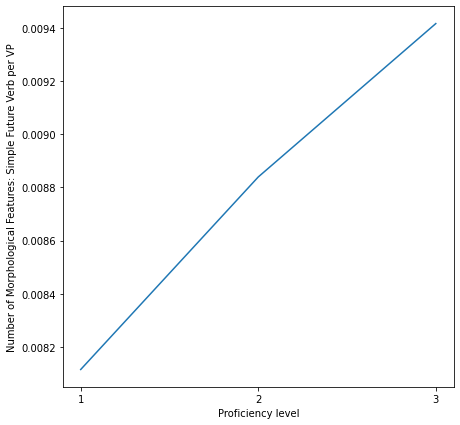

 
Number of Morphological Features: Subjunctive Verb per VP


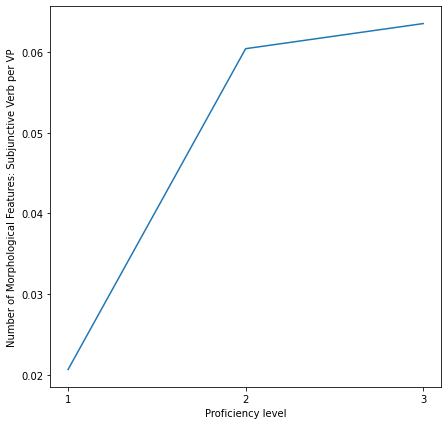

 
Number of Syntactic Constituents: Clausal Complement


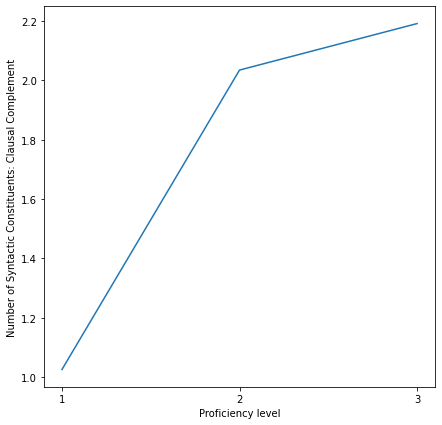

 
Number of Syntactic Constituents: Clauses


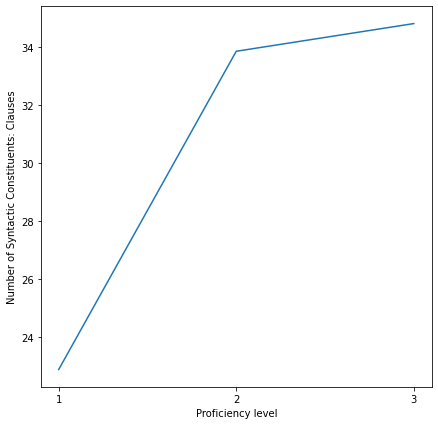

 
Number of Syntactic Constituents: Complex Noun Phrase


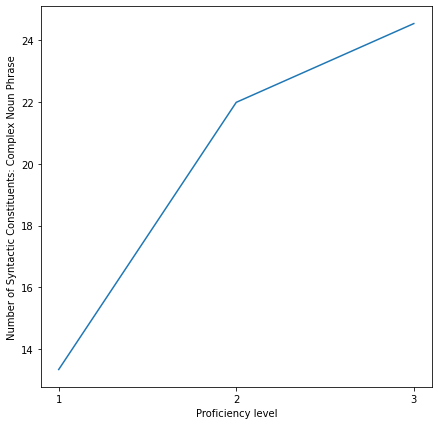

 
Number of Syntactic Constituents: Complex T-units


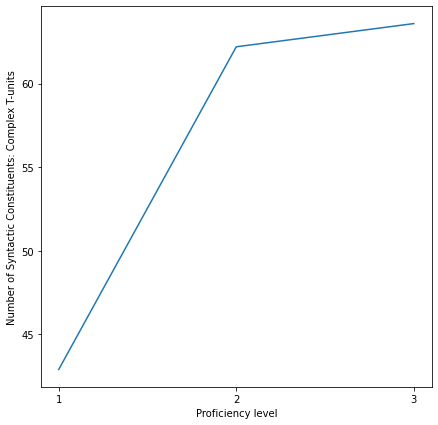

 
Number of Syntactic Constituents: Dependent Clauses


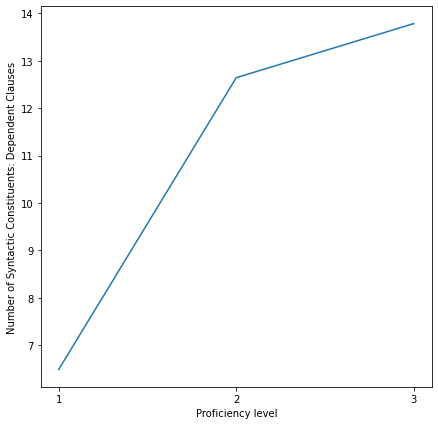

 
Number of Syntactic Constituents: It-Clefts


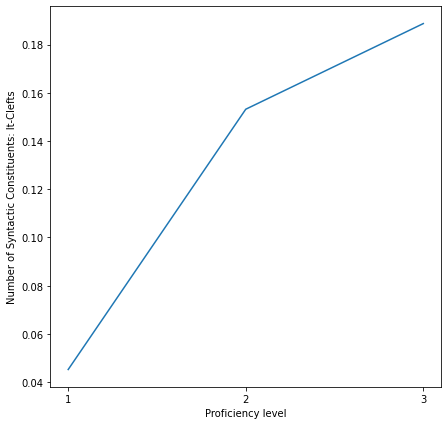

 
Number of Syntactic Constituents: Noun Phrase


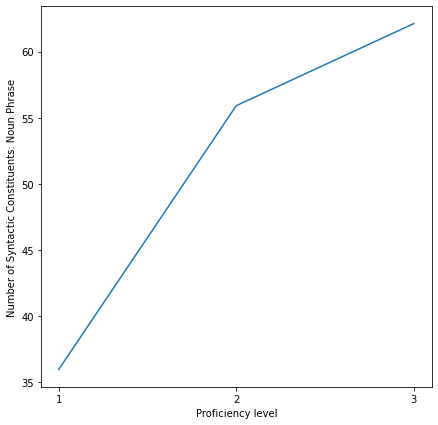

 
Number of Syntactic Constituents: Open Clausal Complement


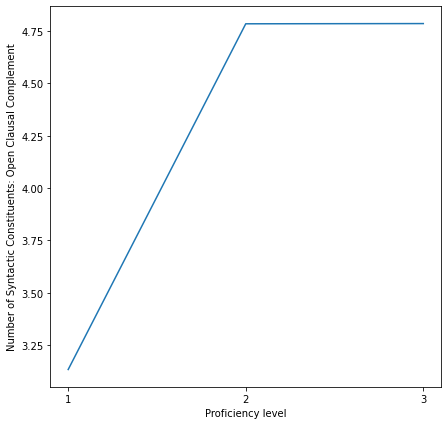

 
Number of Syntactic Constituents: Passive Sentences


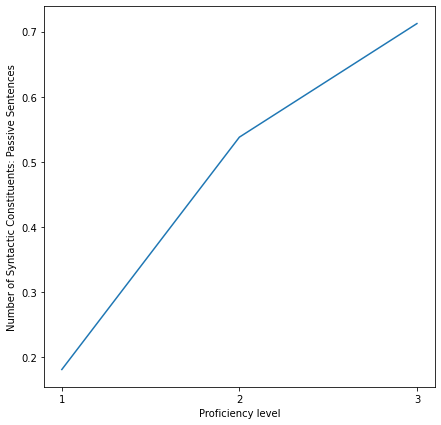

 
Number of Syntactic Constituents: Prenominal Noun Modifier


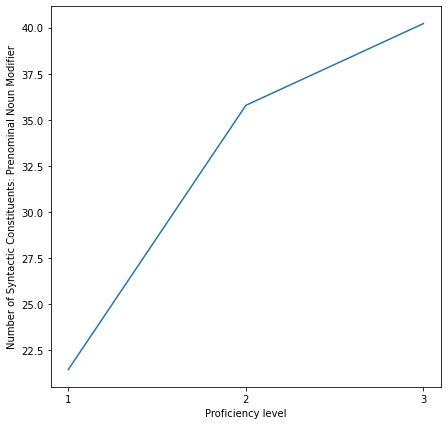

 
Number of Syntactic Constituents: Prepositional Phrase


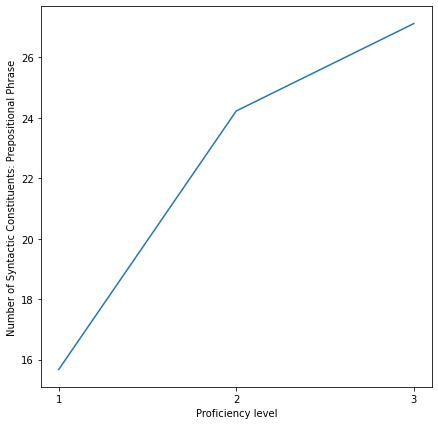

 
Number of Syntactic Constituents: Pseudoclefts


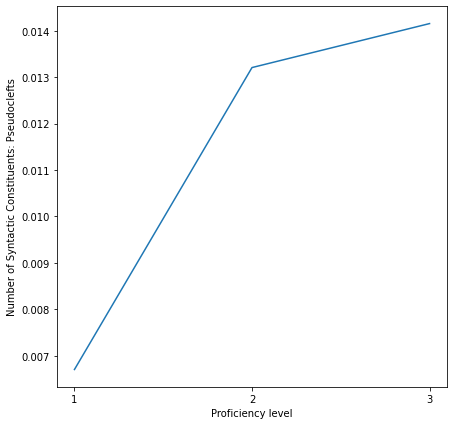

 
Number of Syntactic Constituents: Relative Clauses


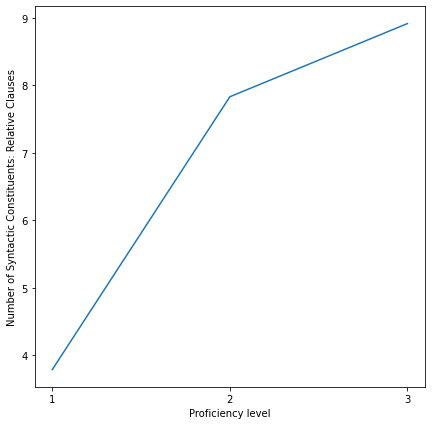

 
Number of Syntactic Constituents: Subordinate Clauses


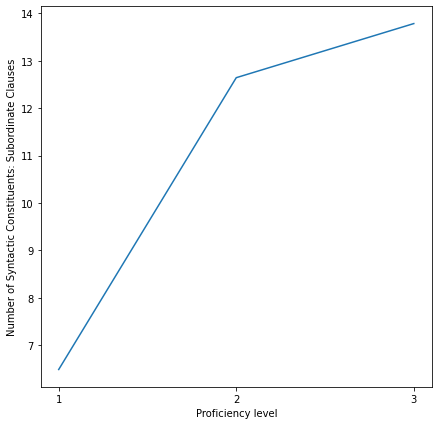

 
Number of Syntactic Constituents: T-units


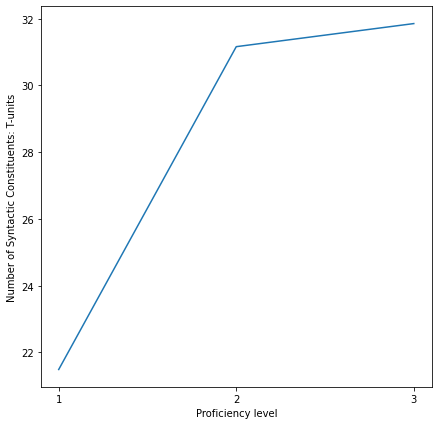

 
Number of Syntactic Constituents: Verb Cluster


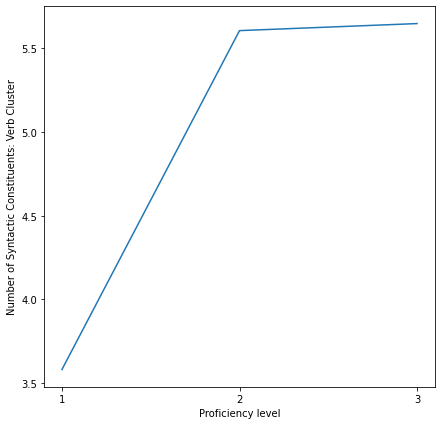

 
Number of Syntactic Constituents: Verb Phrase


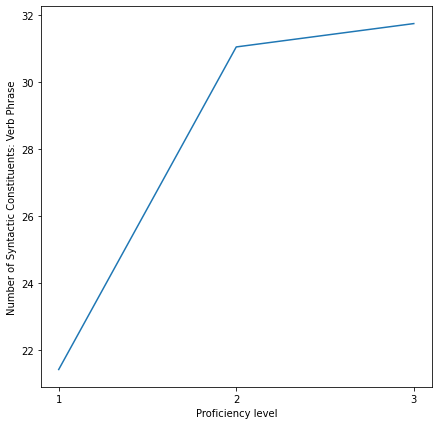

 
Number of Syntactic Constituents: e-que Clefts


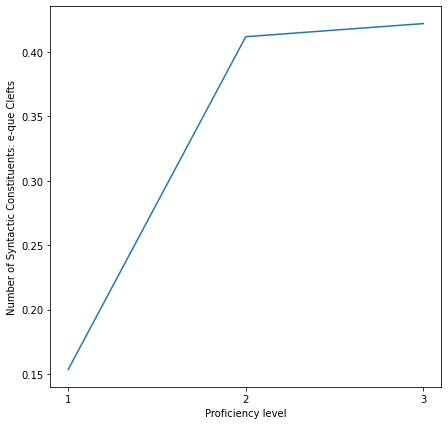

 
Number of Syntactic Constituents: Passive Sentences


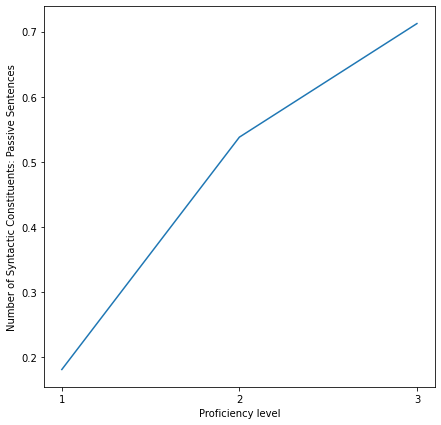

 
Referential Cohesion: Global Lemma Overlap


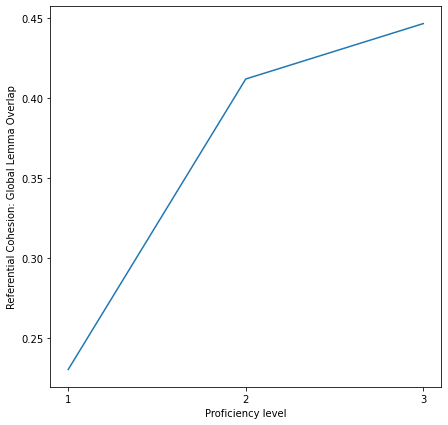

 
Referential Cohesion: SD of Global Lexical Overlap (lemma-based)


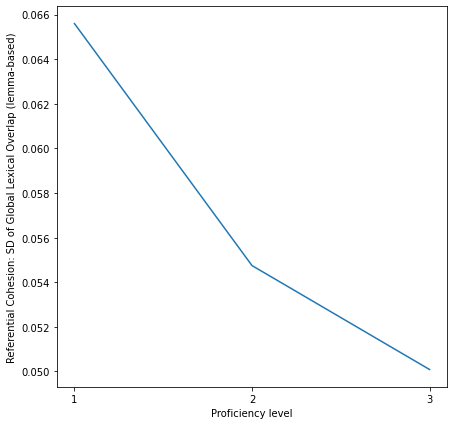

 
Mean Local Edit Distance for Lemmas


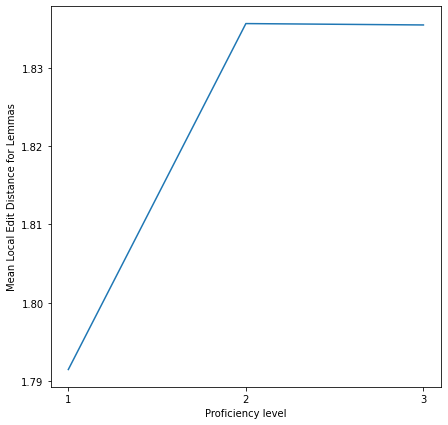

 
Mean Local Edit Distance for Lemmas


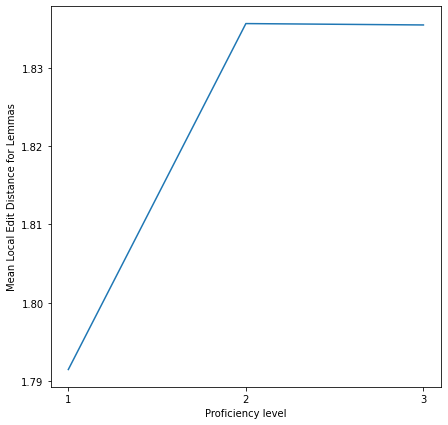

 
Syntactic Complexity Feature: Relative Clauses per Sentence


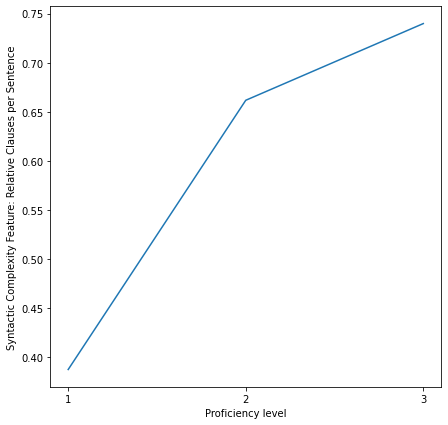

 
Syntactic Complexity Feature: Mean Length of Clause


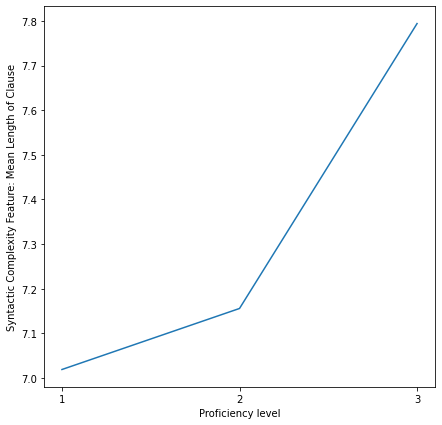

 
Syntactic Complexity Feature: Dependent clause ratio


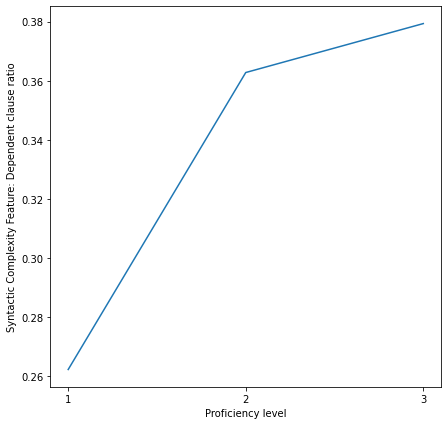

 
Syntactic Complexity Feature: Sentence Complexity Ratio


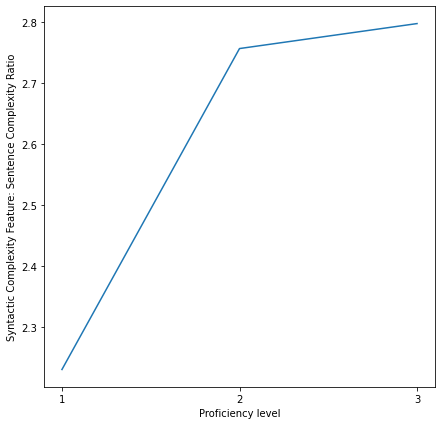

 
Syntactic Complexity Feature: Relative Clauses per Sentence


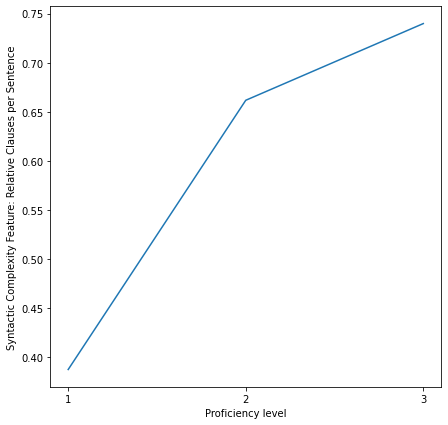

 
Syntactic Complexity Feature: Prepositional Phrases per Sentence


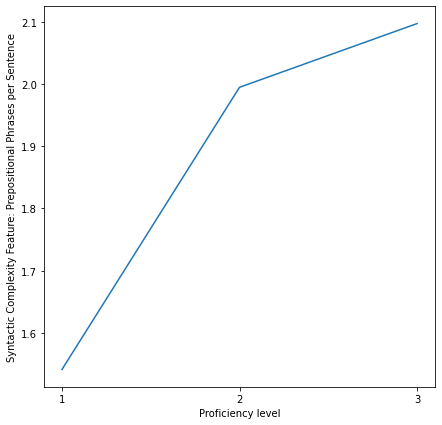

In [217]:
for feature in features:
  print(feature)
  df.groupby(['Proficiency'])[feature].mean().plot()
  plt.ylabel(feature)
  plt.xlabel('Proficiency level')
  plt.xticks(range(1, 4))
  plt.show()
  print(" ")

In [247]:
X = df3.iloc[:, :-1].values
y = df3.iloc[:, 52].values

In [248]:
X = StandardScaler().fit_transform(X)

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [226]:
svm_model = SVC(C=10, coef0=0.5, degree=3, gamma='scale', kernel='rbf')
svm_model.fit(X_train, y_train)

SVC(C=10, coef0=0.5)

In [227]:
predictions = svm_model.predict(X_test)

In [228]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.74      0.76      0.75       250
           2       0.67      0.70      0.68       225
           3       0.41      0.30      0.35        76

    accuracy                           0.67       551
   macro avg       0.60      0.59      0.59       551
weighted avg       0.66      0.67      0.67       551



In [229]:
print(metrics.confusion_matrix(y_test, predictions))

[[191  46  13]
 [ 48 157  20]
 [ 20  33  23]]


In [249]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [250]:
finalDf = pd.concat([principalDf, df[['Proficiency']]], axis = 1)

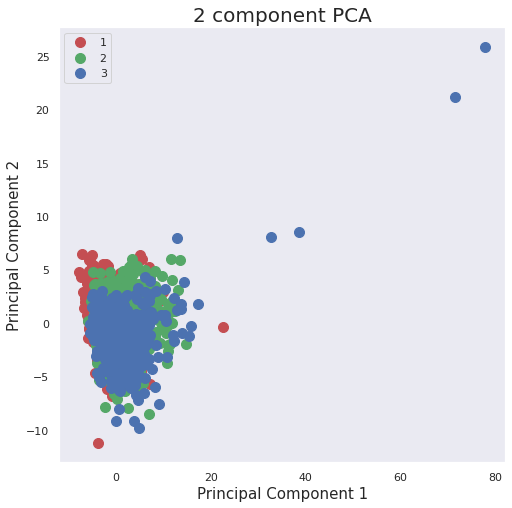

In [251]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 2, 3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Proficiency'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 100)
ax.legend(targets)
ax.grid()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


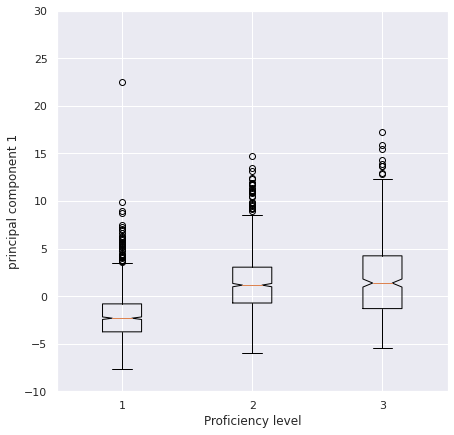

In [255]:
# Visualize principal component 1 distribution throughout levels
a = finalDf.loc[finalDf['Proficiency'] == 1, 'principal component 1']
b = finalDf.loc[finalDf['Proficiency'] == 2, 'principal component 1']
c = finalDf.loc[finalDf['Proficiency'] == 3, 'principal component 1']
columns = [a, b, c]
plt.rcParams["figure.figsize"] = (7,7)
fig, ax = plt.subplots()
plt.ylim(-10, 30)
plt.ylabel('principal component 1')
plt.xlabel('Proficiency level')
ax.boxplot(columns, notch=True, showfliers=True)
plt.show()

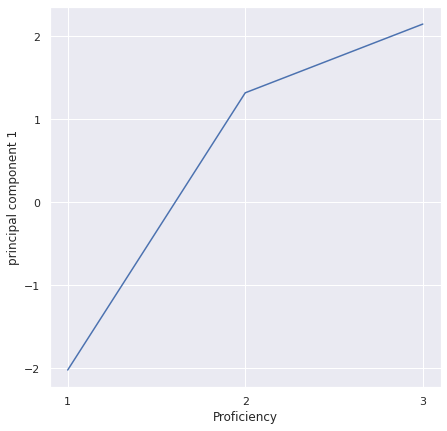

In [258]:
# Visualize general trend with PCA mean values throguhout levels
finalDf.groupby(['Proficiency'])['principal component 1'].mean().plot()
plt.ylabel('principal component 1')
plt.xlabel('Proficiency')
plt.xticks(range(1, 4))
#plt.ylim(-2, 2)
plt.show()

In [236]:
model = LinearDiscriminantAnalysis()

In [237]:
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.668 (0.019)


In [238]:
target_names = (1,2,3,4)
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

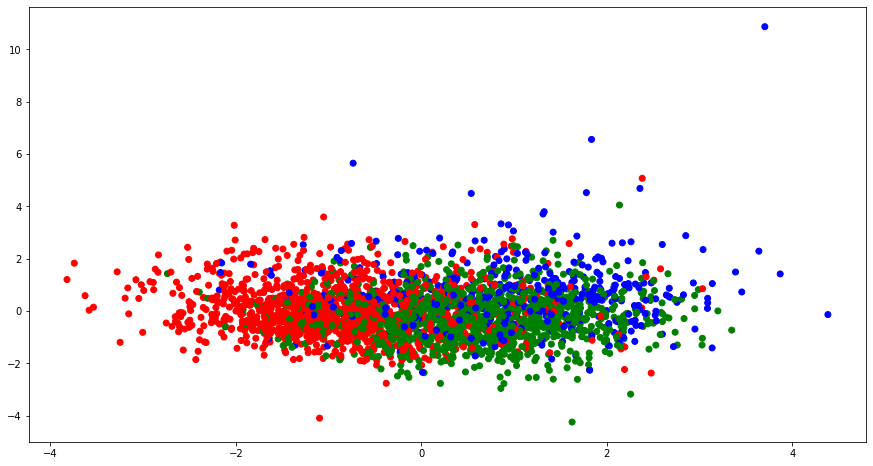

In [241]:
#Plot LDA
plt.figure(figsize=(15, 8))
colors = {1:'red', 2:'green', 3:'blue'}
plt.scatter(X_r2[:,0],X_r2[:,1],  c=df['Proficiency'].map(colors))
plt.show()

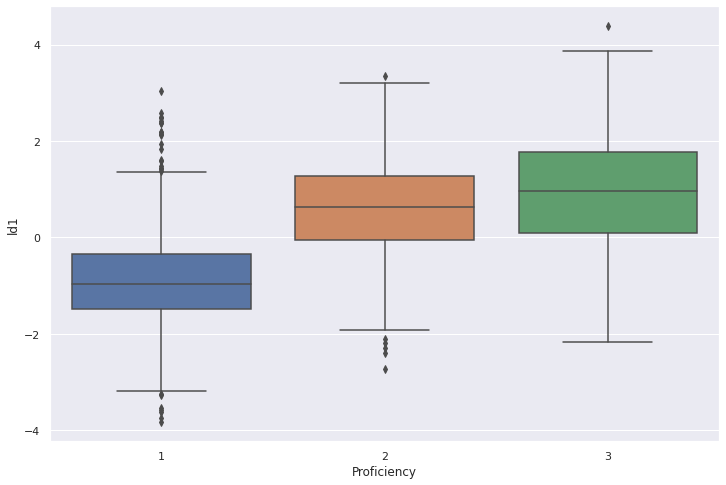

In [245]:
# Verify LDA distribution throughout levels
df4=pd.DataFrame(zip(X_r2[:,0],X_r2[:,1],y),columns=["ld1","ld2","Proficiency"])

sns.set(rc={'figure.figsize':(12,8)})

#subplot(2,1,1)
sns.boxplot(x='Proficiency', y='ld1', data=df4)
#subplot(2,1,2)
#sns.boxplot(x='Level', y='ld2', data=df)

* **Testing with individual groups of features**